# Statistical test of grouping of mobile genes

## Preparation

In [72]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from os import listdir

In [8]:
project_path = Path().resolve().parent

## Import dataframe

In [183]:
contig="GCA_000006785.2-AE004092.2"
#sys.argv[1]
mobility_genome=pd.read_csv(project_path / "results" / "mobility_files" / str(contig+".csv"))
mobility_genome=mobility_genome.iloc[:,1:7]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lorevansantvliet/Dropbox/Mac/Desktop/Thesis/Project/results/mobility_files/GCA_000006785.2-AE004092.2.csv'

In [10]:
mobility_genome

,order,orthogroup,gene,accessory_count,count,accessory
0,1,F03021_5,AE004092.2_1,0.012195,1,False
1,2,F00122_09,AE004092.2_2,0.000000,1,False
2,3,F00242_3,AE004092.2_3,0.000000,1,False
3,4,F03229_3,AE004092.2_4,0.000000,1,False
4,5,F00708_4,AE004092.2_5,0.000000,1,False
...,...,...,...,...,...,...
1771,1772,F00852_5,AE004092.2_1772,0.012987,1,False
1772,1773,F28009_1,AE004092.2_1773,1.000000,1,True
1773,1774,F02161_2,AE004092.2_1774,0.000000,1,False
1774,1775,F02127_5,AE004092.2_1775,0.000000,1,False


## Boxplot for a specific genome

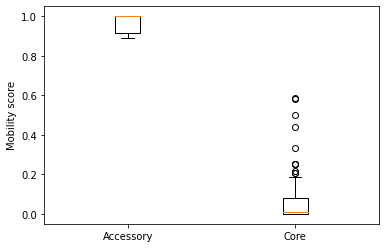

In [116]:
fig, ax = plt.subplots()
ax.boxplot([mobility_genome.accessory_fraction[mobility_genome.accessory], mobility_genome.accessory_fraction[-mobility_genome.accessory]])
ax.set_xticklabels(['Accessory', 'Core'])
ax.set_ylabel("Mobility score")
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "GCA_000006785.2_boxplots.png")

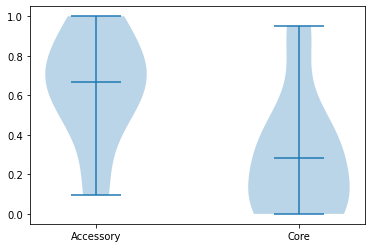

In [180]:
fig, ax = plt.subplots()
ax.violinplot([mobility_genome.accessory_fraction[mobility_genome.accessory], mobility_genome.accessory_fraction[-mobility_genome.accessory]], showmedians=True)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Accessory', 'Core'])
plt.show()

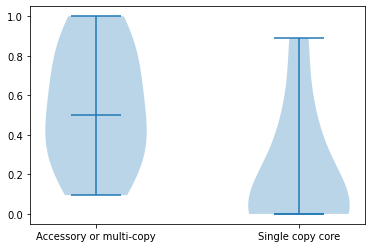

In [181]:
fig, ax = plt.subplots()
ax.violinplot([mobility_genome.accessory_fraction[mobility_genome.accessory|(mobility_genome['count']>1)], mobility_genome.accessory_fraction[(-mobility_genome.accessory)&(mobility_genome['count']==1)]], showmedians=True)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Accessory or multi-copy', 'Single copy core'])
plt.show()

## Overall boxplots

In [198]:
overall_mobility=pd.DataFrame(columns=['order', 'orthogroup', 'gene', 'accessory_fraction', 'count', 'accessory'])
for contig in listdir(project_path / "results" / "mobility_files"):
    if contig != ".DS_Store":
        print(contig)
        overall_mobility=overall_mobility.append(pd.read_csv(project_path / "results" / "mobility_files" / contig).iloc[:,1:7])



GCA_001547045.1-LNMK01000058.1.csv
GCA_002945315.1-PTVQ01000114.1.csv
GCA_900683535.1-CAACXX010000001.1.csv
GCA_003545945.1-QXET01000027.1.csv
GCA_003712685.1-LKGB01000091.1.csv
GCA_000177755.1-ADHG01000007.1.csv
GCA_002948855.1-PTZZ01000016.1.csv
GCA_001645615.1-LWBT01000022.1.csv
GCA_900095045.1-FMBS01000014.1.csv
GCA_003465905.1-QSAX01000046.1.csv
GCA_003712965.1-LKGL01000033.1.csv
GCA_004553005.1-SFMS01000016.1.csv
GCA_001982115.1-MKEA01000027.1.csv
GCA_003712605.1-LKFX01000024.1.csv
GCA_006541085.1-VHRD01000016.1.csv
GCA_001656875.1-JTHV01000190.1.csv
GCA_002077355.1-MJDP01000007.1.csv
GCA_900095045.1-FMBS01000051.1.csv
GCA_003796745.1-RKNF01000008.1.csv
GCA_002948855.1-PTZZ01000053.1.csv
GCA_001754025.1-LWKN01000099.1.csv
GCA_003465905.1-QSAX01000003.1.csv
GCA_001657165.1-JTIU01000056.1.csv
GCA_001656685.1-JTIL01000029.1.csv
GCA_002416215.1-DICH01000037.1.csv
GCA_003797365.1-RKPA01000008.1.csv
GCA_002930795.1-PSQK01000006.1.csv
GCA_003797545.1-RKPN01000002.1.csv
GCA_000442765.1-F

GCA_002948075.1-PTZR01000023.1.csv
GCA_003712925.1-LKFN01000079.1.csv
GCA_900078525.1-FJVL01000022.1.csv
GCA_001456475.1-LKLE01000039.1.csv
GCA_006491895.1-VHIL01000014.1.csv
GCA_902159245.1-CABGJC010000030.1.csv
GCA_001639625.1-LUWL01000019.1.csv
GCA_005234805.1-QPQX01000007.1.csv
GCA_004125775.1-PJWK01000007.1.csv
GCA_002088065.1-NAQY01000012.1.csv
GCA_000309705.1-AFYQ01000036.1.csv
GCA_001591725.1-BCVL01000030.1.csv
GCA_000410335.1-ANKB01000010.1.csv
GCA_001456545.1-LKLI01000079.1.csv
GCA_000493455.1-HG530785.1.csv
GCA_000311945.1-AMQW01000009.1.csv
GCA_002863445.1-PKKB01000005.1.csv
GCA_003319265.1-KZ845734.1.csv
GCA_000721865.3-JNCC03000042.1.csv
GCA_002945175.1-PTVK01000006.1.csv
GCA_902159875.1-CABGLT010000032.1.csv
GCA_003346015.1-QMJW01000043.1.csv
GCA_001981585.1-MJHG01000003.1.csv
GCA_002218925.1-LYRG01000025.1.csv
GCA_002949225.1-PTYE01000008.1.csv
GCA_002338165.1-DDHR01000142.1.csv
GCA_002554015.1-PCZB01000014.1.csv
GCA_000172655.1-ABQI01000022.1.csv
GCA_001982025.1-MKDR01

GCA_001705215.1-MCRG01000016.1.csv
GCA_006384175.1-CP029754.1.csv
GCA_001025385.1-LDNJ01000005.1.csv
GCA_002441825.1-JXKC01000004.1.csv
GCA_002945475.1-PTWN01000134.1.csv
GCA_003796805.1-RKNR01000004.1.csv
GCA_001981785.1-MKDF01000037.1.csv
GCA_001657005.1-JTIF01000002.1.csv
GCA_001063505.1-JVEV01000023.1.csv
GCA_901212505.1-CAAKNX010000176.1.csv
GCA_001766735.1-MIQF01000043.1.csv
GCA_001025325.1-LDNG01000063.1.csv
GCA_002161395.1-NFHQ01000010.1.csv
GCA_000499945.1-AWWO01000036.1.csv
GCA_902165765.1-CABHHT010000014.1.csv
GCA_004102845.1-RBAI01000028.1.csv
GCA_001025435.1-LDND01000029.1.csv
GCA_001807185.1-KV788047.1.csv
GCA_000499905.1-AWWN01000065.1.csv
GCA_901212505.1-CAAKNX010000133.1.csv
GCA_003712645.1-LKFZ01000012.1.csv
GCA_000648755.1-JMEL01000018.1.csv
GCA_001808415.1-KV793130.1.csv
GCA_000147455.1-GL454623.1.csv
GCA_001675535.1-LSMC01000131.1.csv
GCA_001831225.1-MLKC01000043.1.csv
GCA_000191685.2-AEXJ01000003.1.csv
GCA_001021675.1-LDDZ01000021.1.csv
GCA_000175055.1-ACOZ0100000

GCA_000805355.1-JTJV01000018.1.csv
GCA_005234835.1-QPQY01000006.1.csv
GCA_001066565.1-JUQW01000126.1.csv
GCA_002388095.1-DGLV01000010.1.csv
GCA_001858275.1-MBTZ01000091.1.csv
GCA_004127055.1-PJVW01000017.1.csv
GCA_003795795.1-RKNC01000012.1.csv
GCA_002389105.1-DGNV01000088.1.csv
GCA_003713005.1-LKGM01000031.1.csv
GCA_000006865.1-AE005176.1.csv
GCA_002322075.1-DCNS01000109.1.csv
GCA_000309745.1-AFYS01000045.1.csv
GCA_002532085.1-NIGM01000049.1.csv
GCA_000466845.1-AVFI01000127.1.csv
GCA_902165965.1-CABHIV010000023.1.csv
GCA_000407405.1-ASVX01000005.1.csv
GCA_003712345.1-LKFK01000011.1.csv
GCA_002946915.1-PUBL01000069.1.csv
GCA_003472845.1-QRMZ01000016.1.csv
GCA_003537455.1-DPSC01000148.1.csv
GCA_001675535.1-LSMC01000094.1.csv
GCA_002944125.1-PTTQ01000048.1.csv
GCA_000179375.1-AEAT01000001.1.csv
GCA_003933345.1-PGCS01000187.1.csv
GCA_002944235.1-PTUB01000049.1.csv
GCA_000415045.1-KE350982.1.csv
GCA_001715665.1-MDLV01000016.1.csv
GCA_000615245.1-BALT01000022.1.csv
GCA_000409815.1-ANKY01000

GCA_000743075.1-JPZB01000018.1.csv
GCA_001281225.1-JXCV01000001.1.csv
GCA_002803395.1-PHNP01000010.1.csv
GCA_001633455.1-LUWX01000131.1.csv
GCA_001715645.1-MDLL01000002.1.csv
GCA_004099995.1-SCIF01000003.1.csv
GCA_001068015.1-JULF01000154.1.csv
GCA_902160305.1-CABGND010000013.1.csv
GCA_004127055.1-PJVW01000033.1.csv
GCA_002926075.1-PREW01000002.1.csv
GCA_004078645.1-SCEN01000003.1.csv
GCA_001311645.1-BBBQ01000018.1.csv
GCA_002948245.1-PTZC01000009.1.csv
GCA_004103125.1-RPCG01000039.1.csv
GCA_001647065.1-LUGK01000051.1.csv
GCA_002944125.1-PTTQ01000029.1.csv
GCA_002160685.1-NFLC01000010.1.csv
GCA_002946915.1-PUBL01000008.1.csv
GCA_000309745.1-AFYS01000061.1.csv
GCA_002993385.1-PVNZ01000162.1.csv
GCA_002218565.1-LYQS01000013.1.csv
GCA_001059285.1-JUPQ01000688.1.csv
GCA_002270045.1-NIBC01000025.1.csv
GCA_001455425.1-LKPH01000081.1.csv
GCA_004369165.1-MSGR01000148.1.csv
GCA_001809765.1-KV798646.1.csv
GCA_902165965.1-CABHIV010000007.1.csv
GCA_003472845.1-QRMZ01000032.1.csv
GCA_902161895.1-CA

GCA_002945715.1-PTWR01000032.1.csv
GCA_002455195.1-DKJT01000006.1.csv
GCA_003796625.1-RKMN01000006.1.csv
GCA_000409855.1-ANKW01000019.1.csv
GCA_000415045.1-KE350966.1.csv
GCA_000172615.1-ABQA01000013.1.csv
GCA_001649985.1-LUSM01000040.1.csv
GCA_000410175.1-ANMM01000004.1.csv
GCA_002218855.1-LYRC01000011.1.csv
GCA_000525935.1-AODI01000014.1.csv
GCA_002365695.1-DFAV01000050.1.csv
GCA_000235705.2-AGBU01000019.1.csv
GCA_001021745.1-LDEA01000031.1.csv
GCA_003203815.1-QJOG01000029.1.csv
GCA_003264005.1-NAQR01000031.1.csv
GCA_000415045.1-KE350923.1.csv
GCA_001656655.1-JTIH01000007.1.csv
GCA_900290175.1-OKRC01000004.1.csv
GCA_001981705.1-MKDC01000006.1.csv
GCA_902162105.1-CABGUH010000023.1.csv
GCA_006375755.1-VFCE01000022.1.csv
GCA_000409955.1-ANML01000065.1.csv
GCA_002218775.1-LYQX01000068.1.csv
GCA_002365695.1-DFAV01000015.1.csv
GCA_900143495.1-FREK01000010.1.csv
GCA_002453485.1-DKGZ01000106.1.csv
GCA_003712395.1-LKFI01000094.1.csv
GCA_002944895.1-PTUS01000037.1.csv
GCA_002948875.1-PTZQ01000

GCA_001811285.1-KV804095.1.csv
GCA_001808975.1-KV795356.1.csv
GCA_902160905.1-CABGPQ010000013.1.csv
GCA_001270785.1-LIGY01000152.1.csv
GCA_004126655.1-PJVK01000021.1.csv
GCA_000410135.1-ANMH01000116.1.csv
GCA_003712325.1-LKFL01000057.1.csv
GCA_000195355.2-AEYL01000024.1.csv
GCA_006541905.1-VHRU01000012.1.csv
GCA_001814285.1-KV815585.1.csv
GCA_000149125.2-AEHQ01000036.1.csv
GCA_001064985.1-JVGG01000065.1.csv
GCA_000309705.1-AFYQ01000057.1.csv
GCA_002945315.1-PTVQ01000095.1.csv
GCA_006740305.1-AP019750.1.csv
GCA_001814285.1-KV815578.1.csv
GCA_002160105.1-NFJY01000020.1.csv
GCA_002945095.1-PTVG01000034.1.csv
GCA_002270005.1-NIBA01000013.1.csv
GCA_004126315.1-PJXF01000024.1.csv
GCA_002948075.1-PTZR01000007.1.csv
GCA_002993465.1-PVOB01000005.1.csv
GCA_000195355.2-AEYL01000408.1.csv
GCA_003712585.1-LKFU01000021.1.csv
GCA_900078525.1-FJVL01000006.1.csv
GCA_004361565.1-NKLK01000143.1.csv
GCA_000147905.1-GL454174.1.csv
GCA_902159245.1-CABGJC010000014.1.csv
GCA_000721865.3-JNCC03000023.1.csv
GCA

GCA_002948755.1-PTXZ01000012.1.csv
GCA_902159095.1-CABGIQ010000049.1.csv
GCA_005844995.1-SPFM01000001.1.csv
GCA_901830365.1-CABFLB010000190.1.csv
GCA_006381655.1-VFCD01000006.1.csv
GCA_000648015.1-AYKK01000038.1.csv
GCA_003795965.1-RKNP01000012.1.csv
GCA_005049155.1-SUMN01000026.1.csv
GCA_000162315.1-GG704609.1.csv
GCA_003712525.1-LKFQ01000046.1.csv
GCA_006381655.1-VFCD01000043.1.csv
GCA_001455425.1-LKPH01000043.1.csv
GCA_001055955.1-JVPJ01000019.1.csv
GCA_000415145.1-KE351369.1.csv
GCA_003203875.1-QJOK01000005.1.csv
GCA_003346235.1-QMJS01000018.1.csv
GCA_003062065.1-QAHW01000001.1.csv
GCA_902162065.1-CABGTX010000012.1.csv
GCA_000958505.1-BAYN01000054.1.csv
GCA_001624905.1-LVWX01000010.1.csv
GCA_002944535.1-PTUZ01000014.1.csv
GCA_000648195.1-AYOL01000059.1.csv
GCA_001434945.1-AZEK01000015.1.csv
GCA_002338165.1-DDHR01000079.1.csv
GCA_902159225.1-CABGIX010000022.1.csv
GCA_002946895.1-PUBJ01000064.1.csv
GCA_002901165.1-NPOB01000068.1.csv
GCA_007096695.1-VJWR01000033.1.csv
GCA_004123105.1-

GCA_900143425.1-FREJ01000035.1.csv
GCA_001656925.1-JTIB01000029.1.csv
GCA_000499025.1-AWYG01000001.1.csv
GCA_001633595.1-LUXD01000029.1.csv
GCA_004099965.1-SCIG01000062.1.csv
GCA_003933345.1-PGCS01000081.1.csv
GCA_902159105.1-CABGIR010000020.1.csv
GCA_001547355.1-LNLE01000094.1.csv
GCA_002219045.1-LYRL01000022.1.csv
GCA_003463225.1-QSCV01000017.1.csv
GCA_902165865.1-CABHIM010000023.1.csv
GCA_001982345.1-MKDZ01000036.1.csv
GCA_000226235.1-JH159100.1.csv
GCA_003203805.1-QJOI01000018.1.csv
GCA_000731635.1-AZSI01000001.1.csv
GCA_901830365.1-CABFLB010000035.1.csv
GCA_000814485.1-JWHC01000010.1.csv
GCA_002993385.1-PVNZ01000040.1.csv
GCA_001888505.1-LEBG01000007.1.csv
GCA_002077535.1-MJEE01000001.1.csv
GCA_000147475.1-GL454566.1.csv
GCA_001662895.1-LYUK01000022.1.csv
GCA_000499905.1-AWWN01000083.1.csv
GCA_004099985.1-SCII01000025.1.csv
GCA_900218095.1-OBMV01000010.1.csv
GCA_000761565.1-JRKY01000075.1.csv
GCA_002947695.1-PUAJ01000032.1.csv
GCA_003709415.1-RDQI01000021.1.csv
GCA_004126245.1-PJX

GCA_004793905.1-SRYS01000025.1.csv
GCA_002383155.1-DFXL01000012.1.csv
GCA_002944075.1-PTTR01000058.1.csv
GCA_002946155.1-PTXI01000009.1.csv
GCA_000447965.1-ATBA01000064.1.csv
GCA_003797665.1-RKPP01000010.1.csv
GCA_000172655.1-ABQI01000039.1.csv
GCA_004361545.1-NKLF01000144.1.csv
GCA_002338165.1-DDHR01000159.1.csv
GCA_002949225.1-PTYE01000013.1.csv
GCA_001715775.1-MDLS01000109.1.csv
GCA_902159875.1-CABGLT010000029.1.csv
GCA_000493555.1-HG531101.1.csv
GCA_002944895.1-PTUS01000008.1.csv
GCA_004123065.1-SDJT01000024.1.csv
GCA_002218805.1-LYRA01000054.1.csv
GCA_000712495.1-JDRW01000030.1.csv
GCA_001021755.1-LDEB01000027.1.csv
GCA_003712425.1-LKFM01000064.1.csv
GCA_000410015.1-ANKF01000010.1.csv
GCA_002949075.1-PTYZ01000081.1.csv
GCA_001025315.1-LDNF01000084.1.csv
GCA_002532125.1-NIGH01000046.1.csv
GCA_000172615.1-ABQA01000069.1.csv
GCA_003933345.1-PGCS01000119.1.csv
GCA_002077615.1-MJEG01000009.1.csv
GCA_003203815.1-QJOG01000016.1.csv
GCA_002107085.1-MSQR01000040.1.csv
GCA_000235705.2-AGBU0

GCA_000172655.1-ABQI01000058.1.csv
GCA_002370925.1-NQNI01000024.1.csv
GCA_004793905.1-SRYS01000001.1.csv
GCA_000648155.1-AYOJ01000049.1.csv
GCA_001633565.1-LUWY01000050.1.csv
GCA_001005395.1-LAVW01000013.1.csv
GCA_005158285.1-CP029067.1.csv
GCA_000294345.2-JH804726.1.csv
GCA_000147455.1-GL454598.1.csv
GCA_003797665.1-RKPP01000034.1.csv
GCA_001982025.1-MKDR01000038.1.csv
GCA_000409935.1-ANMK01000021.1.csv
GCA_001025385.1-LDNJ01000007.1.csv
GCA_003796805.1-RKNR01000006.1.csv
GCA_002945475.1-PTWN01000136.1.csv
GCA_002441825.1-JXKC01000006.1.csv
GCA_001705215.1-MCRG01000014.1.csv
GCA_900248205.2-OGTW02000089.1.csv
GCA_001311275.1-BBAN01000031.1.csv
GCA_002944305.1-PTUC01000011.1.csv
GCA_001063505.1-JVEV01000021.1.csv
GCA_000284695.1-AGFO01000002.1.csv
GCA_001807185.1-KV788000.1.csv
GCA_001766735.1-MIQF01000041.1.csv
GCA_901212505.1-CAAKNX010000174.1.csv
GCA_002161395.1-NFHQ01000012.1.csv
GCA_000147475.1-GL454582.1.csv
GCA_000499945.1-AWWO01000034.1.csv
GCA_902165765.1-CABHHT010000016.1.csv

GCA_002388095.1-DGLV01000057.1.csv
GCA_004361545.1-NKLF01000080.1.csv
GCA_000620985.1-JHZM01000010.1.csv
GCA_002360185.1-NSDF01000081.1.csv
GCA_001880185.2-CP013152.2.csv
GCA_004167095.1-RCYE01000025.1.csv
GCA_003320065.1-KZ846152.1.csv
GCA_005234835.1-QPQY01000004.1.csv
GCA_001066565.1-JUQW01000124.1.csv
GCA_000949485.1-JYBD01000028.1.csv
GCA_002416215.1-DICH01000008.1.csv
GCA_000191705.2-AEXK01000013.1.csv
GCA_002388095.1-DGLV01000012.1.csv
GCA_002945975.1-PTXB01000047.1.csv
GCA_003203985.1-QJOJ01000024.1.csv
GCA_003263915.1-NAJJ01000029.1.csv
GCA_001982435.1-MSTC01000093.1.csv
GCA_002863485.1-PKKF01000004.1.csv
GCA_002414465.1-DHZB01000024.1.csv
GCA_000406965.1-KE136357.1.csv
GCA_001273585.1-LGIM01000025.1.csv
GCA_002945975.1-PTXB01000002.1.csv
GCA_002901165.1-NPOB01000071.1.csv
GCA_900101195.1-FNFS01000003.1.csv
GCA_003712535.1-LKFV01000092.1.csv
GCA_002338165.1-DDHR01000060.1.csv
GCA_003472365.1-QRLU01000001.1.csv
GCA_000731635.1-AZSI01000204.1.csv
GCA_000157255.1-GG670286.1.csv
G

GCA_000226235.1-JH159039.1.csv
GCA_002218565.1-LYQS01000008.1.csv
GCA_000699565.1-JMIG01000016.1.csv
GCA_000309685.1-AFYP01000026.1.csv
GCA_002946915.1-PUBL01000013.1.csv
GCA_003537455.1-DPSC01000132.1.csv
GCA_001456675.1-LKLR01000088.1.csv
GCA_000447925.1-ATBE01000359.1.csv
GCA_000961015.1-CP009907.1.csv
GCA_002944125.1-PTTQ01000032.1.csv
GCA_004369165.1-MSGR01000116.1.csv
GCA_000699985.1-JMSI01000002.1.csv
GCA_001622285.1-LITA01000085.1.csv
GCA_001311645.1-BBBQ01000003.1.csv
GCA_002946955.1-PUBM01000005.1.csv
GCA_006334475.1-QGEE01000020.1.csv
GCA_900248205.2-OGTW02000111.1.csv
GCA_004127055.1-PJVW01000028.1.csv
GCA_902160305.1-CABGND010000008.1.csv
GCA_004103355.1-SCLX01000017.1.csv
GCA_000172875.1-ABSC01000058.1.csv
GCA_000735255.1-JNNV01000015.1.csv
GCA_002945065.1-PTVI01000061.1.csv
GCA_002107125.1-MSQU01000047.1.csv
GCA_007096415.1-VJWV01000016.1.csv
GCA_006376115.1-VFCY01000006.1.csv
GCA_003712385.1-LKFJ01000066.1.csv
GCA_002077575.1-MJDQ01000008.1.csv
GCA_001006945.1-CDLD01000

GCA_002945175.1-PTVK01000004.1.csv
GCA_004361565.1-NKLK01000120.1.csv
GCA_006541615.1-VHRJ01000039.1.csv
GCA_000721865.3-JNCC03000040.1.csv
GCA_001981585.1-MJHG01000001.1.csv
GCA_900683525.1-CAACXW010000004.1.csv
GCA_002218925.1-LYRG01000027.1.csv
GCA_902159875.1-CABGLT010000030.1.csv
GCA_002554015.1-PCZB01000016.1.csv
GCA_000172655.1-ABQI01000020.1.csv
GCA_003264135.1-NAQW01000054.1.csv
GCA_003797665.1-RKPP01000009.1.csv
GCA_003320815.1-KZ846541.1.csv
GCA_002946155.1-PTXI01000010.1.csv
GCA_002944075.1-PTTR01000041.1.csv
GCA_003203895.1-QJOL01000020.1.csv
GCA_004361545.1-NKLF01000118.1.csv
GCA_002000325.1-MUBE01000032.1.csv
GCA_002901165.1-NPOB01000114.1.csv
GCA_003346015.1-QMJW01000004.1.csv
GCA_002213365.1-LGUN01000017.1.csv
GCA_000409935.1-ANMK01000059.1.csv
GCA_001982025.1-MKDR01000040.1.csv
GCA_000648155.1-AYOJ01000031.1.csv
GCA_001633565.1-LUWY01000028.1.csv
GCA_005236355.1-QPVE01000032.1.csv
GCA_002944075.1-PTTR01000004.1.csv
GCA_002432465.1-DJFI01000009.1.csv
GCA_003712795.1-LK

GCA_004923245.1-SIHT01000015.1.csv
GCA_001982425.1-MSTB01000031.1.csv
GCA_001700475.1-MAKH01000096.1.csv
GCA_002861805.1-PKIV01000004.1.csv
GCA_900290105.1-OKQV01000030.1.csv
GCA_003712245.1-LKFG01000004.1.csv
GCA_002218615.1-LYQR01000011.1.csv
GCA_001547045.1-LNMK01000026.1.csv
GCA_902165155.1-CABHFI010000003.1.csv
GCA_002750695.1-MKDX01000020.1.csv
GCA_002213385.1-LGUO01000044.1.csv
GCA_001991035.1-MTJY01000036.1.csv
GCA_002945575.1-PTWH01000022.1.csv
GCA_003346025.1-QMJV01000001.1.csv
GCA_002165725.1-MQNL01000055.1.csv
GCA_001656845.1-JTHU01000005.1.csv
GCA_902159285.1-CABGJK010000010.1.csv
GCA_001576665.1-LOHT01000305.1.csv
GCA_001645615.1-LWBT01000019.1.csv
GCA_002900075.1-LGJA01000015.1.csv
GCA_000410135.1-ANMH01000051.1.csv
GCA_003712245.1-LKFG01000041.1.csv
GCA_001541535.1-LJOM01000007.1.csv
GCA_001060035.1-JULA01000009.1.csv
GCA_002110335.1-NBDT01000109.1.csv
GCA_005049195.1-SUMW01000013.1.csv
GCA_005236045.1-QPTY01000019.1.csv
GCA_900166945.1-FUWF01000068.1.csv
GCA_000620985.

GCA_003712325.1-LKFL01000088.1.csv
GCA_001064985.1-JVGG01000047.1.csv
GCA_000393015.1-KB944668.1.csv
GCA_000309705.1-AFYQ01000075.1.csv
GCA_001656875.1-JTHV01000076.1.csv
GCA_002160105.1-NFJY01000002.1.csv
GCA_002945095.1-PTVG01000016.1.csv
GCA_004126315.1-PJXF01000006.1.csv
GCA_001025335.1-LDNH01000041.1.csv
GCA_001541505.1-LJOL01000006.1.csv
GCA_900240925.1-OESH01000039.1.csv
GCA_900078525.1-FJVL01000024.1.csv
GCA_002948075.1-PTZR01000025.1.csv
GCA_006491895.1-VHIL01000012.1.csv
GCA_000721865.3-JNCC03000001.1.csv
GCA_002553775.1-PCYU01000039.1.csv
GCA_006375675.1-VFCA01000018.1.csv
GCA_004125775.1-PJWK01000001.1.csv
GCA_002088065.1-NAQY01000014.1.csv
GCA_000172875.1-ABSC01000205.1.csv
GCA_005234805.1-QPQX01000001.1.csv
GCA_000410335.1-ANKB01000016.1.csv
GCA_001591725.1-BCVL01000036.1.csv
GCA_002948075.1-PTZR01000060.1.csv
GCA_002863445.1-PKKB01000003.1.csv
GCA_003264145.1-NAQX01000012.1.csv
GCA_001657255.1-JUIQ01000063.1.csv
GCA_003712585.1-LKFU01000046.1.csv
GCA_000493455.1-HG530783

GCA_001544095.1-BCPT01000014.1.csv
GCA_000309605.1-AFYL01000005.1.csv
GCA_001435215.1-AZFR01000004.1.csv
GCA_000309685.1-AFYP01000022.1.csv
GCA_000699565.1-JMIG01000012.1.csv
GCA_002944125.1-PTTQ01000036.1.csv
GCA_000447965.1-ATBA01000220.1.csv
GCA_000699985.1-JMSI01000006.1.csv
GCA_000466845.1-AVFI01000159.1.csv
GCA_000226235.1-JH159078.1.csv
GCA_001311645.1-BBBQ01000007.1.csv
GCA_002946955.1-PUBM01000001.1.csv
GCA_002218565.1-LYQS01000049.1.csv
GCA_001696305.1-JMMX01000008.1.csv
GCA_001809485.1-KV797761.1.csv
GCA_001633685.1-LUXH01000095.1.csv
GCA_004103355.1-SCLX01000013.1.csv
GCA_001435795.1-AZFL01000031.1.csv
GCA_000321625.1-KB029499.1.csv
GCA_002948915.1-PTZK01000029.1.csv
GCA_006376115.1-VFCY01000002.1.csv
GCA_900248175.2-OGTX02000177.1.csv
GCA_002107125.1-MSQU01000043.1.csv
GCA_007096415.1-VJWV01000012.1.csv
GCA_000410215.1-ANJT01000089.1.csv
GCA_002944235.1-PTUB01000037.1.csv
GCA_001006945.1-CDLD01000036.1.csv
GCA_002253185.1-NGOD01000054.1.csv
GCA_001025315.1-LDNF01000064.1.c

GCA_004126655.1-PJVK01000027.1.csv
GCA_901830435.1-CABFKX010000046.1.csv
GCA_006541905.1-VHRU01000014.1.csv
GCA_001068215.1-JUMO01000076.1.csv
GCA_000409815.1-ANKY01000061.1.csv
GCA_000499025.1-AWYG01000040.1.csv
GCA_000784375.1-AYTR01000012.1.csv
GCA_000205205.1-GL883993.1.csv
GCA_004099965.1-SCIG01000023.1.csv
GCA_003938285.1-RHVG01000014.1.csv
GCA_002947775.1-PUAD01000017.1.csv
GCA_001546525.1-KQ957025.1.csv
GCA_003410375.1-CP031004.1.csv
GCA_003463225.1-QSCV01000056.1.csv
GCA_006539045.1-BJMG01000007.1.csv
GCA_900143425.1-FREJ01000031.1.csv
GCA_000409815.1-ANKY01000024.1.csv
GCA_001546015.1-LJCZ01000008.1.csv
GCA_000499025.1-AWYG01000005.1.csv
GCA_902159105.1-CABGIR010000024.1.csv
GCA_002947775.1-PUAD01000052.1.csv
GCA_002947295.1-PUAV01000049.1.csv
GCA_002219045.1-LYRL01000026.1.csv
GCA_002945495.1-PTWO01000019.1.csv
GCA_000205205.1-GL884054.1.csv
GCA_001546525.1-KQ957060.1.csv
GCA_001982345.1-MKDZ01000032.1.csv
GCA_003712725.1-LKGD01000087.1.csv
GCA_001547265.1-LNMQ01000049.1.csv

GCA_003046115.1-PZQM01000022.1.csv
GCA_002944615.1-PTUW01000008.1.csv
GCA_000410315.1-ANJZ01000074.1.csv
GCA_002591965.2-NPOO02000002.1.csv
GCA_002945715.1-PTWR01000071.1.csv
GCA_001982405.1-MKEH01000017.1.csv
GCA_001811285.1-KV804136.1.csv
GCA_003712925.1-LKFN01000103.1.csv
GCA_002218685.1-LYQY01000056.1.csv
GCA_000410315.1-ANJZ01000031.1.csv
GCA_003796365.1-RKOO01000009.1.csv
GCA_001981835.1-MKDI01000010.1.csv
GCA_003702635.1-RDCJ01000108.1.csv
GCA_001982405.1-MKEH01000052.1.csv
GCA_900112655.1-FOMP01000006.1.csv
GCA_902159055.1-CABGIK010000019.1.csv
GCA_002948855.1-PTZZ01000034.1.csv
GCA_900095045.1-FMBS01000036.1.csv
GCA_003545945.1-QXET01000005.1.csv
GCA_003346025.1-QMJV01000018.1.csv
GCA_000410215.1-ANJT01000314.1.csv
GCA_003712965.1-LKGL01000011.1.csv
GCA_902159285.1-CABGJK010000009.1.csv
GCA_003712265.1-LKFH01000057.1.csv
GCA_004553005.1-SFMS01000034.1.csv
GCA_003712835.1-LKGP01000043.1.csv
GCA_003712605.1-LKFX01000006.1.csv
GCA_003796045.1-RKNX01000007.1.csv
GCA_002141415.1-NG

GCA_000309765.1-AFYT01000041.1.csv
GCA_003320665.1-KZ846484.1.csv
GCA_002553955.1-PCYY01000009.1.csv
GCA_002532125.1-NIGH01000007.1.csv
GCA_002311195.1-DBZQ01000026.1.csv
GCA_000155935.2-GL531762.1.csv
GCA_001068345.1-JUKW01000022.1.csv
GCA_002107085.1-MSQR01000001.1.csv
GCA_001436035.1-AYYM01000018.1.csv
GCA_000409855.1-ANKW01000022.1.csv
GCA_003264015.1-NAQS01000014.1.csv
GCA_006376285.1-VFDG01000039.1.csv
GCA_003346235.1-QMJS01000021.1.csv
GCA_004330425.1-SEHG01000035.1.csv
GCA_002389105.1-DGNV01000012.1.csv
GCA_002947735.1-PUAH01000026.1.csv
GCA_002212045.1-LIJA01000022.1.csv
GCA_902159095.1-CABGIQ010000035.1.csv
GCA_000472345.1-AWZQ01000014.1.csv
GCA_000958505.1-BAYN01000028.1.csv
GCA_001434005.1-AZCW01000013.1.csv
GCA_004330425.1-SEHG01000070.1.csv
GCA_901543455.1-CABEIQ010000010.1.csv
GCA_000648015.1-AYKK01000001.1.csv
GCA_005844995.1-SPFM01000038.1.csv
GCA_000410275.1-ANJX01000006.1.csv
GCA_002948375.1-PTYW01000011.1.csv
GCA_000415145.1-KE351438.1.csv
GCA_001715775.1-MDLS010000

GCA_002751035.1-MKGG01000031.1.csv
GCA_001281225.1-JXCV01000007.1.csv
GCA_000493455.1-HG530809.1.csv
GCA_000320325.1-AGVN01000057.1.csv
GCA_900143435.1-FREI01000025.1.csv
GCA_001547265.1-LNMQ01000074.1.csv
GCA_902164525.1-CABHDR010000004.1.csv
GCA_001636215.1-LTDP01000144.1.csv
GCA_001053835.1-JWEB01000072.1.csv
GCA_001814285.1-KV815607.1.csv
GCA_002140385.1-NGMI01000002.1.csv
GCA_002945495.1-PTWO01000024.1.csv
GCA_001714745.1-CP016400.1.csv
GCA_002848295.1-PKGK01000047.1.csv
GCA_001814335.1-KV816100.1.csv
GCA_902159105.1-CABGIR010000019.1.csv
GCA_000247735.2-AGRI01000002.1.csv
GCA_000499025.1-AWYG01000038.1.csv
GCA_003962845.1-QNGH01000010.1.csv
GCA_001656925.1-JTIB01000010.1.csv
GCA_001421115.1-JXCW01000002.1.csv
GCA_001806515.1-MJEK01000009.1.csv
GCA_000295275.2-JH811501.1.csv
GCA_004368475.1-JXRL01000017.1.csv
GCA_002078495.1-CP016715.1.csv
GCA_002861775.1-PKIX01000015.1.csv
GCA_001456785.1-LKLU01000126.1.csv
GCA_001576665.1-LOHT01000185.1.csv
GCA_002027405.1-MWVD01000017.1.csv
GCA

GCA_000410135.1-ANMH01000077.1.csv
GCA_000969475.1-JZUI01000088.1.csv
GCA_900290105.1-OKQV01000053.1.csv
GCA_004101305.1-RDQA01000011.1.csv
GCA_001982435.1-MSTC01000009.1.csv
GCA_002944115.1-PTTS01000049.1.csv
GCA_001456725.1-LKLJ01000021.1.csv
GCA_006541525.1-VHQW01000038.1.csv
GCA_004167095.1-RCYE01000042.1.csv
GCA_002906095.1-NKCZ01000087.1.csv
GCA_902161305.1-CABGRH010000009.1.csv
GCA_002946765.1-PUBG01000029.1.csv
GCA_000615325.1-BALV01000008.1.csv
GCA_005234835.1-QPQY01000026.1.csv
GCA_004167095.1-RCYE01000007.1.csv
GCA_004211735.1-SETI01000080.1.csv
GCA_000191705.2-AEXK01000031.1.csv
GCA_002388095.1-DGLV01000030.1.csv
GCA_003797365.1-RKPA01000015.1.csv
GCA_002393265.1-CP023513.1.csv
GCA_001547265.1-LNMQ01000076.1.csv
GCA_900143435.1-FREI01000027.1.csv
GCA_902165865.1-CABHIM010000018.1.csv
GCA_902164525.1-CABHDR010000006.1.csv
GCA_002945495.1-PTWO01000026.1.csv
GCA_002219045.1-LYRL01000019.1.csv
GCA_002947295.1-PUAV01000076.1.csv
GCA_002848295.1-PKGK01000045.1.csv
GCA_001814335.1

GCA_001064985.1-JVGG01000024.1.csv
GCA_004125775.1-PJWK01000027.1.csv
GCA_000410335.1-ANKB01000030.1.csv
GCA_001591725.1-BCVL01000010.1.csv
GCA_001656875.1-JTHV01000015.1.csv
GCA_000410495.1-ANLF01000010.1.csv
GCA_003702565.1-RDCH01000008.1.csv
GCA_002948075.1-PTZR01000046.1.csv
GCA_002863445.1-PKKB01000025.1.csv
GCA_003712585.1-LKFU01000060.1.csv
GCA_002945175.1-PTVK01000026.1.csv
GCA_004361565.1-NKLK01000102.1.csv
GCA_003545935.1-QNXB01000013.1.csv
GCA_000172655.1-ABQI01000002.1.csv
GCA_002949225.1-PTYE01000028.1.csv
GCA_902159875.1-CABGLT010000012.1.csv
GCA_000294345.2-JH804739.1.csv
GCA_001982025.1-MKDR01000027.1.csv
GCA_000147455.1-GL454587.1.csv
GCA_902164465.1-CABHDD010000001.1.csv
GCA_000648155.1-AYOJ01000056.1.csv
GCA_003203895.1-QJOL01000002.1.csv
GCA_002944075.1-PTTR01000063.1.csv
GCA_003796775.1-RKNG01000014.1.csv
GCA_003346015.1-QMJW01000026.1.csv
GCA_002213365.1-LGUN01000035.1.csv
GCA_002000325.1-MUBE01000010.1.csv
GCA_001436485.1-AYYJ01000028.1.csv
GCA_900332075.1-OOIK01

GCA_003465905.1-QSAX01000023.1.csv
GCA_001633455.1-LUWX01000050.1.csv
GCA_003712965.1-LKGL01000056.1.csv
GCA_004553005.1-SFMS01000073.1.csv
GCA_001656685.1-JTIL01000009.1.csv
GCA_003712605.1-LKFX01000041.1.csv
GCA_003795975.1-RKNU01000013.1.csv
GCA_003712835.1-LKGP01000004.1.csv
GCA_003797545.1-RKPN01000022.1.csv
GCA_002416215.1-DICH01000017.1.csv
GCA_003797365.1-RKPA01000028.1.csv
GCA_002863425.1-PKKA01000026.1.csv
GCA_002218895.1-LYRF01000001.1.csv
GCA_000949485.1-JYBD01000037.1.csv
GCA_001808965.1-KV795130.1.csv
GCA_000805355.1-JTJV01000005.1.csv
GCA_002360265.1-NSDE01000103.1.csv
GCA_003962415.1-QNGK01000002.1.csv
GCA_000322085.1-KB029864.1.csv
GCA_002388095.1-DGLV01000048.1.csv
GCA_003712535.1-LKFV01000070.1.csv
GCA_002901165.1-NPOB01000093.1.csv
GCA_003712745.1-LKGI01000039.1.csv
GCA_002946765.1-PUBG01000014.1.csv
GCA_002945995.1-PTXD01000036.1.csv
GCA_005236045.1-QPTY01000002.1.csv
GCA_001808965.1-KV795175.1.csv
GCA_000149085.2-AEHO01000023.1.csv
GCA_002218895.1-LYRF01000044.1.c

GCA_000466845.1-AVFI01000046.1.csv
GCA_002944015.1-PTTX01000047.1.csv
GCA_000179975.1-AEKJ01000010.1.csv
GCA_902159145.1-CABGIW010000007.1.csv
GCA_001808415.1-KV793109.1.csv
GCA_000648755.1-JMEL01000021.1.csv
GCA_002944975.1-PTVD01000007.1.csv
GCA_002009565.1-MJBX01000002.1.csv
GCA_003712795.1-LKGH01000024.1.csv
GCA_900240895.1-OESJ01000022.1.csv
GCA_005236155.1-QPUI01000039.1.csv
GCA_004102845.1-RBAI01000011.1.csv
GCA_001025385.1-LDNJ01000079.1.csv
GCA_902163355.1-CABGZA010000006.1.csv
GCA_001469115.1-LNQD01000027.1.csv
GCA_003537455.1-DPSC01000091.1.csv
GCA_001544275.1-BCQE01000032.1.csv
GCA_000648755.1-JMEL01000064.1.csv
GCA_002944975.1-PTVD01000042.1.csv
GCA_902159045.1-CABGIF010000002.1.csv
GCA_000755625.1-JRFY01000026.1.csv
GCA_003545995.1-QNXC01000024.1.csv
GCA_000284695.1-AGFO01000039.1.csv
GCA_002389105.1-DGNV01000114.1.csv
GCA_006334465.1-QGHM01000003.1.csv
GCA_004099685.1-SCHY01000017.1.csv
GCA_004103165.1-RPCW01000014.1.csv
GCA_000411655.1-ASAL01000047.1.csv
GCA_000163795.1

GCA_003712745.1-LKGI01000058.1.csv
GCA_002930795.1-PSQK01000002.1.csv
GCA_003797545.1-RKPN01000006.1.csv
GCA_002388095.1-DGLV01000029.1.csv
GCA_003712535.1-LKFV01000011.1.csv
GCA_002218895.1-LYRF01000025.1.csv
GCA_001657195.1-JTIX01000079.1.csv
GCA_002863425.1-PKKA01000002.1.csv
GCA_902158975.1-CABGIP010000016.1.csv
GCA_001808965.1-KV795114.1.csv
GCA_000949485.1-JYBD01000013.1.csv
GCA_000805355.1-JTJV01000021.1.csv
GCA_002993395.1-PVNW01000114.1.csv
GCA_003712825.1-LKGO01000035.1.csv
GCA_000615325.1-BALV01000011.1.csv
GCA_002944115.1-PTTS01000015.1.csv
GCA_900166945.1-FUWF01000057.1.csv
GCA_003797545.1-RKPN01000043.1.csv
GCA_001596195.1-LSST01000088.1.csv
GCA_002946765.1-PUBG01000030.1.csv
GCA_005236045.1-QPTY01000026.1.csv
GCA_902161305.1-CABGRH010000010.1.csv
GCA_002945995.1-PTXD01000012.1.csv
GCA_901830375.1-CABFKZ010000223.1.csv
GCA_000149085.2-AEHO01000007.1.csv
GCA_000805355.1-JTJV01000064.1.csv
GCA_006541525.1-VHQW01000021.1.csv
GCA_001060035.1-JULA01000036.1.csv
GCA_005864165.1

GCA_001808965.1-KV795191.1.csv
GCA_002944735.1-PTVX01000001.1.csv
GCA_003472365.1-QRLU01000007.1.csv
GCA_900101195.1-FNFS01000005.1.csv
GCA_002944675.1-PTVY01000034.1.csv
GCA_002077585.1-MJDX01000001.1.csv
GCA_002751765.1-MJHE01000055.1.csv
GCA_002428135.1-DJAF01000001.1.csv
GCA_002863485.1-PKKF01000047.1.csv
GCA_007097625.1-VJWW01000004.1.csv
GCA_003471685.1-QRJU01000002.1.csv
GCA_001005395.1-LAVW01000108.1.csv
GCA_001273585.1-LGIM01000066.1.csv
GCA_004684975.1-SRKQ01000001.1.csv
GCA_003712685.1-LKGB01000055.1.csv
GCA_001469145.1-LMVD01000004.1.csv
GCA_003702635.1-RDCJ01000113.1.csv
GCA_006351065.1-VERX01000008.1.csv
GCA_003796365.1-RKOO01000012.1.csv
GCA_000499925.1-AWWM01000143.1.csv
GCA_000410235.1-ANJU01000006.1.csv
GCA_000410455.1-ANKI01000060.1.csv
GCA_000173255.2-ABWJ01000030.1.csv
GCA_000179935.1-AEKH01000026.1.csv
GCA_003712925.1-LKFN01000118.1.csv
GCA_001754025.1-LWKN01000018.1.csv
GCA_001469145.1-LMVD01000041.1.csv
GCA_002914985.1-NIGX01000025.1.csv
GCA_003712685.1-LKGB0100

GCA_001656575.1-JTHX01000010.1.csv
GCA_003537455.1-DPSC01000014.1.csv
GCA_000309585.1-AFYK01000040.1.csv
GCA_000507045.1-AYTU01000045.1.csv
GCA_002946955.1-PUBM01000123.1.csv
GCA_000687495.1-JHWA01000005.1.csv
GCA_003712705.1-LKGC01000002.1.csv
GCA_000350465.1-AOSM01000047.1.csv
GCA_001017475.1-LAVD01000033.1.csv
GCA_900117335.1-FPEB01000003.1.csv
GCA_000147475.1-GL454579.1.csv
GCA_001888505.1-LEBG01000018.1.csv
GCA_000309585.1-AFYK01000005.1.csv
GCA_000415325.2-KE352236.1.csv
GCA_901830485.1-CABFKU010000034.1.csv
GCA_000687335.1-AZBY01000015.1.csv
GCA_000179375.1-AEAT01000118.1.csv
GCA_003203805.1-QJOI01000007.1.csv
GCA_003712705.1-LKGC01000047.1.csv
GCA_001044075.1-JUII01000071.1.csv
GCA_002218775.1-LYQX01000013.1.csv
GCA_003712425.1-LKFM01000020.1.csv
GCA_001656945.1-JTIC01000021.1.csv
GCA_000309765.1-AFYT01000044.1.csv
GCA_003320665.1-KZ846481.1.csv
GCA_002077625.1-MJDY01000011.1.csv
GCA_000235705.2-AGBU01000027.1.csv
GCA_001837725.1-KV833943.1.csv
GCA_002311195.1-DBZQ01000023.1.cs

GCA_006493415.1-QUBN01000024.1.csv
GCA_001984785.1-MUBH01000013.1.csv
GCA_002477395.1-DLPN01000018.1.csv
GCA_003346265.1-QMJP01000031.1.csv
GCA_002993395.1-PVNW01000052.1.csv
GCA_002360265.1-NSDE01000061.1.csv
GCA_002944395.1-PTUF01000028.1.csv
GCA_004122955.1-SDJX01000008.1.csv
GCA_002554085.1-PCZI01000015.1.csv
GCA_002218695.1-LYQW01000018.1.csv
GCA_002406765.1-NXET01000031.1.csv
GCA_000410035.1-ANKJ01000003.1.csv
GCA_001888415.1-LEBJ01000036.1.csv
GCA_002110335.1-NBDT01000035.1.csv
GCA_002307895.1-DBUG01000028.1.csv
GCA_902159265.1-CABGJB010000019.1.csv
GCA_006375995.1-VFCQ01000015.1.csv
GCA_004099805.1-SCHU01000019.1.csv
GCA_005864125.1-VBSS01000039.1.csv
GCA_000493455.1-HG530762.1.csv
GCA_001715645.1-MDLL01000001.1.csv
GCA_002751035.1-MKGG01000034.1.csv
GCA_001990645.1-MSTR01000015.1.csv
GCA_000499925.1-AWWM01000080.1.csv
GCA_000309705.1-AFYQ01000094.1.csv
GCA_003702635.1-RDCJ01000095.1.csv
GCA_002863245.1-PKKH01000004.1.csv
GCA_002945315.1-PTVQ01000056.1.csv
GCA_000615125.1-BALQ0

GCA_001064985.1-JVGG01000023.1.csv
GCA_005234805.1-QPQX01000020.1.csv
GCA_004125775.1-PJWK01000020.1.csv
GCA_000499925.1-AWWM01000040.1.csv
GCA_003545935.1-QNXB01000014.1.csv
GCA_002945175.1-PTVK01000021.1.csv
GCA_902162045.1-CABGUA010000028.1.csv
GCA_002863445.1-PKKB01000022.1.csv
GCA_003712585.1-LKFU01000067.1.csv
GCA_000295335.2-JH813168.1.csv
GCA_002945095.1-PTVG01000037.1.csv
GCA_002270005.1-NIBA01000010.1.csv
GCA_000410335.1-ANKB01000072.1.csv
GCA_001595615.1-LOMH01000058.1.csv
GCA_002945315.1-PTVQ01000096.1.csv
GCA_000309705.1-AFYQ01000054.1.csv
GCA_000721865.3-JNCC03000020.1.csv
GCA_902159245.1-CABGJC010000017.1.csv
GCA_000147905.1-GL454177.1.csv
GCA_900240925.1-OESH01000018.1.csv
GCA_900078525.1-FJVL01000005.1.csv
GCA_003712585.1-LKFU01000022.1.csv
GCA_002948075.1-PTZR01000004.1.csv
GCA_002948375.1-PTYW01000134.1.csv
GCA_003346015.1-QMJW01000021.1.csv
GCA_002213365.1-LGUN01000032.1.csv
GCA_002000325.1-MUBE01000017.1.csv
GCA_002944075.1-PTTR01000021.1.csv
GCA_006334425.1-QGEF01

GCA_005146285.1-SSHI01000084.1.csv
GCA_001456785.1-LKLU01000003.1.csv
GCA_004103355.1-SCLX01000032.1.csv
GCA_001814335.1-KV816060.1.csv
GCA_902161375.1-CABGRD010000024.1.csv
GCA_002253185.1-NGOD01000075.1.csv
GCA_001076935.1-JVDQ01000026.1.csv
GCA_002944235.1-PTUB01000016.1.csv
GCA_006376115.1-VFCY01000023.1.csv
GCA_001750885.1-CP014530.1.csv
GCA_002360145.1-NSDC01000035.1.csv
GCA_003264005.1-NAQR01000032.1.csv
GCA_001021745.1-LDEA01000032.1.csv
GCA_004123065.1-SDJT01000018.1.csv
GCA_002944895.1-PTUS01000034.1.csv
GCA_900143495.1-FREK01000013.1.csv
GCA_002365695.1-DFAV01000016.1.csv
GCA_005146285.1-SSHI01000079.1.csv
GCA_003712425.1-LKFM01000058.1.csv
GCA_001649985.1-LUSM01000006.1.csv
GCA_006375755.1-VFCE01000021.1.csv
GCA_000177575.1-ADGR01000084.1.csv
GCA_902162105.1-CABGUH010000020.1.csv
GCA_001981705.1-MKDC01000005.1.csv
GCA_001656655.1-JTIH01000004.1.csv
GCA_900290175.1-OKRC01000007.1.csv
GCA_001547355.1-LNLE01000130.1.csv
GCA_000172615.1-ABQA01000010.1.csv
GCA_004683785.1-SMZG01

GCA_002000325.1-MUBE01000033.1.csv
GCA_003264135.1-NAQW01000010.1.csv
GCA_002338165.1-DDHR01000104.1.csv
GCA_002944075.1-PTTR01000005.1.csv
GCA_001572665.1-LSNG01000013.1.csv
GCA_002945535.1-PTWD01000016.1.csv
GCA_002110335.1-NBDT01000094.1.csv
GCA_001633565.1-LUWY01000029.1.csv
GCA_005236355.1-QPVE01000033.1.csv
GCA_000648155.1-AYOJ01000030.1.csv
GCA_001982025.1-MKDR01000004.1.csv
GCA_003797665.1-RKPP01000008.1.csv
GCA_002554015.1-PCZB01000017.1.csv
GCA_000172655.1-ABQI01000021.1.csv
GCA_002338165.1-DDHR01000141.1.csv
GCA_902159875.1-CABGLT010000031.1.csv
GCA_000493555.1-HG531119.1.csv
GCA_003203895.1-QJOL01000021.1.csv
GCA_002945535.1-PTWD01000053.1.csv
GCA_002360265.1-NSDE01000085.1.csv
GCA_002946155.1-PTXI01000011.1.csv
GCA_002391825.1-DGFT01000026.1.csv
GCA_901212505.1-CAAKNX010000148.1.csv
GCA_000755625.1-JRFY01000021.1.csv
GCA_902159045.1-CABGIF010000005.1.csv
GCA_000147455.1-GL454658.1.csv
GCA_001469115.1-LNQD01000020.1.csv
GCA_000648755.1-JMEL01000063.1.csv
GCA_001544275.1-BCQ

GCA_900095045.1-FMBS01000017.1.csv
GCA_002948855.1-PTZZ01000015.1.csv
GCA_000177755.1-ADHG01000004.1.csv
GCA_001044075.1-JUII01000369.1.csv
GCA_003545945.1-QXET01000024.1.csv
GCA_900683535.1-CAACXX010000002.1.csv
GCA_000969475.1-JZUI01000096.1.csv
GCA_003712835.1-LKGP01000062.1.csv
GCA_001982115.1-MKEA01000024.1.csv
GCA_004553005.1-SFMS01000015.1.csv
GCA_003346025.1-QMJV01000039.1.csv
GCA_001076595.1-JVNI01000038.1.csv
GCA_001633455.1-LUWX01000036.1.csv
GCA_002945995.1-PTXD01000015.1.csv
GCA_005236045.1-QPTY01000021.1.csv
GCA_003264085.1-NAQV01000014.1.csv
GCA_001808965.1-KV795156.1.csv
GCA_001456685.1-LKLS01000092.1.csv
GCA_003712535.1-LKFV01000053.1.csv
GCA_003797545.1-RKPN01000044.1.csv
GCA_002946765.1-PUBG01000037.1.csv
GCA_006541525.1-VHQW01000026.1.csv
GCA_005864165.1-VBSU01000032.1.csv
GCA_000805355.1-JTJV01000063.1.csv
GCA_001639425.1-LUWA01000046.1.csv
GCA_002906095.1-NKCZ01000099.1.csv
GCA_002218895.1-LYRF01000022.1.csv
GCA_002863425.1-PKKA01000005.1.csv
GCA_001066565.1-JUQW0

GCA_001055955.1-JVPJ01000001.1.csv
GCA_006376285.1-VFDG01000018.1.csv
GCA_003702565.1-RDCH01000053.1.csv
GCA_000415465.2-KE352775.1.csv
GCA_001456475.1-LKLE01000007.1.csv
GCA_900240925.1-OESH01000001.1.csv
GCA_001811285.1-KV804072.1.csv
GCA_003465125.1-QSAN01000003.1.csv
GCA_000721865.3-JNCC03000039.1.csv
GCA_902159205.1-CABGJE010000035.1.csv
GCA_003945985.1-NCVP01000046.1.csv
GCA_003712755.1-LKGG01000014.1.csv
GCA_001456835.1-LKLW01000160.1.csv
GCA_001595615.1-LOMH01000041.1.csv
GCA_001814285.1-KV815562.1.csv
GCA_002270005.1-NIBA01000009.1.csv
GCA_006541255.1-VHRK01000015.1.csv
GCA_001754025.1-LWKN01000102.1.csv
GCA_000295335.2-JH813171.1.csv
GCA_002948075.1-PTZR01000058.1.csv
GCA_003702565.1-RDCH01000016.1.csv
GCA_000980505.1-LARO01000023.1.csv
GCA_902162045.1-CABGUA010000031.1.csv
GCA_003945985.1-NCVP01000003.1.csv
GCA_003465125.1-QSAN01000046.1.csv
GCA_000499925.1-AWWM01000059.1.csv
GCA_006541615.1-VHRJ01000005.1.csv
GCA_002945175.1-PTVK01000038.1.csv
GCA_001595615.1-LOMH01000004.1

GCA_901212575.1-CAAKOE010000010.1.csv
GCA_003264015.1-NAQS01000072.1.csv
GCA_000157215.1-GG670385.1.csv
GCA_002947735.1-PUAH01000040.1.csv
GCA_002212045.1-LIJA01000044.1.csv
GCA_002907285.1-MIYF01000012.1.csv
GCA_006538645.1-BJLM01000010.1.csv
GCA_002948755.1-PTXZ01000008.1.csv
GCA_902159095.1-CABGIQ010000053.1.csv
GCA_003346235.1-QMJS01000047.1.csv
GCA_001434005.1-AZCW01000030.1.csv
GCA_003795965.1-RKNP01000008.1.csv
GCA_000473935.1-AXDQ01000122.1.csv
GCA_901212575.1-CAAKOE010000055.1.csv
GCA_001982085.1-MKFZ01000011.1.csv
GCA_902162065.1-CABGTX010000008.1.csv
GCA_002947735.1-PUAH01000005.1.csv
GCA_001622285.1-LITA01000003.1.csv
GCA_002212045.1-LIJA01000001.1.csv
GCA_902159095.1-CABGIQ010000016.1.csv
GCA_001455425.1-LKPH01000059.1.csv
GCA_002945475.1-PTWN01000028.1.csv
GCA_003346235.1-QMJS01000002.1.csv
GCA_004330425.1-SEHG01000016.1.csv
GCA_003472365.1-QRLU01000002.1.csv
GCA_004123105.1-SDJV01000009.1.csv
GCA_007096695.1-VJWR01000029.1.csv
GCA_001456685.1-LKLS01000050.1.csv
GCA_00154

GCA_003203805.1-QJOI01000002.1.csv
GCA_000687495.1-JHWA01000045.1.csv
GCA_002861765.1-PKIY01000028.1.csv
GCA_000507045.1-AYTU01000005.1.csv
GCA_003597635.1-CP032460.1.csv
GCA_002947695.1-PUAJ01000028.1.csv
GCA_001456685.1-LKLS01000209.1.csv
GCA_001656575.1-JTHX01000015.1.csv
GCA_001017475.1-LAVD01000073.1.csv
GCA_000499905.1-AWWN01000099.1.csv
GCA_001622225.1-LIYG01000069.1.csv
GCA_002389105.1-DGNV01000169.1.csv
GCA_001807185.1-KV788046.1.csv
GCA_005236155.1-QPUI01000001.1.csv
GCA_002944305.1-PTUC01000057.1.csv
GCA_004102845.1-RBAI01000029.1.csv
GCA_000648755.1-JMEL01000019.1.csv
GCA_901830485.1-CABFKU010000089.1.csv
GCA_002944015.1-PTTX01000082.1.csv
GCA_000309725.1-AFYR01000035.1.csv
GCA_001662895.1-LYUK01000080.1.csv
GCA_001025325.1-LDNG01000027.1.csv
GCA_001063505.1-JVEV01000022.1.csv
GCA_000284695.1-AGFO01000001.1.csv
GCA_001981785.1-MKDF01000036.1.csv
GCA_001705215.1-MCRG01000017.1.csv
GCA_006384175.1-CP029755.1.csv
GCA_003796805.1-RKNR01000005.1.csv
GCA_002441825.1-JXKC01000005.

GCA_001059285.1-JUPQ01000434.1.csv
GCA_001005625.1-LAZE01000047.1.csv
GCA_004118305.1-SAXB01000009.1.csv
GCA_002077515.1-MJEF01000019.1.csv
GCA_004099805.1-SCHU01000047.1.csv
GCA_004122925.1-SDJW01000014.1.csv
GCA_002389865.1-DGRB01000016.1.csv
GCA_004126655.1-PJVK01000004.1.csv
GCA_004570995.1-SPOW01000022.1.csv
GCA_003712665.1-LKGA01000030.1.csv
GCA_002077495.1-MJED01000016.1.csv
GCA_000788175.1-JTKS01000001.1.csv
GCA_001633455.1-LUWX01000129.1.csv
GCA_000493455.1-HG530779.1.csv
GCA_002287645.1-NRQX01000179.1.csv
GCA_005864125.1-VBSS01000022.1.csv
GCA_004099805.1-SCHU01000002.1.csv
GCA_001456775.1-LKLO01000006.1.csv
GCA_000195355.2-AEYL01000044.1.csv
GCA_902159265.1-CABGJB010000002.1.csv
GCA_001270785.1-LIGY01000132.1.csv
GCA_004126655.1-PJVK01000041.1.csv
GCA_902159105.1-CABGIR010000007.1.csv
GCA_002848295.1-PKGK01000059.1.csv
GCA_004099965.1-SCIG01000045.1.csv
GCA_003797725.1-RKPW01000011.1.csv
GCA_000409815.1-ANKY01000007.1.csv
GCA_900143425.1-FREJ01000012.1.csv
GCA_000499025.1-AW

GCA_001434945.1-AZEK01000032.1.csv
GCA_006541305.1-VHSB01000006.1.csv
GCA_002391825.1-DGFT01000139.1.csv
GCA_007096695.1-VJWR01000014.1.csv
GCA_002388095.1-DGLV01000094.1.csv
GCA_902159225.1-CABGIX010000005.1.csv
GCA_002944735.1-PTVX01000039.1.csv
GCA_000173255.2-ABWJ01000008.1.csv
GCA_006538665.1-BJLN01000012.1.csv
GCA_001456505.1-LKLH01000173.1.csv
GCA_006334515.1-QKWR01000013.1.csv
GCA_001811285.1-KV804115.1.csv
GCA_003712265.1-LKFH01000089.1.csv
GCA_006539405.1-BJMY01000015.1.csv
GCA_003712925.1-LKFN01000120.1.csv
GCA_002945715.1-PTWR01000017.1.csv
GCA_000615095.1-BALP01000017.1.csv
GCA_001981835.1-MKDI01000033.1.csv
GCA_001076595.1-JVNI01000082.1.csv
GCA_003712685.1-LKGB01000028.1.csv
GCA_902159105.1-CABGIR010000023.1.csv
GCA_001546025.1-LJDA01000007.1.csv
GCA_002947775.1-PUAD01000055.1.csv
GCA_900143345.1-FRED01000009.1.csv
GCA_000499025.1-AWYG01000002.1.csv
GCA_900143425.1-FREJ01000036.1.csv
GCA_001982345.1-MKDZ01000035.1.csv
GCA_001053835.1-JWEB01000048.1.csv
GCA_902165865.1-CA

GCA_004123105.1-SDJV01000010.1.csv
GCA_900101195.1-FNFS01000019.1.csv
GCA_002944675.1-PTVY01000028.1.csv
GCA_002946895.1-PUBJ01000067.1.csv
GCA_007096695.1-VJWR01000030.1.csv
GCA_902159225.1-CABGIX010000021.1.csv
GCA_002269965.1-NIBD01000030.1.csv
GCA_001754025.1-LWKN01000004.1.csv
GCA_002945715.1-PTWR01000033.1.csv
GCA_003712685.1-LKGB01000049.1.csv
GCA_001700475.1-MAKH01000030.1.csv
GCA_000410455.1-ANKI01000039.1.csv
GCA_002218685.1-LYQY01000014.1.csv
GCA_001456655.1-LKLQ01000028.1.csv
GCA_001982405.1-MKEH01000010.1.csv
GCA_001981835.1-MKDI01000052.1.csv
GCA_002591965.2-NPOO02000005.1.csv
GCA_001021745.1-LDEA01000030.1.csv
GCA_002944895.1-PTUS01000036.1.csv
GCA_002948875.1-PTZQ01000025.1.csv
GCA_002993435.1-PVNY01000030.1.csv
GCA_900143495.1-FREK01000011.1.csv
GCA_001021755.1-LDEB01000019.1.csv
GCA_002453485.1-DKGZ01000107.1.csv
GCA_902162105.1-CABGUH010000022.1.csv
GCA_001981705.1-MKDC01000007.1.csv
GCA_001649985.1-LUSM01000004.1.csv
GCA_000409955.1-ANML01000064.1.csv
GCA_006375755.

GCA_001541535.1-LJOM01000061.1.csv
GCA_002388095.1-DGLV01000035.1.csv
GCA_003797365.1-RKPA01000010.1.csv
GCA_003712745.1-LKGI01000044.1.csv
GCA_001808965.1-KV795108.1.csv
GCA_002218895.1-LYRF01000039.1.csv
GCA_004167095.1-RCYE01000047.1.csv
GCA_002906095.1-NKCZ01000082.1.csv
GCA_000805355.1-JTJV01000078.1.csv
GCA_005864165.1-VBSU01000029.1.csv
GCA_004101305.1-RDQA01000014.1.csv
GCA_002751765.1-MJHE01000089.1.csv
GCA_002388095.1-DGLV01000070.1.csv
GCA_003712535.1-LKFV01000048.1.csv
GCA_001657195.1-JTIX01000020.1.csv
GCA_004011315.1-CP032680.1.csv
GCA_003203985.1-QJOJ01000046.1.csv
GCA_002944735.1-PTVX01000020.1.csv
GCA_002944675.1-PTVY01000015.1.csv
GCA_900101195.1-FNFS01000024.1.csv
GCA_002945975.1-PTXB01000025.1.csv
GCA_002391825.1-DGFT01000120.1.csv
GCA_001273585.1-LGIM01000047.1.csv
GCA_001280825.1-LGAO01000039.1.csv
GCA_002751765.1-MJHE01000074.1.csv
GCA_002077585.1-MJDX01000020.1.csv
GCA_007097625.1-VJWW01000025.1.csv
GCA_003471685.1-QRJU01000023.1.csv
GCA_002428135.1-DJAF01000020

GCA_000407465.1-ASWC01000002.1.csv
GCA_002027405.1-MWVD01000010.1.csv
GCA_001435795.1-AZFL01000132.1.csv
GCA_000415345.1-KE352376.1.csv
GCA_004368475.1-JXRL01000010.1.csv
GCA_005844145.1-SPHN01000009.1.csv
GCA_004361445.1-NKKW01000121.1.csv
GCA_001547265.1-LNMQ01000036.1.csv
GCA_000320325.1-AGVN01000015.1.csv
GCA_002861775.1-PKIX01000012.1.csv
GCA_000784375.1-AYTR01000028.1.csv
GCA_004125955.1-PJWV01000010.1.csv
GCA_002848295.1-PKGK01000005.1.csv
GCA_004099965.1-SCIG01000019.1.csv
GCA_000155515.2-CP002391.1.csv
GCA_001814285.1-KV815600.1.csv
GCA_002945495.1-PTWO01000023.1.csv
GCA_001547265.1-LNMQ01000073.1.csv
GCA_000320325.1-AGVN01000050.1.csv
GCA_900143435.1-FREI01000022.1.csv
GCA_003463225.1-QSCV01000029.1.csv
GCA_001636215.1-LTDP01000143.1.csv
GCA_902164525.1-CABHDR010000003.1.csv
GCA_001982345.1-MKDZ01000008.1.csv
GCA_001421115.1-JXCW01000005.1.csv
GCA_003797725.1-RKPW01000008.1.csv
GCA_001656925.1-JTIB01000017.1.csv
GCA_001633595.1-LUXD01000017.1.csv
GCA_002848295.1-PKGK01000040.

GCA_001982405.1-MKEH01000014.1.csv
GCA_001700475.1-MAKH01000071.1.csv
GCA_002591965.2-NPOO02000001.1.csv
GCA_001456835.1-LKLW01000062.1.csv
GCA_000172615.1-ABQA01000053.1.csv
GCA_003933345.1-PGCS01000123.1.csv
GCA_000410215.1-ANJT01000053.1.csv
GCA_001021745.1-LDEA01000034.1.csv
GCA_001812615.1-KV809659.1.csv
GCA_003264005.1-NAQR01000034.1.csv
GCA_900143495.1-FREK01000015.1.csv
GCA_002948875.1-PTZQ01000021.1.csv
GCA_000172875.1-ABSC01000086.1.csv
GCA_001656655.1-JTIH01000002.1.csv
GCA_900290175.1-OKRC01000001.1.csv
GCA_902162105.1-CABGUH010000026.1.csv
GCA_003320135.1-KZ846180.1.csv
GCA_006375755.1-VFCE01000027.1.csv
GCA_003933345.1-PGCS01000166.1.csv
GCA_002455195.1-DKJT01000003.1.csv
GCA_002311195.1-DBZQ01000018.1.csv
GCA_003796625.1-RKMN01000003.1.csv
GCA_000157555.1-GG688441.1.csv
GCA_004361455.1-NKKT01000094.1.csv
GCA_000525935.1-AODI01000011.1.csv
GCA_002365695.1-DFAV01000055.1.csv
GCA_001837725.1-KV833978.1.csv
GCA_002218775.1-LYQX01000028.1.csv
GCA_000410175.1-ANMM01000001.1.cs

GCA_000172835.1-ABRY01000014.1.csv
GCA_002077385.1-MJDU01000006.1.csv
GCA_004118305.1-SAXB01000029.1.csv
GCA_001068015.1-JULF01000129.1.csv
GCA_001656845.1-JTHU01000147.1.csv
GCA_000415465.2-KE352797.1.csv
GCA_902160905.1-CABGPQ010000016.1.csv
GCA_006541905.1-VHRU01000017.1.csv
GCA_001814285.1-KV815580.1.csv
GCA_000410435.1-ANKH01000009.1.csv
GCA_004126655.1-PJVK01000024.1.csv
GCA_002389865.1-DGRB01000036.1.csv
GCA_003712325.1-LKFL01000052.1.csv
GCA_000784405.1-AYTQ01000045.1.csv
GCA_004570995.1-SPOW01000002.1.csv
GCA_005864125.1-VBSS01000002.1.csv
GCA_000743075.1-JPZB01000020.1.csv
GCA_001456775.1-LKLO01000026.1.csv
GCA_001657255.1-JUIQ01000468.1.csv
GCA_001541505.1-LJOL01000099.1.csv
GCA_004099805.1-SCHU01000022.1.csv
GCA_001068215.1-JUMO01000030.1.csv
GCA_000604145.1-AWOY01000096.1.csv
GCA_002307895.1-DBUG01000013.1.csv
GCA_002027405.1-MWVD01000014.1.csv
GCA_002947295.1-PUAV01000032.1.csv
GCA_001547265.1-LNMQ01000032.1.csv
GCA_000320325.1-AGVN01000011.1.csv
GCA_002861775.1-PKIX01000

GCA_900101195.1-FNFS01000020.1.csv
GCA_002388095.1-DGLV01000089.1.csv
GCA_001715775.1-MDLS01000013.1.csv
GCA_003203985.1-QJOJ01000042.1.csv
GCA_902159225.1-CABGIX010000018.1.csv
GCA_002945975.1-PTXB01000021.1.csv
GCA_000648195.1-AYOL01000063.1.csv
GCA_000805355.1-JTJV01000081.1.csv
GCA_003471685.1-QRJU01000027.1.csv
GCA_007097625.1-VJWW01000021.1.csv
GCA_901830365.1-CABFLB010000213.1.csv
GCA_002077585.1-MJDX01000024.1.csv
GCA_003203985.1-QJOJ01000007.1.csv
GCA_001596195.1-LSST01000028.1.csv
GCA_002944675.1-PTVY01000054.1.csv
GCA_000204435.2-AEXP01000002.1.csv
GCA_001715775.1-MDLS01000056.1.csv
GCA_000447925.1-ATBE01000046.1.csv
GCA_002948375.1-PTYW01000012.1.csv
GCA_002391825.1-DGFT01000161.1.csv
GCA_001273585.1-LGIM01000006.1.csv
GCA_000648195.1-AYOL01000026.1.csv
GCA_001540885.1-LDEJ01000019.1.csv
GCA_001657005.1-JTIF01000287.1.csv
GCA_002863485.1-PKKF01000027.1.csv
GCA_002414465.1-DHZB01000007.1.csv
GCA_002943545.1-CP025412.1.csv
GCA_000395485.1-KB947584.1.csv
GCA_000969475.1-JZUI01

GCA_003048275.1-PYGR01000037.1.csv
GCA_902161965.1-CABGTW010000016.1.csv
GCA_002213345.1-LGUM01000012.1.csv
GCA_000309665.1-AFYO01000038.1.csv
GCA_001057145.1-JVDH01000046.1.csv
GCA_000442765.1-HF999996.1.csv
GCA_002287645.1-NRQX01000204.1.csv
GCA_000191685.2-AEXJ01000006.1.csv
GCA_000410435.1-ANKH01000311.1.csv
GCA_002553705.1-PCZJ01000032.1.csv
GCA_000149105.2-AEHP01000022.1.csv
GCA_001649985.1-LUSM01000104.1.csv
GCA_002453485.1-DKGZ01000007.1.csv
GCA_001433755.1-AZCU01000008.1.csv
GCA_900092635.1-FLYG01000005.1.csv
GCA_900240925.1-OESH01000007.1.csv
GCA_001811285.1-KV804074.1.csv
GCA_902159245.1-CABGJC010000008.1.csv
GCA_902159205.1-CABGJE010000033.1.csv
GCA_003465125.1-QSAN01000005.1.csv
GCA_001595615.1-LOMH01000047.1.csv
GCA_001456835.1-LKLW01000166.1.csv
GCA_000604145.1-AWOY01000037.1.csv
GCA_002945315.1-PTVQ01000089.1.csv
GCA_001656875.1-JTHV01000048.1.csv
GCA_002945095.1-PTVG01000028.1.csv
GCA_001541505.1-LJOL01000038.1.csv
GCA_001541585.1-LJON01000051.1.csv
GCA_001068215.1-JUM

GCA_001076935.1-JVDQ01000039.1.csv
GCA_000177575.1-ADGR01000066.1.csv
GCA_000393295.1-KB944818.1.csv
GCA_002948915.1-PTZK01000017.1.csv
GCA_004167465.1-RCYF01000008.1.csv
GCA_000615245.1-BALT01000027.1.csv
GCA_003796865.1-RKNO01000009.1.csv
GCA_002107125.1-MSQU01000038.1.csv
GCA_003933345.1-PGCS01000182.1.csv
GCA_000415045.1-KE350987.1.csv
GCA_002563575.1-MTJP01000008.1.csv
GCA_000466865.2-AVFG02000078.1.csv
GCA_002387065.1-DGKQ01000022.1.csv
GCA_004361445.1-NKKW01000059.1.csv
GCA_001368775.1-CBZW010000027.1.csv
GCA_002993435.1-PVNY01000095.1.csv
GCA_002948875.1-PTZQ01000080.1.csv
GCA_000172875.1-ABSC01000027.1.csv
GCA_001656945.1-JTIC01000003.1.csv
GCA_000410175.1-ANMM01000018.1.csv
GCA_000235705.2-AGBU01000005.1.csv
GCA_001837725.1-KV833961.1.csv
GCA_002077625.1-MJDY01000033.1.csv
GCA_000525935.1-AODI01000008.1.csv
GCA_001068345.1-JUKW01000005.1.csv
GCA_002107085.1-MSQR01000026.1.csv
GCA_000409855.1-ANKW01000005.1.csv
GCA_001633575.1-LUXB01000101.1.csv
GCA_002311195.1-DBZQ01000001.1.

GCA_003545945.1-QXET01000022.1.csv
GCA_001068215.1-JUMO01000109.1.csv
GCA_000177755.1-ADHG01000002.1.csv
GCA_002948855.1-PTZZ01000013.1.csv
GCA_001645615.1-LWBT01000027.1.csv
GCA_900095045.1-FMBS01000011.1.csv
GCA_000157615.1-GG688561.1.csv
GCA_003712835.1-LKGP01000064.1.csv
GCA_003712265.1-LKFH01000070.1.csv
GCA_001068015.1-JULF01000055.1.csv
GCA_004553005.1-SFMS01000013.1.csv
GCA_000149085.2-AEHO01000006.1.csv
GCA_005236045.1-QPTY01000027.1.csv
GCA_902161305.1-CABGRH010000011.1.csv
GCA_002945995.1-PTXD01000013.1.csv
GCA_900166945.1-FUWF01000056.1.csv
GCA_002946765.1-PUBG01000031.1.csv
GCA_003797545.1-RKPN01000042.1.csv
GCA_003712535.1-LKFV01000055.1.csv
GCA_005864165.1-VBSU01000034.1.csv
GCA_002751765.1-MJHE01000094.1.csv
GCA_004101305.1-RDQA01000009.1.csv
GCA_001982435.1-MSTC01000011.1.csv
GCA_006541525.1-VHQW01000020.1.csv
GCA_000410095.1-ANLE01000397.1.csv
GCA_902158975.1-CABGIP010000017.1.csv
GCA_000949485.1-JYBD01000012.1.csv
GCA_002863425.1-PKKA01000003.1.csv
GCA_002416215.1-DI

GCA_004556365.1-SFHP01000018.1.csv
GCA_004361445.1-NKKW01000278.1.csv
GCA_000980505.1-LARO01000018.1.csv
GCA_003945985.1-NCVP01000038.1.csv
GCA_003319265.1-KZ845731.1.csv
GCA_000721865.3-JNCC03000047.1.csv
GCA_002945175.1-PTVK01000003.1.csv
GCA_001754025.1-LWKN01000139.1.csv
GCA_003264145.1-NAQX01000011.1.csv
GCA_002948075.1-PTZR01000063.1.csv
GCA_001814285.1-KV815559.1.csv
GCA_002270005.1-NIBA01000032.1.csv
GCA_004126315.1-PJXF01000005.1.csv
GCA_002160105.1-NFJY01000001.1.csv
GCA_000157655.1-GG670330.1.csv
GCA_000721865.3-JNCC03000002.1.csv
GCA_000387565.1-ALPY01000019.1.csv
GCA_003465125.1-QSAN01000038.1.csv
GCA_006491895.1-VHIL01000011.1.csv
GCA_000147905.1-GL454155.1.csv
GCA_003702565.1-RDCH01000068.1.csv
GCA_900078525.1-FJVL01000027.1.csv
GCA_000322025.1-KB029830.1.csv
GCA_002338165.1-DDHR01000102.1.csv
GCA_003264135.1-NAQW01000016.1.csv
GCA_002078375.2-CP015894.1.csv
GCA_002000325.1-MUBE01000035.1.csv
GCA_003346015.1-QMJW01000003.1.csv
GCA_003795785.1-RKNA01000029.1.csv
GCA_00221

GCA_002948755.1-PTXZ01000033.1.csv
GCA_001455425.1-LKPH01000027.1.csv
GCA_002907285.1-MIYF01000029.1.csv
GCA_006381655.1-VFCD01000027.1.csv
GCA_001657005.1-JTIF01000160.1.csv
GCA_902159345.1-CABGJZ010000016.1.csv
GCA_003712525.1-LKFQ01000067.1.csv
GCA_901212505.1-CAAKNX010000014.1.csv
GCA_902159195.1-CABGIZ010000006.1.csv
GCA_001672265.1-KV467172.1.csv
GCA_001456675.1-LKLR01000070.1.csv
GCA_000410095.1-ANLE01000400.1.csv
GCA_000179375.1-AEAT01000083.1.csv
GCA_001025335.1-LDNH01000005.1.csv
GCA_000410335.1-ANKB01000017.1.csv
GCA_001591725.1-BCVL01000037.1.csv
GCA_002088065.1-NAQY01000015.1.csv
GCA_000149125.2-AEHQ01000050.1.csv
GCA_002553775.1-PCYU01000038.1.csv
GCA_006375675.1-VFCA01000019.1.csv
GCA_000309705.1-AFYQ01000031.1.csv
GCA_003319265.1-KZ845733.1.csv
GCA_000410315.1-ANJZ01000109.1.csv
GCA_902162045.1-CABGUA010000008.1.csv
GCA_002945175.1-PTVK01000001.1.csv
GCA_000721865.3-JNCC03000045.1.csv
GCA_003712585.1-LKFU01000047.1.csv
GCA_000295335.2-JH813148.1.csv
GCA_002948075.1-PTZR

GCA_000321565.1-KB029439.1.csv
GCA_004099805.1-SCHU01000004.1.csv
GCA_902159265.1-CABGJB010000004.1.csv
GCA_002027405.1-MWVD01000032.1.csv
GCA_002945495.1-PTWO01000044.1.csv
GCA_004368475.1-JXRL01000032.1.csv
GCA_001636215.1-LTDP01000124.1.csv
GCA_000409815.1-ANKY01000079.1.csv
GCA_001021815.1-LDED01000049.1.csv
GCA_902159325.1-CABGJM010000013.1.csv
GCA_002848295.1-PKGK01000027.1.csv
GCA_001044075.1-JUII01000525.1.csv
GCA_004125955.1-PJWV01000032.1.csv
GCA_000442765.1-HF999969.1.csv
GCA_002945495.1-PTWO01000001.1.csv
GCA_001456785.1-LKLU01000146.1.csv
GCA_001546525.1-KQ957078.1.csv
GCA_000163795.1-GG739785.1.csv
GCA_001547355.1-LNLE01000088.1.csv
GCA_902164525.1-CABHDR010000021.1.csv
GCA_000295275.2-JH811561.1.csv
GCA_000320325.1-AGVN01000072.1.csv
GCA_900143345.1-FRED01000016.1.csv
GCA_900143425.1-FREJ01000029.1.csv
GCA_001656925.1-JTIB01000035.1.csv
GCA_001546015.1-LJCZ01000010.1.csv
GCA_001025315.1-LDNF01000100.1.csv
GCA_002848295.1-PKGK01000062.1.csv
GCA_000687335.1-AZBY01000016.1.

GCA_002287905.1-CP008839.1.csv
GCA_002863485.1-PKKF01000001.1.csv
GCA_004022375.1-SAXH01000015.1.csv
GCA_001456835.1-LKLW01000079.1.csv
GCA_002907325.1-MIYG01000024.1.csv
GCA_001456655.1-LKLQ01000037.1.csv
GCA_002914985.1-NIGX01000026.1.csv
GCA_001469145.1-LMVD01000042.1.csv
GCA_001456595.1-LKLL01000026.1.csv
GCA_902159495.1-CABGKE010000006.1.csv
GCA_002944615.1-PTUW01000010.1.csv
GCA_000410455.1-ANKI01000026.1.csv
GCA_000410235.1-ANJU01000040.1.csv
GCA_003796365.1-RKOO01000011.1.csv
GCA_001981835.1-MKDI01000008.1.csv
GCA_001540895.1-LDEK01000021.1.csv
GCA_004684975.1-SRKQ01000002.1.csv
GCA_001469145.1-LMVD01000007.1.csv
GCA_003712685.1-LKGB01000056.1.csv
GCA_002944615.1-PTUW01000055.1.csv
GCA_000179935.1-AEKH01000025.1.csv
GCA_000173255.2-ABWJ01000033.1.csv
GCA_000410235.1-ANJU01000005.1.csv
GCA_001656945.1-JTIC01000001.1.csv
GCA_002218775.1-LYQX01000033.1.csv
GCA_001021755.1-LDEB01000043.1.csv
GCA_002484045.1-DLJC01000035.1.csv
GCA_001837725.1-KV833963.1.csv
GCA_005146285.1-SSHI01000

GCA_002553775.1-PCYU01000021.1.csv
GCA_000149125.2-AEHQ01000049.1.csv
GCA_004556365.1-SFHP01000003.1.csv
GCA_000309705.1-AFYQ01000028.1.csv
GCA_001595615.1-LOMH01000024.1.csv
GCA_004125775.1-PJWK01000019.1.csv
GCA_005234805.1-QPQX01000019.1.csv
GCA_001433985.1-AZCM01000023.1.csv
GCA_002360265.1-NSDE01000098.1.csv
GCA_001059285.1-JUPQ01000493.1.csv
GCA_001633565.1-LUWY01000071.1.csv
GCA_004793905.1-SRYS01000020.1.csv
GCA_002383155.1-DFXL01000017.1.csv
GCA_000396845.1-KB949555.1.csv
GCA_002949225.1-PTYE01000016.1.csv
GCA_000493555.1-HG531104.1.csv
GCA_000294345.2-JH804707.1.csv
GCA_003797665.1-RKPP01000015.1.csv
GCA_001982025.1-MKDR01000019.1.csv
GCA_002906095.1-NKCZ01000121.1.csv
GCA_001656915.1-JTHZ01000026.1.csv
GCA_003264065.1-NAQU01000011.1.csv
GCA_001437565.1-JQCM01000011.1.csv
GCA_003795785.1-RKNA01000032.1.csv
GCA_003346015.1-QMJW01000018.1.csv
GCA_004361545.1-NKLF01000104.1.csv
GCA_002370925.1-NQNI01000005.1.csv
GCA_002949225.1-PTYE01000053.1.csv
GCA_001436485.1-AYYJ01000016.1.c

GCA_004361445.1-NKKW01000082.1.csv
GCA_001837725.1-KV833947.1.csv
GCA_002944895.1-PTUS01000048.1.csv
GCA_002077625.1-MJDY01000015.1.csv
GCA_000409855.1-ANKW01000023.1.csv
GCA_001436035.1-AYYM01000019.1.csv
GCA_002311195.1-DBZQ01000027.1.csv
GCA_002553955.1-PCYY01000008.1.csv
GCA_002944235.1-PTUB01000097.1.csv
GCA_002532125.1-NIGH01000006.1.csv
GCA_902162105.1-CABGUH010000019.1.csv
GCA_006375755.1-VFCE01000018.1.csv
GCA_000410015.1-ANKF01000015.1.csv
GCA_001547355.1-LNLE01000109.1.csv
GCA_004123065.1-SDJT01000021.1.csv
GCA_000179995.1-AEKK01000025.1.csv
GCA_003203815.1-QJOG01000013.1.csv
GCA_901212575.1-CAAKOE010000032.1.csv
GCA_001066565.1-JUQW01000204.1.csv
GCA_000472345.1-AWZQ01000015.1.csv
GCA_005844995.1-SPFM01000039.1.csv
GCA_001055955.1-JVPJ01000064.1.csv
GCA_001809485.1-KV797784.1.csv
GCA_001434005.1-AZCW01000012.1.csv
GCA_901543455.1-CABEIQ010000011.1.csv
GCA_001982085.1-MKFZ01000033.1.csv
GCA_003264015.1-NAQS01000015.1.csv
GCA_002947735.1-PUAH01000027.1.csv
GCA_002212045.1-LIJ

GCA_002360265.1-NSDE01000100.1.csv
GCA_003962415.1-QNGK01000001.1.csv
GCA_004167095.1-RCYE01000039.1.csv
GCA_003537455.1-DPSC01000113.1.csv
GCA_002944125.1-PTTQ01000013.1.csv
GCA_000497065.1-AXLM01000007.1.csv
GCA_001809645.1-KV798305.1.csv
GCA_000309685.1-AFYP01000042.1.csv
GCA_902160305.1-CABGND010000029.1.csv
GCA_004127055.1-PJVW01000009.1.csv
GCA_006334475.1-QGEE01000001.1.csv
GCA_001311645.1-BBBQ01000022.1.csv
GCA_000350465.1-AOSM01000140.1.csv
GCA_901830365.1-CABFLB010000168.1.csv
GCA_000309605.1-AFYL01000020.1.csv
GCA_001059285.1-JUPQ01000263.1.csv
GCA_001541385.1-LJGP01000025.1.csv
GCA_006541515.1-VHQU01000027.1.csv
GCA_003472845.1-QRMZ01000008.1.csv
GCA_002946915.1-PUBL01000077.1.csv
GCA_000648015.1-AYKK01000085.1.csv
GCA_002218565.1-LYQS01000029.1.csv
GCA_000415145.1-KE351391.1.csv
GCA_000309685.1-AFYP01000007.1.csv
GCA_006146065.1-VANM01000012.1.csv
GCA_001435215.1-AZFR01000021.1.csv
GCA_002532085.1-NIGM01000057.1.csv
GCA_902162015.1-CABGTZ010000006.1.csv
GCA_004793575.1-SRY

GCA_002338165.1-DDHR01000124.1.csv
GCA_000172655.1-ABQI01000044.1.csv
GCA_003346015.1-QMJW01000025.1.csv
GCA_002213365.1-LGUN01000036.1.csv
GCA_001981585.1-MJHG01000065.1.csv
GCA_001572665.1-LSNG01000033.1.csv
GCA_006334425.1-QGEF01000014.1.csv
GCA_000648155.1-AYOJ01000010.1.csv
GCA_001716015.1-MDLQ01000024.1.csv
GCA_005236355.1-QPVE01000013.1.csv
GCA_003797665.1-RKPP01000028.1.csv
GCA_001543765.1-LRBB01000027.1.csv
GCA_902159875.1-CABGLT010000011.1.csv
GCA_000493555.1-HG531139.1.csv
GCA_001981585.1-MJHG01000020.1.csv
GCA_001982195.1-MKED01000094.1.csv
GCA_002218925.1-LYRG01000006.1.csv
GCA_003264065.1-NAQU01000069.1.csv
GCA_003796775.1-RKNG01000017.1.csv
GCA_003203895.1-QJOL01000001.1.csv
GCA_002391825.1-DGFT01000006.1.csv
GCA_002946155.1-PTXI01000031.1.csv
GCA_001596095.1-CP014780.1.csv
GCA_902164465.1-CABHDD010000002.1.csv
GCA_001656875.1-JTHV01000107.1.csv
GCA_002945715.1-PTWR01000039.1.csv
GCA_001469145.1-LMVD01000012.1.csv
GCA_003796365.1-RKOO01000004.1.csv
GCA_000173255.2-ABWJ01

GCA_000177575.1-ADGR01000129.1.csv
GCA_900143345.1-FRED01000003.1.csv
GCA_001656925.1-JTIB01000020.1.csv
GCA_000499025.1-AWYG01000008.1.csv
GCA_900248175.2-OGTX02000006.1.csv
GCA_001021815.1-LDED01000019.1.csv
GCA_002861775.1-PKIX01000025.1.csv
GCA_001547265.1-LNMQ01000001.1.csv
GCA_004368475.1-JXRL01000027.1.csv
GCA_000415345.1-KE352341.1.csv
GCA_001546525.1-KQ957028.1.csv
GCA_002027405.1-MWVD01000027.1.csv
GCA_002148875.1-NCSN01000027.1.csv
GCA_902159325.1-CABGJM010000006.1.csv
GCA_003938285.1-RHVG01000019.1.csv
GCA_004125955.1-PJWV01000027.1.csv
GCA_001025335.1-LDNH01000095.1.csv
GCA_006541905.1-VHRU01000019.1.csv
GCA_000410435.1-ANKH01000007.1.csv
GCA_002863245.1-PKKH01000031.1.csv
GCA_002389865.1-DGRB01000038.1.csv
GCA_000147905.1-GL454182.1.csv
GCA_004118305.1-SAXB01000027.1.csv
GCA_003315575.1-PQWW01000001.1.csv
GCA_000415465.2-KE352799.1.csv
GCA_902160905.1-CABGPQ010000018.1.csv
GCA_002077385.1-MJDU01000008.1.csv
GCA_002948605.1-PTYI01000025.1.csv
GCA_006375995.1-VFCQ01000020.1

GCA_901933195.1-CABFNE010000006.1.csv
GCA_001831275.1-MLKA01000016.1.csv
GCA_007109175.1-VJWU01000016.1.csv
GCA_001633575.1-LUXB01000036.1.csv
GCA_001057145.1-JVDH01000029.1.csv
GCA_000309665.1-AFYO01000057.1.csv
GCA_000415265.2-KE351922.1.csv
GCA_000283135.1-AKFQ01000011.1.csv
GCA_001831225.1-MLKC01000029.1.csv
GCA_004683785.1-SMZG01000100.1.csv
GCA_000410215.1-ANJT01000138.1.csv
GCA_002907245.1-MIYB01000002.1.csv
GCA_005047985.1-SUMY01000005.1.csv
GCA_001576665.1-LOHT01000175.1.csv
GCA_000411655.1-ASAL01000014.1.csv
GCA_002553705.1-PCZJ01000018.1.csv
GCA_001704465.1-MCJG01000014.1.csv
GCA_000415345.1-KE352381.1.csv
GCA_001433755.1-AZCU01000022.1.csv
GCA_000309665.1-AFYO01000012.1.csv
GCA_002382365.1-DGAH01000048.1.csv
GCA_003434285.1-QVHY01000001.1.csv
GCA_001005455.1-LAVX01000057.1.csv
GCA_006376105.1-VFCU01000012.1.csv
GCA_001633545.1-LUWZ01000042.1.csv
GCA_002907205.1-MIYA01000023.1.csv
GCA_002432465.1-DJFI01000019.1.csv
GCA_003712795.1-LKGH01000032.1.csv
GCA_001025325.1-LDNG01000

GCA_002078375.2-CP016687.1.csv
GCA_002948855.1-PTZZ01000004.1.csv
GCA_900095045.1-FMBS01000006.1.csv
GCA_001645615.1-LWBT01000030.1.csv
GCA_001633455.1-LUWX01000027.1.csv
GCA_003346025.1-QMJV01000028.1.csv
GCA_004553005.1-SFMS01000004.1.csv
GCA_003712265.1-LKFH01000067.1.csv
GCA_000751655.1-CCDT01000003.1.csv
GCA_002750695.1-MKDX01000009.1.csv
GCA_001982115.1-MKEA01000035.1.csv
GCA_003712605.1-LKFX01000036.1.csv
GCA_900290105.1-OKQV01000019.1.csv
GCA_000395485.1-KB947577.1.csv
GCA_006541085.1-VHRD01000004.1.csv
GCA_902165245.1-CABHGE010000024.1.csv
GCA_000148245.1-GL456506.1.csv
GCA_002218615.1-LYQR01000038.1.csv
GCA_001656875.1-JTHV01000182.1.csv
GCA_900095045.1-FMBS01000043.1.csv
GCA_002077355.1-MJDP01000015.1.csv
GCA_001025405.1-LDNK01000078.1.csv
GCA_002946315.1-PTWQ01000018.1.csv
GCA_001656845.1-JTHU01000069.1.csv
GCA_002165725.1-MQNL01000039.1.csv
GCA_003712265.1-LKFH01000022.1.csv
GCA_003712965.1-LKGL01000064.1.csv
GCA_003465905.1-QSAX01000011.1.csv
GCA_002948605.1-PTYI01000105.

GCA_902161965.1-CABGTW010000018.1.csv
GCA_000410475.1-ANKM01000011.1.csv
GCA_003048275.1-PYGR01000039.1.csv
GCA_901933195.1-CABFNE010000022.1.csv
GCA_001812615.1-KV809716.1.csv
GCA_007109175.1-VJWU01000032.1.csv
GCA_002382365.1-DGAH01000029.1.csv
GCA_000415265.2-KE351906.1.csv
GCA_003346075.1-QMJU01000019.1.csv
GCA_001005455.1-LAVX01000036.1.csv
GCA_002907245.1-MIYB01000026.1.csv
GCA_000411655.1-ASAL01000030.1.csv
GCA_005047985.1-SUMY01000021.1.csv
GCA_000163795.1-GG739731.1.csv
GCA_001657025.1-JTIK01000031.1.csv
GCA_001433755.1-AZCU01000006.1.csv
GCA_002453485.1-DKGZ01000009.1.csv
GCA_000410475.1-ANKM01000054.1.csv
GCA_000309665.1-AFYO01000036.1.csv
GCA_000442765.1-HF999998.1.csv
GCA_001005455.1-LAVX01000073.1.csv
GCA_006376105.1-VFCU01000036.1.csv
GCA_001633545.1-LUWZ01000066.1.csv
GCA_002907205.1-MIYA01000007.1.csv
GCA_000473935.1-AXDQ01000070.1.csv
GCA_001544275.1-BCQE01000045.1.csv
GCA_000648755.1-JMEL01000013.1.csv
GCA_003712295.1-LKFD01000007.1.csv
GCA_002944975.1-PTVD01000035.1

GCA_900095045.1-FMBS01000022.1.csv
GCA_001645615.1-LWBT01000014.1.csv
GCA_002948855.1-PTZZ01000020.1.csv
GCA_001633455.1-LUWX01000003.1.csv
GCA_004553005.1-SFMS01000020.1.csv
GCA_002165725.1-MQNL01000058.1.csv
GCA_003712965.1-LKGL01000005.1.csv
GCA_002946315.1-PTWQ01000079.1.csv
GCA_001982115.1-MKEA01000011.1.csv
GCA_001657165.1-JTIU01000025.1.csv
GCA_000157615.1-GG688552.1.csv
GCA_003796045.1-RKNX01000013.1.csv
GCA_002213385.1-LGUO01000049.1.csv
GCA_003712245.1-LKFG01000009.1.csv
GCA_006541085.1-VHRD01000020.1.csv
GCA_002948855.1-PTZZ01000065.1.csv
GCA_900095045.1-FMBS01000067.1.csv
GCA_004923245.1-SIHT01000018.1.csv
GCA_002861805.1-PKIV01000009.1.csv
GCA_001068015.1-JULF01000023.1.csv
GCA_003712965.1-LKGL01000040.1.csv
GCA_003465905.1-QSAX01000035.1.csv
GCA_001633455.1-LUWX01000046.1.csv
GCA_003795975.1-RKNU01000005.1.csv
GCA_001657165.1-JTIU01000060.1.csv
GCA_001435795.1-AZFL01000001.1.csv
GCA_004103355.1-SCLX01000023.1.csv
GCA_005146285.1-SSHI01000095.1.csv
GCA_002224425.1-CP022474

GCA_002945715.1-PTWR01000058.1.csv
GCA_004022375.1-SAXH01000024.1.csv
GCA_000442845.1-CBLU010000030.1.csv
GCA_000410455.1-ANKI01000017.1.csv
GCA_000499925.1-AWWM01000134.1.csv
GCA_900215765.1-OBHL01000054.1.csv
GCA_001456595.1-LKLL01000017.1.csv
GCA_000391765.1-KB945901.1.csv
GCA_002948375.1-PTYW01000005.1.csv
GCA_003203985.1-QJOJ01000010.1.csv
GCA_001715775.1-MDLS01000041.1.csv
GCA_000204435.2-AEXP01000015.1.csv
GCA_001060035.1-JULA01000081.1.csv
GCA_002751765.1-MJHE01000022.1.csv
GCA_901543425.1-CABEIK010000001.1.csv
GCA_002414465.1-DHZB01000010.1.csv
GCA_007096405.1-VJWS01000018.1.csv
GCA_000406965.1-KE136363.1.csv
GCA_001716015.1-MDLQ01000111.1.csv
GCA_000648195.1-AYOL01000031.1.csv
GCA_000447925.1-ATBE01000014.1.csv
GCA_002944675.1-PTVY01000006.1.csv
GCA_004361545.1-NKLF01000049.1.csv
GCA_002944735.1-PTVX01000033.1.csv
GCA_003471685.1-QRJU01000030.1.csv
GCA_901830365.1-CABFLB010000204.1.csv
GCA_001281285.1-JXDA01000004.1.csv
GCA_000322265.1-KB029968.1.csv
GCA_001437535.1-JQCJ01000

GCA_001563075.1-LSFS01000008.1.csv
GCA_000415345.1-KE352365.1.csv
GCA_002947295.1-PUAV01000025.1.csv
GCA_001456785.1-LKLU01000132.1.csv
GCA_002848295.1-PKGK01000016.1.csv
GCA_002148875.1-NCSN01000003.1.csv
GCA_902163985.1-CABHBK010000006.1.csv
GCA_004125955.1-PJWV01000003.1.csv
GCA_001546015.1-LJCZ01000064.1.csv
GCA_001540895.1-LDEK01000012.1.csv
GCA_003796365.1-RKOO01000022.1.csv
GCA_000410235.1-ANJU01000036.1.csv
GCA_000179935.1-AEKH01000016.1.csv
GCA_002884705.1-PNGQ01000005.1.csv
GCA_001541505.1-LJOL01000114.1.csv
GCA_002914985.1-NIGX01000015.1.csv
GCA_001469145.1-LMVD01000071.1.csv
GCA_004022375.1-SAXH01000026.1.csv
GCA_000442845.1-CBLU010000032.1.csv
GCA_000410455.1-ANKI01000015.1.csv
GCA_002269965.1-NIBD01000059.1.csv
GCA_002218685.1-LYQY01000038.1.csv
GCA_002944615.1-PTUW01000023.1.csv
GCA_001433975.1-AZCY01000010.1.csv
GCA_003712585.1-LKFU01000111.1.csv
GCA_001811285.1-KV804158.1.csv
GCA_003046115.1-PZQM01000009.1.csv
GCA_004211735.1-SETI01000069.1.csv
GCA_002338165.1-DDHR0100

GCA_902164525.1-CABHDR010000012.1.csv
GCA_002884695.1-PNGO01000002.1.csv
GCA_001053835.1-JWEB01000064.1.csv
GCA_003463225.1-QSCV01000038.1.csv
GCA_000320325.1-AGVN01000041.1.csv
GCA_002861775.1-PKIX01000046.1.csv
GCA_002945495.1-PTWO01000032.1.csv
GCA_002848295.1-PKGK01000051.1.csv
GCA_000410315.1-ANJZ01000206.1.csv
GCA_900143345.1-FRED01000025.1.csv
GCA_001546015.1-LJCZ01000023.1.csv
GCA_001656925.1-JTIB01000006.1.csv
GCA_003962845.1-QNGH01000006.1.csv
GCA_003319285.1-KZ845714.1.csv
GCA_002861775.1-PKIX01000003.1.csv
GCA_000295275.2-JH811517.1.csv
GCA_001636215.1-LTDP01000117.1.csv
GCA_005844145.1-SPHN01000018.1.csv
GCA_004368475.1-JXRL01000001.1.csv
GCA_002027405.1-MWVD01000001.1.csv
GCA_002947295.1-PUAV01000027.1.csv
GCA_002219045.1-LYRL01000048.1.csv
GCA_004099965.1-SCIG01000008.1.csv
GCA_902159325.1-CABGJM010000020.1.csv
GCA_002848295.1-PKGK01000014.1.csv
GCA_001076935.1-JVDQ01000115.1.csv
GCA_004125955.1-PJWV01000001.1.csv
GCA_002391965.1-DGGA01000008.1.csv
GCA_902163985.1-CABHBK

GCA_000175055.1-ACOZ01000048.1.csv
GCA_000410475.1-ANKM01000013.1.csv
GCA_000415465.2-KE352854.1.csv
GCA_001858385.1-MBRI01000044.1.csv
GCA_901933195.1-CABFNE010000020.1.csv
GCA_007109175.1-VJWU01000030.1.csv
GCA_001812615.1-KV809714.1.csv
GCA_001005455.1-LAVX01000034.1.csv
GCA_001068015.1-JULF01000278.1.csv
GCA_002907245.1-MIYB01000024.1.csv
GCA_005047985.1-SUMY01000023.1.csv
GCA_001858385.1-MBRI01000001.1.csv
GCA_003712725.1-LKGD01000029.1.csv
GCA_000410795.1-ASJE01000039.1.csv
GCA_000410475.1-ANKM01000056.1.csv
GCA_001021675.1-LDDZ01000028.1.csv
GCA_000415465.2-KE352811.1.csv
GCA_001433755.1-AZCU01000004.1.csv
GCA_000415265.2-KE351941.1.csv
GCA_000309665.1-AFYO01000034.1.csv
GCA_001981925.1-MKGC01000031.1.csv
GCA_001456455.1-LKLD01000005.1.csv
GCA_001005455.1-LAVX01000071.1.csv
GCA_006376105.1-VFCU01000034.1.csv
GCA_002907205.1-MIYA01000005.1.csv
GCA_002078955.1-CP015909.1.csv
GCA_001469115.1-LNQD01000052.1.csv
GCA_000473935.1-AXDQ01000072.1.csv
GCA_000415045.1-KE351028.1.csv
GCA_00

GCA_002591965.2-NPOO02000014.1.csv
GCA_001981835.1-MKDI01000043.1.csv
GCA_001982405.1-MKEH01000001.1.csv
GCA_001700475.1-MAKH01000064.1.csv
GCA_006539405.1-BJMY01000020.1.csv
GCA_001811285.1-KV804120.1.csv
GCA_001754025.1-LWKN01000015.1.csv
GCA_002269965.1-NIBD01000021.1.csv
GCA_001981835.1-MKDI01000006.1.csv
GCA_006351065.1-VERX01000005.1.csv
GCA_000615095.1-BALP01000022.1.csv
GCA_001700475.1-MAKH01000021.1.csv
GCA_003712685.1-LKGB01000058.1.csv
GCA_002945715.1-PTWR01000022.1.csv
GCA_001624905.1-LVWX01000002.1.csv
GCA_002944535.1-PTUZ01000006.1.csv
GCA_001005395.1-LAVW01000105.1.csv
GCA_001434945.1-AZEK01000007.1.csv
GCA_001639455.1-LUWC01000171.1.csv
GCA_003263915.1-NAJJ01000067.1.csv
GCA_000648095.1-AYLN01000061.1.csv
GCA_007097625.1-VJWW01000009.1.csv
GCA_000410275.1-ANJX01000394.1.csv
GCA_007096695.1-VJWR01000021.1.csv
GCA_900101195.1-FNFS01000008.1.csv
GCA_004123105.1-SDJV01000001.1.csv
GCA_002945975.1-PTXB01000009.1.csv
GCA_000759595.1-JRFX01000032.1.csv
GCA_004211735.1-SETI0100

GCA_000648755.1-JMEL01000035.1.csv
GCA_000309725.1-AFYR01000019.1.csv
GCA_900240895.1-OESJ01000036.1.csv
GCA_000499905.1-AWWN01000048.1.csv
GCA_001025435.1-LDND01000004.1.csv
GCA_000507045.1-AYTU01000091.1.csv
GCA_004102845.1-RBAI01000005.1.csv
GCA_004103165.1-RPCW01000045.1.csv
GCA_000648755.1-JMEL01000070.1.csv
GCA_001544275.1-BCQE01000026.1.csv
GCA_003537455.1-DPSC01000085.1.csv
GCA_000415045.1-KE351049.1.csv
GCA_002322075.1-DCNS01000081.1.csv
GCA_000473935.1-AXDQ01000013.1.csv
GCA_902159045.1-CABGIF010000016.1.csv
GCA_002009565.1-MJBX01000053.1.csv
GCA_900332055.1-OUNB01000034.1.csv
GCA_001437365.1-JQBQ01000022.1.csv
GCA_006334465.1-QGHM01000017.1.csv
GCA_002077295.1-MJDN01000018.1.csv
GCA_001025435.1-LDND01000041.1.csv
GCA_004102845.1-RBAI01000040.1.csv
GCA_004099685.1-SCHY01000003.1.csv
GCA_001981585.1-MJHG01000013.1.csv
GCA_900683565.1-CAACYA010000001.1.csv
GCA_902159875.1-CABGLT010000022.1.csv
GCA_002554015.1-PCZB01000004.1.csv
GCA_002949225.1-PTYE01000018.1.csv
GCA_001982025.1

GCA_000736295.5-JPKN03000274.1.csv
GCA_002945065.1-PTVI01000073.1.csv
GCA_007096415.1-VJWV01000004.1.csv
GCA_001888275.1-LEBS01000028.1.csv
GCA_006376115.1-VFCY01000014.1.csv
GCA_003319345.1-KZ845802.1.csv
GCA_003712385.1-LKFJ01000074.1.csv
GCA_003320215.1-KZ846216.1.csv
GCA_902161375.1-CABGRD010000013.1.csv
GCA_001656875.1-JTHV01000239.1.csv
GCA_004103355.1-SCLX01000040.1.csv
GCA_001456785.1-LKLU01000071.1.csv
GCA_004099875.1-SCIA01000028.1.csv
GCA_000466865.2-AVFG02000050.1.csv
GCA_004793575.1-SRYU01000012.1.csv
GCA_002078955.1-CP016729.1.csv
GCA_000175015.1-ACOX02000001.1.csv
GCA_001593065.1-LSFF01000015.1.csv
GCA_003712385.1-LKFJ01000031.1.csv
GCA_003796865.1-RKNO01000021.1.csv
GCA_004361455.1-NKKT01000058.1.csv
GCA_002107125.1-MSQU01000010.1.csv
GCA_002944235.1-PTUB01000064.1.csv
GCA_002253185.1-NGOD01000007.1.csv
GCA_000176975.2-GL877791.1.csv
GCA_001541385.1-LJGP01000016.1.csv
GCA_901212575.1-CAAKOE010000084.1.csv
GCA_000447965.1-ATBA01000273.1.csv
GCA_000415325.2-KE352302.1.csv

GCA_007097625.1-VJWW01000010.1.csv
GCA_002428135.1-DJAF01000015.1.csv
GCA_001656585.1-JTIA01000123.1.csv
GCA_003056005.1-LMBS01000007.1.csv
GCA_002751765.1-MJHE01000041.1.csv
GCA_002077585.1-MJDX01000015.1.csv
GCA_002944115.1-PTTS01000084.1.csv
GCA_000829545.2-JMGP01000014.1.csv
GCA_000648195.1-AYOL01000052.1.csv
GCA_002906875.1-CP025993.1.csv
GCA_001895375.1-MPSU01000006.1.csv
GCA_000409815.1-ANKY01000093.1.csv
GCA_001057145.1-JVDH01000053.1.csv
GCA_002213345.1-LGUM01000042.1.csv
GCA_000493455.1-HG530883.1.csv
GCA_002947365.1-PUAS01000022.1.csv
GCA_000410795.1-ASJE01000020.1.csv
GCA_001858385.1-MBRI01000018.1.csv
GCA_004334905.1-QKVQ01000043.1.csv
GCA_001649985.1-LUSM01000111.1.csv
GCA_000284735.1-AGHX01000004.1.csv
GCA_001895375.1-MPSU01000043.1.csv
GCA_003346075.1-QMJU01000002.1.csv
GCA_002382365.1-DGAH01000032.1.csv
GCA_007109175.1-VJWU01000029.1.csv
GCA_001633575.1-LUXB01000009.1.csv
GCA_002277015.1-NCXG01000021.1.csv
GCA_000410795.1-ASJE01000065.1.csv
GCA_003048275.1-PYGR01000022

GCA_000149145.2-AEHR01000005.1.csv
GCA_001060035.1-JULA01000026.1.csv
GCA_005864165.1-VBSU01000025.1.csv
GCA_001645615.1-LWBT01000036.1.csv
GCA_002948855.1-PTZZ01000002.1.csv
GCA_003712685.1-LKGB01000085.1.csv
GCA_003545945.1-QXET01000033.1.csv
GCA_004553005.1-SFMS01000002.1.csv
GCA_003712965.1-LKGL01000027.1.csv
GCA_000751655.1-CCDT01000005.1.csv
GCA_001991035.1-MTJY01000019.1.csv
GCA_003712605.1-LKFX01000030.1.csv
GCA_001982115.1-MKEA01000033.1.csv
GCA_006541085.1-VHRD01000002.1.csv
GCA_902165245.1-CABHGE010000022.1.csv
GCA_001469145.1-LMVD01000091.1.csv
GCA_002948855.1-PTZZ01000047.1.csv
GCA_900095045.1-FMBS01000045.1.csv
GCA_002077355.1-MJDP01000013.1.csv
GCA_001656875.1-JTHV01000184.1.csv
GCA_003465905.1-QSAX01000017.1.csv
GCA_001633455.1-LUWX01000064.1.csv
GCA_002945575.1-PTWH01000048.1.csv
GCA_003712965.1-LKGL01000062.1.csv
GCA_003712835.1-LKGP01000030.1.csv
GCA_003795975.1-RKNU01000027.1.csv
GCA_004103355.1-SCLX01000001.1.csv
GCA_001053835.1-JWEB01000121.1.csv
GCA_003712395.1-L

GCA_001982025.1-MKDR01000013.1.csv
GCA_001059285.1-JUPQ01000048.1.csv
GCA_002945535.1-PTWD01000044.1.csv
GCA_003796775.1-RKNG01000020.1.csv
GCA_002901165.1-NPOB01000102.1.csv
GCA_002213365.1-LGUN01000001.1.csv
GCA_003795785.1-RKNA01000038.1.csv
GCA_003346015.1-QMJW01000012.1.csv
GCA_002000325.1-MUBE01000024.1.csv
GCA_003264135.1-NAQW01000007.1.csv
GCA_003712865.1-LKFS01000064.1.csv
GCA_001456685.1-LKLS01000120.1.csv
GCA_001716015.1-MDLQ01000013.1.csv
GCA_005236355.1-QPVE01000024.1.csv
GCA_002946155.1-PTXI01000043.1.csv
GCA_000648155.1-AYOJ01000027.1.csv
GCA_002944075.1-PTTR01000012.1.csv
GCA_003702635.1-RDCJ01000066.1.csv
GCA_000309705.1-AFYQ01000067.1.csv
GCA_001656875.1-JTHV01000064.1.csv
GCA_002160105.1-NFJY01000010.1.csv
GCA_004126315.1-PJXF01000014.1.csv
GCA_002270005.1-NIBA01000023.1.csv
GCA_002945095.1-PTVG01000004.1.csv
GCA_001025335.1-LDNH01000053.1.csv
GCA_003702565.1-RDCH01000079.1.csv
GCA_002993465.1-PVOB01000035.1.csv
GCA_902159245.1-CABGJC010000024.1.csv
GCA_002945175.1-P

GCA_000442765.1-HF999987.1.csv
GCA_003346075.1-QMJU01000043.1.csv
GCA_001057145.1-JVDH01000057.1.csv
GCA_002360215.1-NSCY01000027.1.csv
GCA_000309665.1-AFYO01000029.1.csv
GCA_002079285.1-CP014987.1.csv
GCA_000410795.1-ASJE01000024.1.csv
GCA_003712725.1-LKGD01000034.1.csv
GCA_001433755.1-AZCU01000019.1.csv
GCA_001649985.1-LUSM01000115.1.csv
GCA_002553705.1-PCZJ01000023.1.csv
GCA_000410435.1-ANKH01000300.1.csv
GCA_000407425.1-ASVZ01000004.1.csv
GCA_001831225.1-MLKC01000012.1.csv
GCA_006770505.1-CP023306.1.csv
GCA_001895375.1-MPSU01000047.1.csv
GCA_003346075.1-QMJU01000006.1.csv
GCA_001005455.1-LAVX01000029.1.csv
GCA_001812615.1-KV809709.1.csv
GCA_001057145.1-JVDH01000012.1.csv
GCA_002213345.1-LGUM01000003.1.csv
GCA_002453485.1-DKGZ01000053.1.csv
GCA_902161965.1-CABGTW010000007.1.csv
GCA_002947935.1-PTZX01000011.1.csv
GCA_000415465.2-KE352849.1.csv
GCA_002947365.1-PUAS01000063.1.csv
GCA_002277015.1-NCXG01000025.1.csv
GCA_000410795.1-ASJE01000061.1.csv
GCA_003048275.1-PYGR01000026.1.csv
GC

GCA_002218895.1-LYRF01000008.1.csv
GCA_000172835.1-ABRY01000101.1.csv
GCA_003797365.1-RKPA01000021.1.csv
GCA_003712745.1-LKGI01000075.1.csv
GCA_002213385.1-LGUO01000013.1.csv
GCA_003712605.1-LKFX01000048.1.csv
GCA_001025405.1-LDNK01000043.1.csv
GCA_002946315.1-PTWQ01000023.1.csv
GCA_001639645.1-LUWM01000041.1.csv
GCA_001076595.1-JVNI01000057.1.csv
GCA_002165725.1-MQNL01000002.1.csv
GCA_003712265.1-LKFH01000019.1.csv
GCA_001633455.1-LUWX01000059.1.csv
GCA_001435495.1-AZDL01000004.1.csv
GCA_004553045.1-SFML01000022.1.csv
GCA_004923245.1-SIHT01000007.1.csv
GCA_003796745.1-RKNF01000021.1.csv
GCA_001456615.1-LKLN01000081.1.csv
GCA_001982425.1-MSTB01000023.1.csv
GCA_002861805.1-PKIV01000016.1.csv
GCA_900290105.1-OKQV01000022.1.csv
GCA_902165155.1-CABHFI010000011.1.csv
GCA_001656685.1-JTIL01000045.1.csv
GCA_002750695.1-MKDX01000032.1.csv
GCA_003712835.1-LKGP01000048.1.csv
GCA_001991035.1-MTJY01000024.1.csv
GCA_002945575.1-PTWH01000030.1.csv
GCA_004553045.1-SFML01000067.1.csv
GCA_002946315.1-P

GCA_004125955.1-PJWV01000005.1.csv
GCA_002947775.1-PUAD01000038.1.csv
GCA_002148875.1-NCSN01000005.1.csv
GCA_002077515.1-MJEF01000015.1.csv
GCA_000510825.1-AZOE01000022.1.csv
GCA_901830435.1-CABFKX010000069.1.csv
GCA_001656875.1-JTHV01000080.1.csv
GCA_002091995.1-MODT01000062.1.csv
GCA_004126655.1-PJVK01000008.1.csv
GCA_004122925.1-SDJW01000018.1.csv
GCA_002863245.1-PKKH01000013.1.csv
GCA_002948605.1-PTYI01000007.1.csv
GCA_004118305.1-SAXB01000005.1.csv
GCA_003315575.1-PQWW01000023.1.csv
GCA_006375995.1-VFCQ01000002.1.csv
GCA_001456545.1-LKLI01000089.1.csv
GCA_000179955.1-AEKI01000026.1.csv
GCA_003263975.1-NAQQ01000017.1.csv
GCA_001990645.1-MSTR01000002.1.csv
GCA_004118305.1-SAXB01000040.1.csv
GCA_004099995.1-SCIF01000017.1.csv
GCA_001715645.1-MDLL01000016.1.csv
GCA_002948075.1-PTZR01000096.1.csv
GCA_002751035.1-MKGG01000023.1.csv
GCA_002803395.1-PHNP01000004.1.csv
GCA_001984785.1-MUBH01000004.1.csv
GCA_001888525.1-LEBF01000024.1.csv
GCA_001982205.1-MKEE01000027.1.csv
GCA_005238815.1-Q

GCA_001981835.1-MKDI01000047.1.csv
GCA_002591965.2-NPOO02000010.1.csv
GCA_002117285.1-CP017376.1.csv
GCA_001456615.1-LKLN01000065.1.csv
GCA_001982405.1-MKEH01000005.1.csv
GCA_003712925.1-LKFN01000111.1.csv
GCA_006539405.1-BJMY01000024.1.csv
GCA_002218685.1-LYQY01000044.1.csv
GCA_002269965.1-NIBD01000025.1.csv
GCA_001456505.1-LKLH01000142.1.csv
GCA_006334515.1-QKWR01000022.1.csv
GCA_900248175.2-OGTX02000205.1.csv
GCA_000615095.1-BALP01000026.1.csv
GCA_001547045.1-LNMK01000095.1.csv
GCA_006351065.1-VERX01000001.1.csv
GCA_001981835.1-MKDI01000002.1.csv
GCA_002945715.1-PTWR01000026.1.csv
GCA_001982405.1-MKEH01000040.1.csv
GCA_001456615.1-LKLN01000020.1.csv
GCA_001700475.1-MAKH01000025.1.csv
GCA_001434945.1-AZEK01000003.1.csv
GCA_000829545.2-JMGP01000009.1.csv
GCA_002906095.1-NKCZ01000057.1.csv
GCA_001639425.1-LUWA01000088.1.csv
GCA_001624905.1-LVWX01000006.1.csv
GCA_000157255.1-GG670289.1.csv
GCA_001639455.1-LUWC01000175.1.csv
GCA_002077585.1-MJDX01000008.1.csv
GCA_000648095.1-AYLN01000065

GCA_006539045.1-BJMG01000015.1.csv
GCA_900143425.1-FREJ01000023.1.csv
GCA_001021815.1-LDED01000006.1.csv
GCA_000499025.1-AWYG01000017.1.csv
GCA_002848295.1-PKGK01000068.1.csv
GCA_003933345.1-PGCS01000097.1.csv
GCA_002947775.1-PUAD01000040.1.csv
GCA_002219045.1-LYRL01000034.1.csv
GCA_001547355.1-LNLE01000082.1.csv
GCA_001814285.1-KV815628.1.csv
GCA_001982345.1-MKDZ01000020.1.csv
GCA_003463225.1-QSCV01000001.1.csv
GCA_000743075.1-JPZB01000031.1.csv
GCA_001633455.1-LUWX01000118.1.csv
GCA_005864125.1-VBSS01000013.1.csv
GCA_004570995.1-SPOW01000013.1.csv
GCA_003712665.1-LKGA01000001.1.csv
GCA_002307895.1-DBUG01000002.1.csv
GCA_003712325.1-LKFL01000006.1.csv
GCA_004099805.1-SCHU01000033.1.csv
GCA_000195355.2-AEYL01000075.1.csv
GCA_902160905.1-CABGPQ010000007.1.csv
GCA_004118305.1-SAXB01000038.1.csv
GCA_002077385.1-MJDU01000017.1.csv
GCA_002389865.1-DGRB01000027.1.csv
GCA_004122925.1-SDJW01000025.1.csv
GCA_004126655.1-PJVK01000035.1.csv
GCA_002077515.1-MJEF01000028.1.csv
GCA_006541905.1-VHRU0

GCA_002946915.1-PUBL01000023.1.csv
GCA_000447965.1-ATBA01000214.1.csv
GCA_002948245.1-PTZC01000022.1.csv
GCA_002532085.1-NIGM01000003.1.csv
GCA_001311645.1-BBBQ01000033.1.csv
GCA_003712705.1-LKGC01000114.1.csv
GCA_006334475.1-QGEE01000010.1.csv
GCA_004127055.1-PJVW01000018.1.csv
GCA_001809485.1-KV797755.1.csv
GCA_006381655.1-VFCD01000012.1.csv
GCA_902159345.1-CABGJZ010000023.1.csv
GCA_005844995.1-SPFM01000015.1.csv
GCA_001021795.1-LDEC01000003.1.csv
GCA_002948755.1-PTXZ01000006.1.csv
GCA_005049155.1-SUMN01000032.1.csv
GCA_001858275.1-MBTZ01000063.1.csv
GCA_003795965.1-RKNP01000006.1.csv
GCA_001055955.1-JVPJ01000048.1.csv
GCA_001808965.1-KV795223.1.csv
GCA_001647065.1-LUGK01000087.1.csv
GCA_001660025.1-CP015858.1.csv
GCA_003712525.1-LKFQ01000052.1.csv
GCA_000835975.1-BBSI01000017.1.csv
GCA_902159095.1-CABGIQ010000018.1.csv
GCA_004330425.1-SEHG01000018.1.csv
GCA_003203875.1-QJOK01000011.1.csv
GCA_002945475.1-PTWN01000026.1.csv
GCA_006376285.1-VFDG01000014.1.csv
GCA_001675535.1-LSMC010000

GCA_902160905.1-CABGPQ010000005.1.csv
GCA_002077385.1-MJDU01000015.1.csv
GCA_000784405.1-AYTQ01000013.1.csv
GCA_000493555.1-HG530996.1.csv
GCA_004126655.1-PJVK01000037.1.csv
GCA_001270785.1-LIGY01000144.1.csv
GCA_004122925.1-SDJW01000027.1.csv
GCA_001025335.1-LDNH01000088.1.csv
GCA_006541905.1-VHRU01000004.1.csv
GCA_001982385.1-MKEG01000017.1.csv
GCA_002944395.1-PTUF01000045.1.csv
GCA_004681235.1-SRLG01000018.1.csv
GCA_001814765.1-KV817712.1.csv
GCA_002501415.1-DLSY01000012.1.csv
GCA_001754005.1-MEGY01000026.1.csv
GCA_002218735.1-LYQZ01000030.1.csv
GCA_002110335.1-NBDT01000058.1.csv
GCA_002403695.1-DHIG01000006.1.csv
GCA_000227195.1-JH164955.1.csv
GCA_002949225.1-PTYE01000082.1.csv
GCA_000447925.1-ATBE01000188.1.csv
GCA_001657195.1-JTIX01000152.1.csv
GCA_902159525.1-CABGKH010000013.1.csv
GCA_000409675.1-KE145380.1.csv
GCA_004122955.1-SDJX01000020.1.csv
GCA_003346265.1-QMJP01000019.1.csv
GCA_000787065.1-JRGY01000043.1.csv
GCA_001814765.1-KV817757.1.csv
GCA_002218695.1-LYQW01000030.1.csv

GCA_000755625.1-JRFY01000068.1.csv
GCA_001675535.1-LSMC01000103.1.csv
GCA_002432465.1-DJFI01000004.1.csv
GCA_000147455.1-GL454611.1.csv
GCA_000499945.1-AWWO01000041.1.csv
GCA_002077915.1-MJDZ01000017.1.csv
GCA_003712645.1-LKFZ01000020.1.csv
GCA_002563475.1-MTJS01000001.1.csv
GCA_001656915.1-JTHZ01000037.1.csv
GCA_002906095.1-NKCZ01000130.1.csv
GCA_002944395.1-PTUF01000085.1.csv
GCA_001633565.1-LUWY01000025.1.csv
GCA_001005395.1-LAVW01000066.1.csv
GCA_002442835.1-CP017261.1.csv
GCA_000767355.1-JRUH01000091.1.csv
GCA_001436485.1-AYYJ01000007.1.csv
GCA_002338165.1-DDHR01000108.1.csv
GCA_003346015.1-QMJW01000009.1.csv
GCA_003795785.1-RKNA01000023.1.csv
GCA_001981585.1-MJHG01000049.1.csv
GCA_002901165.1-NPOB01000119.1.csv
GCA_001633565.1-LUWY01000060.1.csv
GCA_003797665.1-RKPP01000004.1.csv
GCA_000294345.2-JH804716.1.csv
GCA_002949225.1-PTYE01000007.1.csv
GCA_004361545.1-NKLF01000150.1.csv
GCA_000980505.1-LARO01000012.1.csv
GCA_003945985.1-NCVP01000032.1.csv
GCA_000387565.1-ALPY01000056.1.c

GCA_000226235.1-JH159034.1.csv
GCA_000466845.1-AVFI01000115.1.csv
GCA_000508405.1-AZHJ01000128.1.csv
GCA_902165965.1-CABHIV010000011.1.csv
GCA_001541385.1-LJGP01000009.1.csv
GCA_003472845.1-QRMZ01000024.1.csv
GCA_002906095.1-NKCZ01000114.1.csv
GCA_000415325.2-KE352160.1.csv
GCA_001436485.1-AYYJ01000023.1.csv
GCA_003307295.1-BEXI01000017.1.csv
GCA_900332075.1-OOIK01000013.1.csv
GCA_002949225.1-PTYE01000066.1.csv
GCA_003795785.1-RKNA01000007.1.csv
GCA_004793905.1-SRYS01000015.1.csv
GCA_003203895.1-QJOL01000009.1.csv
GCA_001633565.1-LUWY01000044.1.csv
GCA_002946155.1-PTXI01000039.1.csv
GCA_900332075.1-OOIK01000056.1.csv
GCA_003797665.1-RKPP01000020.1.csv
GCA_001066565.1-JUQW01000095.1.csv
GCA_000294345.2-JH804732.1.csv
GCA_001981585.1-MJHG01000028.1.csv
GCA_902159875.1-CABGLT010000019.1.csv
GCA_000493555.1-HG531131.1.csv
GCA_003795785.1-RKNA01000042.1.csv
GCA_000172655.1-ABQI01000009.1.csv
GCA_003945985.1-NCVP01000016.1.csv
GCA_002078855.1-CP016705.1.csv
GCA_000163795.1-GG739807.1.csv
GCA

GCA_003712395.1-LKFI01000066.1.csv
GCA_001636215.1-LTDP01000028.1.csv
GCA_000172875.1-ABSC01000071.1.csv
GCA_001456525.1-LKLF01000024.1.csv
GCA_003320135.1-KZ846177.1.csv
GCA_003795795.1-RKNC01000004.1.csv
GCA_002141285.1-NGLI01000007.1.csv
GCA_002945475.1-PTWN01000087.1.csv
GCA_001858275.1-MBTZ01000087.1.csv
GCA_902160305.1-CABGND010000021.1.csv
GCA_004127055.1-PJVW01000001.1.csv
GCA_003713005.1-LKGM01000027.1.csv
GCA_002270045.1-NIBC01000052.1.csv
GCA_006334475.1-QGEE01000009.1.csv
GCA_002160685.1-NFLC01000022.1.csv
GCA_000179375.1-AEAT01000052.1.csv
GCA_002218565.1-LYQS01000021.1.csv
GCA_000309745.1-AFYS01000053.1.csv
GCA_000493515.1-CBUH010000059.1.csv
GCA_002140535.1-NGLR01000002.1.csv
GCA_002270045.1-NIBC01000017.1.csv
GCA_003712345.1-LKFK01000007.1.csv
GCA_000309605.1-AFYL01000028.1.csv
GCA_000466845.1-AVFI01000131.1.csv
GCA_001675535.1-LSMC01000082.1.csv
GCA_000179375.1-AEAT01000017.1.csv
GCA_004101305.1-RDQA01000027.1.csv
GCA_001456725.1-LKLJ01000017.1.csv
GCA_001657005.1-JTIF

GCA_003712525.1-LKFQ01000076.1.csv
GCA_000309725.1-AFYR01000102.1.csv
GCA_002407395.1-NDXC01000067.1.csv
GCA_000835975.1-BBSI01000033.1.csv
GCA_002948755.1-PTXZ01000067.1.csv
GCA_001622285.1-LITA01000029.1.csv
GCA_001807185.1-KV788134.1.csv
GCA_003203875.1-QJOK01000035.1.csv
GCA_003346235.1-QMJS01000028.1.csv
GCA_001055955.1-JVPJ01000029.1.csv
GCA_006376285.1-VFDG01000030.1.csv
GCA_003062065.1-QAHW01000031.1.csv
GCA_004087995.1-CP035117.1.csv
GCA_001436035.1-AYYM01000011.1.csv
GCA_002107085.1-MSQR01000008.1.csv
GCA_002218855.1-LYRC01000023.1.csv
GCA_000409955.1-ANML01000012.1.csv
GCA_000411655.1-ASAL01000148.1.csv
GCA_002484045.1-DLJC01000019.1.csv
GCA_002993435.1-PVNY01000046.1.csv
GCA_002365695.1-DFAV01000062.1.csv
GCA_002948875.1-PTZQ01000053.1.csv
GCA_002944895.1-PTUS01000040.1.csv
GCA_002077615.1-MJEG01000004.1.csv
GCA_003264005.1-NAQR01000003.1.csv
GCA_000393115.1-KB944692.1.csv
GCA_001025315.1-LDNF01000089.1.csv
GCA_004103075.1-RPCM01000003.1.csv
GCA_003627235.1-CP032636.1.csv
G

GCA_000410275.1-ANJX01000256.1.csv
GCA_902162235.1-CABGUR010000026.1.csv
GCA_002554085.1-PCZI01000019.1.csv
GCA_005238815.1-QPYT01000012.1.csv
GCA_000767355.1-JRUH01000030.1.csv
GCA_003319255.1-KZ845746.1.csv
GCA_000447965.1-ATBA01000094.1.csv
GCA_002477395.1-DLPN01000014.1.csv
GCA_002338165.1-DDHR01000154.1.csv
GCA_000172655.1-ABQI01000034.1.csv
GCA_002554015.1-PCZB01000002.1.csv
GCA_902159875.1-CABGLT010000024.1.csv
GCA_001814335.1-KV815978.1.csv
GCA_001981585.1-MJHG01000015.1.csv
GCA_001543765.1-LRBB01000012.1.csv
GCA_003712865.1-LKFS01000023.1.csv
GCA_900683555.1-CAACXZ010000003.1.csv
GCA_000409935.1-ANMK01000008.1.csv
GCA_000648155.1-AYOJ01000060.1.csv
GCA_002391825.1-DGFT01000033.1.csv
GCA_002360265.1-NSDE01000090.1.csv
GCA_002946155.1-PTXI01000004.1.csv
GCA_000414945.1-KE350226.1.csv
GCA_003203895.1-QJOL01000034.1.csv
GCA_004793905.1-SRYS01000028.1.csv
GCA_003796775.1-RKNG01000022.1.csv
GCA_002944075.1-PTTR01000055.1.csv
GCA_002213365.1-LGUN01000003.1.csv
GCA_003346015.1-QMJW010

GCA_001567095.1-LSVK01000004.1.csv
GCA_002944535.1-PTUZ01000042.1.csv
GCA_001005395.1-LAVW01000141.1.csv
GCA_001981905.1-MKDG01000035.1.csv
GCA_000415145.1-KE351412.1.csv
GCA_000493355.1-HG530680.1.csv
GCA_004361545.1-NKLF01000032.1.csv
GCA_001456755.1-LKLM01000027.1.csv
GCA_003712745.1-LKGI01000094.1.csv
GCA_007096695.1-VJWR01000065.1.csv
GCA_002946895.1-PUBJ01000032.1.csv
GCA_000493555.1-HG531077.1.csv
GCA_007097625.1-VJWW01000008.1.csv
GCA_001639455.1-LUWC01000170.1.csv
GCA_002751765.1-MJHE01000059.1.csv
GCA_001437535.1-JQCJ01000036.1.csv
GCA_001005395.1-LAVW01000104.1.csv
GCA_001434945.1-AZEK01000006.1.csv
GCA_001624905.1-LVWX01000003.1.csv
GCA_000759595.1-JRFX01000033.1.csv
GCA_004211735.1-SETI01000010.1.csv
GCA_000415145.1-KE351457.1.csv
GCA_002945975.1-PTXB01000008.1.csv
GCA_007096695.1-VJWR01000020.1.csv
GCA_002944675.1-PTVY01000038.1.csv
GCA_900101195.1-FNFS01000009.1.csv
GCA_001456755.1-LKLM01000062.1.csv
GCA_001596195.1-LSST01000044.1.csv
GCA_902159225.1-CABGIX010000031.1.cs

GCA_006539045.1-BJMG01000010.1.csv
GCA_001806515.1-MJEK01000023.1.csv
GCA_001546525.1-KQ957032.1.csv
GCA_000410315.1-ANJZ01000183.1.csv
GCA_000784405.1-AYTQ01000014.1.csv
GCA_000147905.1-GL454198.1.csv
GCA_902160905.1-CABGPQ010000002.1.csv
GCA_002077385.1-MJDU01000012.1.csv
GCA_001814285.1-KV815594.1.csv
GCA_006541905.1-VHRU01000003.1.csv
GCA_003712325.1-LKFL01000046.1.csv
GCA_004122925.1-SDJW01000020.1.csv
GCA_004126655.1-PJVK01000030.1.csv
GCA_004570995.1-SPOW01000016.1.csv
GCA_002077495.1-MJED01000022.1.csv
GCA_000743075.1-JPZB01000034.1.csv
GCA_001656845.1-JTHU01000116.1.csv
GCA_005864125.1-VBSS01000016.1.csv
GCA_003712585.1-LKFU01000088.1.csv
GCA_001076595.1-JVNI01000113.1.csv
GCA_004099805.1-SCHU01000036.1.csv
GCA_000148245.1-GL456479.1.csv
GCA_002307895.1-DBUG01000007.1.csv
GCA_004211505.1-SETJ01000018.1.csv
GCA_000161915.2-KI391982.1.csv
GCA_902162235.1-CABGUR010000005.1.csv
GCA_002140245.1-NGMF01000001.1.csv
GCA_001814765.1-KV817750.1.csv
GCA_004122955.1-SDJX01000027.1.csv
GCA

GCA_000499905.1-AWWN01000015.1.csv
GCA_003545995.1-QNXC01000028.1.csv
GCA_002944305.1-PTUC01000026.1.csv
GCA_001311275.1-BBAN01000006.1.csv
GCA_004103165.1-RPCW01000018.1.csv
GCA_001705215.1-MCRG01000023.1.csv
GCA_001858275.1-MBTZ01000101.1.csv
GCA_001059285.1-JUPQ01000779.1.csv
GCA_001025385.1-LDNJ01000030.1.csv
GCA_000648755.1-JMEL01000068.1.csv
GCA_902165765.1-CABHHT010000021.1.csv
GCA_002322075.1-DCNS01000099.1.csv
GCA_000147455.1-GL454653.1.csv
GCA_901212505.1-CAAKNX010000143.1.csv
GCA_001766735.1-MIQF01000076.1.csv
GCA_004022375.1-SAXH01000027.1.csv
GCA_001456655.1-LKLQ01000005.1.csv
GCA_002914985.1-NIGX01000014.1.csv
GCA_001700475.1-MAKH01000058.1.csv
GCA_002944615.1-PTUW01000022.1.csv
GCA_001456595.1-LKLL01000014.1.csv
GCA_000410435.1-ANKH01000511.1.csv
GCA_002218685.1-LYQY01000039.1.csv
GCA_000410235.1-ANJU01000072.1.csv
GCA_000410455.1-ANKI01000014.1.csv
GCA_003796365.1-RKOO01000023.1.csv
GCA_000395745.1-KB947935.1.csv
GCA_001540895.1-LDEK01000013.1.csv
GCA_002884705.1-PNGQ01

GCA_002947365.1-PUAS01000023.1.csv
GCA_001858385.1-MBRI01000019.1.csv
GCA_000175055.1-ACOZ01000015.1.csv
GCA_002947935.1-PTZX01000051.1.csv
GCA_000478625.2-ASTI01000022.1.csv
GCA_000284695.1-AGFO01000054.1.csv
GCA_002389105.1-DGNV01000179.1.csv
GCA_001807185.1-KV788056.1.csv
GCA_005236155.1-QPUI01000011.1.csv
GCA_001705215.1-MCRG01000042.1.csv
GCA_004102845.1-RBAI01000039.1.csv
GCA_001622225.1-LIYG01000084.1.csv
GCA_000447925.1-ATBE01000297.1.csv
GCA_003345275.1-CP031028.1.csv
GCA_001025325.1-LDNG01000037.1.csv
GCA_000309725.1-AFYR01000025.1.csv
GCA_901212505.1-CAAKNX010000122.1.csv
GCA_002944015.1-PTTX01000092.1.csv
GCA_000958505.1-BAYN01000106.1.csv
GCA_003320245.1-KZ846249.1.csv
GCA_900332055.1-OUNB01000008.1.csv
GCA_000499905.1-AWWN01000031.1.csv
GCA_001311275.1-BBAN01000022.1.csv
GCA_001981785.1-MKDF01000026.1.csv
GCA_002944305.1-PTUC01000002.1.csv
GCA_003796805.1-RKNR01000015.1.csv
GCA_002945475.1-PTWN01000125.1.csv
GCA_002441825.1-JXKC01000015.1.csv
GCA_001025385.1-LDNJ01000014.

GCA_000178235.1-ADMM01000073.1.csv
GCA_001368775.1-CBZW010000033.1.csv
GCA_002948915.1-PTZK01000046.1.csv
GCA_002532085.1-NIGM01000058.1.csv
GCA_902162015.1-CABGTZ010000009.1.csv
GCA_000226235.1-JH159017.1.csv
GCA_000309745.1-AFYS01000054.1.csv
GCA_002218565.1-LYQS01000026.1.csv
GCA_000466885.2-AVFH02000258.1.csv
GCA_006541515.1-VHQU01000028.1.csv
GCA_003472845.1-QRMZ01000007.1.csv
GCA_901212505.1-CAAKNX010000087.1.csv
GCA_002439375.1-DJUC01000023.1.csv
GCA_902165965.1-CABHIV010000032.1.csv
GCA_000466845.1-AVFI01000136.1.csv
GCA_002389105.1-DGNV01000099.1.csv
GCA_003795795.1-RKNC01000003.1.csv
GCA_902160305.1-CABGND010000026.1.csv
GCA_004127055.1-PJVW01000006.1.csv
GCA_001858275.1-MBTZ01000080.1.csv
GCA_002945475.1-PTWN01000080.1.csv
GCA_000497065.1-AXLM01000008.1.csv
GCA_002160685.1-NFLC01000025.1.csv
GCA_000472345.1-AWZQ01000027.1.csv
GCA_902159095.1-CABGIQ010000043.1.csv
GCA_002907285.1-MIYF01000002.1.csv
GCA_002947735.1-PUAH01000050.1.csv
GCA_001435215.1-AZFR01000096.1.csv
GCA_0014

GCA_003797545.1-RKPN01000056.1.csv
GCA_002946765.1-PUBG01000025.1.csv
GCA_006541525.1-VHQW01000034.1.csv
GCA_001657005.1-JTIF01000232.1.csv
GCA_001982435.1-MSTC01000005.1.csv
GCA_005864165.1-VBSU01000020.1.csv
GCA_000648195.1-AYOL01000093.1.csv
GCA_002863425.1-PKKA01000017.1.csv
GCA_002945995.1-PTXD01000042.1.csv
GCA_000949485.1-JYBD01000006.1.csv
GCA_902158975.1-CABGIP010000003.1.csv
GCA_003264085.1-NAQV01000043.1.csv
GCA_002946765.1-PUBG01000060.1.csv
GCA_003797545.1-RKPN01000013.1.csv
GCA_003797365.1-RKPA01000019.1.csv
GCA_900166945.1-FUWF01000007.1.csv
GCA_002416215.1-DICH01000026.1.csv
GCA_001541535.1-LJOM01000068.1.csv
GCA_000615325.1-BALV01000004.1.csv
GCA_001060035.1-JULA01000066.1.csv
GCA_003712825.1-LKGO01000020.1.csv
GCA_001639425.1-LUWA01000011.1.csv
GCA_002360265.1-NSDE01000132.1.csv
GCA_001469145.1-LMVD01000094.1.csv
GCA_002948855.1-PTZZ01000042.1.csv
GCA_003796745.1-RKNF01000019.1.csv
GCA_900095045.1-FMBS01000040.1.csv
GCA_002077355.1-MJDP01000016.1.csv
GCA_006541085.1-V

GCA_000410475.1-ANKM01000036.1.csv
GCA_002947295.1-PUAV01000087.1.csv
GCA_000409955.1-ANML01000108.1.csv
GCA_004099765.1-SCHW01000023.1.csv
GCA_002907245.1-MIYB01000001.1.csv
GCA_000283135.1-AKFQ01000012.1.csv
GCA_000309665.1-AFYO01000054.1.csv
GCA_007109175.1-VJWU01000015.1.csv
GCA_902159045.1-CABGIF010000017.1.csv
GCA_000755625.1-JRFY01000033.1.csv
GCA_002322075.1-DCNS01000080.1.csv
GCA_001469115.1-LNQD01000032.1.csv
GCA_001544275.1-BCQE01000027.1.csv
GCA_000648755.1-JMEL01000071.1.csv
GCA_000415045.1-KE351048.1.csv
GCA_004099685.1-SCHY01000002.1.csv
GCA_001059285.1-JUPQ01000760.1.csv
GCA_004102845.1-RBAI01000041.1.csv
GCA_004103165.1-RPCW01000001.1.csv
GCA_001437365.1-JQBQ01000023.1.csv
GCA_006334465.1-QGHM01000016.1.csv
GCA_002944975.1-PTVD01000012.1.csv
GCA_003712795.1-LKGH01000031.1.csv
GCA_000648755.1-JMEL01000034.1.csv
GCA_002077915.1-MJDZ01000009.1.csv
GCA_000473935.1-AXDQ01000057.1.csv
GCA_004102845.1-RBAI01000004.1.csv
GCA_004103165.1-RPCW01000044.1.csv
GCA_004099685.1-SCHY0

GCA_003319345.1-KZ845792.1.csv
GCA_002945715.1-PTWR01000040.1.csv
GCA_001982405.1-MKEH01000026.1.csv
GCA_001270785.1-LIGY01000085.1.csv
GCA_001981835.1-MKDI01000064.1.csv
GCA_000604145.1-AWOY01000101.1.csv
GCA_000009425.1-AM406671.1.csv
GCA_000191365.1-GL872323.1.csv
GCA_000442845.1-CBLU010000028.1.csv
GCA_003263915.1-NAJJ01000005.1.csv
GCA_001540885.1-LDEJ01000016.1.csv
GCA_000648095.1-AYLN01000003.1.csv
GCA_002863485.1-PKKF01000028.1.csv
GCA_002414465.1-DHZB01000008.1.csv
GCA_001656915.1-JTHZ01000136.1.csv
GCA_001005395.1-LAVW01000167.1.csv
GCA_001981905.1-MKDG01000013.1.csv
GCA_000648195.1-AYOL01000029.1.csv
GCA_001716015.1-MDLQ01000109.1.csv
GCA_003046115.1-PZQM01000013.1.csv
GCA_003966385.1-AP018541.1.csv
GCA_004211735.1-SETI01000073.1.csv
GCA_003203985.1-QJOJ01000008.1.csv
GCA_001596195.1-LSST01000027.1.csv
GCA_002946895.1-PUBJ01000014.1.csv
GCA_001715775.1-MDLS01000059.1.csv
GCA_003471685.1-QRJU01000028.1.csv
GCA_000322265.1-KB029970.1.csv
GCA_000648095.1-AYLN01000046.1.csv
GCA_

GCA_002944015.1-PTTX01000015.1.csv
GCA_003709415.1-RDQI01000051.1.csv
GCA_001888505.1-LEBG01000032.1.csv
GCA_902159105.1-CABGIR010000015.1.csv
GCA_003797725.1-RKPW01000003.1.csv
GCA_000409815.1-ANKY01000015.1.csv
GCA_001021815.1-LDED01000025.1.csv
GCA_000499025.1-AWYG01000034.1.csv
GCA_001546015.1-LJCZ01000039.1.csv
GCA_003712395.1-LKFI01000106.1.csv
GCA_902165865.1-CABHIM010000016.1.csv
GCA_902164525.1-CABHDR010000008.1.csv
GCA_001982345.1-MKDZ01000003.1.csv
GCA_001547265.1-LNMQ01000078.1.csv
GCA_002453485.1-DKGZ01000094.1.csv
GCA_003463225.1-QSCV01000022.1.csv
GCA_002219045.1-LYRL01000017.1.csv
GCA_002945495.1-PTWO01000028.1.csv
GCA_001421135.1-JXCX01000001.1.csv
GCA_000415345.1-KE352338.1.csv
GCA_000205205.1-GL884065.1.csv
GCA_003938285.1-RHVG01000025.1.csv
GCA_004099965.1-SCIG01000012.1.csv
GCA_002947775.1-PUAD01000026.1.csv
GCA_000284735.1-AGHX01000082.1.csv
GCA_004361455.1-NKKT01000103.1.csv
GCA_000784375.1-AYTR01000023.1.csv
GCA_001057145.1-JVDH01000090.1.csv
GCA_000410315.1-ANJ

GCA_002382365.1-DGAH01000031.1.csv
GCA_001895375.1-MPSU01000040.1.csv
GCA_003346075.1-QMJU01000001.1.csv
GCA_001831225.1-MLKC01000015.1.csv
GCA_001433875.1-AZCR01000020.1.csv
GCA_002920935.1-PEKI01000022.1.csv
GCA_004334905.1-QKVQ01000005.1.csv
GCA_001456495.1-LKLG01000025.1.csv
GCA_001633685.1-LUXH01000118.1.csv
GCA_000233395.2-AFWZ01000014.1.csv
GCA_002453485.1-DKGZ01000054.1.csv
GCA_000410475.1-ANKM01000009.1.csv
GCA_002213345.1-LGUM01000004.1.csv
GCA_000410795.1-ASJE01000066.1.csv
GCA_003712725.1-LKGD01000076.1.csv
GCA_002945615.1-PTWG01000024.1.csv
GCA_003048275.1-PYGR01000021.1.csv
GCA_002947365.1-PUAS01000064.1.csv
GCA_002277015.1-NCXG01000022.1.csv
GCA_001068015.1-JULF01000227.1.csv
GCA_000191685.2-AEXJ01000010.1.csv
GCA_001547355.1-LNLE01000024.1.csv
GCA_000407425.1-ASVZ01000003.1.csv
GCA_004334905.1-QKVQ01000040.1.csv
GCA_003712725.1-LKGD01000033.1.csv
GCA_002947935.1-PTZX01000053.1.csv
GCA_000478625.2-ASTI01000020.1.csv
GCA_002213345.1-LGUM01000041.1.csv
GCA_005236155.1-QPUI

GCA_902165245.1-CABHGE010000018.1.csv
GCA_006541085.1-VHRD01000038.1.csv
GCA_001456615.1-LKLN01000086.1.csv
GCA_002945715.1-PTWR01000080.1.csv
GCA_001576665.1-LOHT01000355.1.csv
GCA_002861805.1-PKIV01000011.1.csv
GCA_002382365.1-DGAH01000015.1.csv
GCA_002176855.1-CP021701.1.csv
GCA_001831225.1-MLKC01000031.1.csv
GCA_000283135.1-AKFQ01000009.1.csv
GCA_001895375.1-MPSU01000064.1.csv
GCA_003346075.1-QMJU01000025.1.csv
GCA_002287645.1-NRQX01000273.1.csv
GCA_000284735.1-AGHX01000023.1.csv
GCA_001068015.1-JULF01000246.1.csv
GCA_004334905.1-QKVQ01000021.1.csv
GCA_001456495.1-LKLG01000001.1.csv
GCA_001433875.1-AZCR01000004.1.csv
GCA_002920935.1-PEKI01000006.1.csv
GCA_000233395.2-AFWZ01000030.1.csv
GCA_002213345.1-LGUM01000020.1.csv
GCA_902161965.1-CABGTW010000024.1.csv
GCA_002947935.1-PTZX01000032.1.csv
GCA_001657025.1-JTIK01000048.1.csv
GCA_002277015.1-NCXG01000006.1.csv
GCA_003048275.1-PYGR01000005.1.csv
GCA_002360215.1-NSCY01000004.1.csv
GCA_000149105.2-AEHP01000010.1.csv
GCA_001456495.1-LK

GCA_000410275.1-ANJX01000357.1.csv
GCA_000172835.1-ABRY01000167.1.csv
GCA_005049195.1-SUMW01000022.1.csv
GCA_005236045.1-QPTY01000028.1.csv
GCA_002945575.1-PTWH01000013.1.csv
GCA_003346025.1-QMJV01000030.1.csv
GCA_003712965.1-LKGL01000039.1.csv
GCA_902159285.1-CABGJK010000021.1.csv
GCA_902165155.1-CABHFI010000032.1.csv
GCA_002750695.1-MKDX01000011.1.csv
GCA_001991035.1-MTJY01000007.1.csv
GCA_900290105.1-OKQV01000044.1.csv
GCA_000195355.2-AEYL01000152.1.csv
GCA_001576665.1-LOHT01000334.1.csv
GCA_002370375.1-AP017932.1.csv
GCA_001645615.1-LWBT01000028.1.csv
GCA_001025405.1-LDNK01000060.1.csv
GCA_001076595.1-JVNI01000074.1.csv
GCA_001754025.1-LWKN01000093.1.csv
GCA_001639645.1-LUWM01000062.1.csv
GCA_002945575.1-PTWH01000056.1.csv
GCA_003465905.1-QSAX01000009.1.csv
GCA_004553045.1-SFML01000001.1.csv
GCA_002213385.1-LGUO01000030.1.csv
GCA_001656685.1-JTIL01000023.1.csv
GCA_002750695.1-MKDX01000054.1.csv
GCA_900290105.1-OKQV01000001.1.csv
GCA_003712245.1-LKFG01000035.1.csv
GCA_001547045.1-LN

GCA_001649985.1-LUSM01000053.1.csv
GCA_000410235.1-ANJU01000008.1.csv
GCA_900248175.2-OGTX02000202.1.csv
GCA_000736295.5-JPKN03000117.1.csv
GCA_001811285.1-KV804123.1.csv
GCA_000179935.1-AEKH01000028.1.csv
GCA_006539405.1-BJMY01000023.1.csv
GCA_001456615.1-LKLN01000027.1.csv
GCA_001700475.1-MAKH01000022.1.csv
GCA_000615095.1-BALP01000021.1.csv
GCA_006351065.1-VERX01000006.1.csv
GCA_001981835.1-MKDI01000005.1.csv
GCA_002218685.1-LYQY01000006.1.csv
GCA_001700475.1-MAKH01000067.1.csv
GCA_001541585.1-LJON01000143.1.csv
GCA_001982405.1-MKEH01000002.1.csv
GCA_004022375.1-SAXH01000018.1.csv
GCA_002591965.2-NPOO02000017.1.csv
GCA_001456835.1-LKLW01000074.1.csv
GCA_000648095.1-AYLN01000027.1.csv
GCA_001540885.1-LDEJ01000032.1.csv
GCA_003263915.1-NAJJ01000021.1.csv
GCA_007096405.1-VJWS01000024.1.csv
GCA_004126235.1-PJWZ01000008.1.csv
GCA_002944535.1-PTUZ01000040.1.csv
GCA_001005395.1-LAVW01000143.1.csv
GCA_004211735.1-SETI01000057.1.csv
GCA_002948375.1-PTYW01000039.1.csv
GCA_000204435.2-AEXP0100

GCA_004361455.1-NKKT01000127.1.csv
GCA_001021815.1-LDED01000044.1.csv
GCA_000784375.1-AYTR01000007.1.csv
GCA_003463225.1-QSCV01000043.1.csv
GCA_006539045.1-BJMG01000012.1.csv
GCA_001636215.1-LTDP01000129.1.csv
GCA_001806515.1-MJEK01000021.1.csv
GCA_000415345.1-KE352359.1.csv
GCA_001546525.1-KQ957030.1.csv
GCA_002947295.1-PUAV01000019.1.csv
GCA_000415465.2-KE352812.1.csv
GCA_002453485.1-DKGZ01000008.1.csv
GCA_001433755.1-AZCU01000007.1.csv
GCA_002947365.1-PUAS01000038.1.csv
GCA_000163795.1-GG739730.1.csv
GCA_005047985.1-SUMY01000020.1.csv
GCA_001633545.1-LUWZ01000067.1.csv
GCA_000410215.1-ANJT01000158.1.csv
GCA_001633575.1-LUXB01000056.1.csv
GCA_001981925.1-MKGC01000032.1.csv
GCA_000309665.1-AFYO01000037.1.csv
GCA_901933195.1-CABFNE010000023.1.csv
GCA_001858385.1-MBRI01000047.1.csv
GCA_003048275.1-PYGR01000038.1.csv
GCA_000415465.2-KE352857.1.csv
GCA_902161965.1-CABGTW010000019.1.csv
GCA_000410475.1-ANKM01000010.1.csv
GCA_004099765.1-SCHW01000005.1.csv
GCA_002907245.1-MIYB01000027.1.csv

GCA_001456725.1-LKLJ01000032.1.csv
GCA_004101305.1-RDQA01000002.1.csv
GCA_002388095.1-DGLV01000066.1.csv
GCA_000620985.1-JHZM01000021.1.csv
GCA_003797545.1-RKPN01000049.1.csv
GCA_003712745.1-LKGI01000017.1.csv
GCA_003264085.1-NAQV01000019.1.csv
GCA_002945995.1-PTXD01000018.1.csv
GCA_005049195.1-SUMW01000026.1.csv
GCA_002946315.1-PTWQ01000041.1.csv
GCA_003346025.1-QMJV01000034.1.csv
GCA_001076595.1-JVNI01000035.1.csv
GCA_004553005.1-SFMS01000018.1.csv
GCA_002945575.1-PTWH01000017.1.csv
GCA_004553045.1-SFML01000040.1.csv
GCA_902165155.1-CABHFI010000036.1.csv
GCA_001456505.1-LKLH01000181.1.csv
GCA_001982115.1-MKEA01000029.1.csv
GCA_002750695.1-MKDX01000015.1.csv
GCA_900290105.1-OKQV01000040.1.csv
GCA_001270785.1-LIGY01000020.1.csv
GCA_001576665.1-LOHT01000330.1.csv
GCA_002948855.1-PTZZ01000018.1.csv
GCA_001982425.1-MSTB01000041.1.csv
GCA_003545945.1-QXET01000029.1.csv
GCA_001435495.1-AZDL01000023.1.csv
GCA_004553045.1-SFML01000005.1.csv
GCA_001025405.1-LDNK01000064.1.csv
GCA_002946315.1-P

GCA_003712645.1-LKFZ01000064.1.csv
GCA_001544275.1-BCQE01000038.1.csv
GCA_901830375.1-CABFKZ010000035.1.csv
GCA_901212505.1-CAAKNX010000145.1.csv
GCA_002161395.1-NFHQ01000023.1.csv
GCA_902159045.1-CABGIF010000008.1.csv
GCA_002383155.1-DFXL01000007.1.csv
GCA_004793905.1-SRYS01000030.1.csv
GCA_001435215.1-AZFR01000210.1.csv
GCA_002949225.1-PTYE01000006.1.csv
GCA_000493555.1-HG531114.1.csv
GCA_000294345.2-JH804717.1.csv
GCA_003797665.1-RKPP01000005.1.csv
GCA_001982025.1-MKDR01000009.1.csv
GCA_001436485.1-AYYJ01000043.1.csv
GCA_003264065.1-NAQU01000001.1.csv
GCA_002944075.1-PTTR01000008.1.csv
GCA_002110335.1-NBDT01000099.1.csv
GCA_001639455.1-LUWC01000013.1.csv
GCA_003346015.1-QMJW01000008.1.csv
GCA_003795785.1-RKNA01000022.1.csv
GCA_001981585.1-MJHG01000048.1.csv
GCA_001437565.1-JQCM01000001.1.csv
GCA_002901165.1-NPOB01000118.1.csv
GCA_002949225.1-PTYE01000043.1.csv
GCA_002370925.1-NQNI01000015.1.csv
GCA_001436485.1-AYYJ01000006.1.csv
GCA_001811285.1-KV804042.1.csv
GCA_900240925.1-OESH010

GCA_900143435.1-FREI01000009.1.csv
GCA_902164525.1-CABHDR010000028.1.csv
GCA_001982345.1-MKDZ01000023.1.csv
GCA_001547355.1-LNLE01000081.1.csv
GCA_001546525.1-KQ957071.1.csv
GCA_002945495.1-PTWO01000008.1.csv
GCA_003938285.1-RHVG01000005.1.csv
GCA_004099965.1-SCIG01000032.1.csv
GCA_000784375.1-AYTR01000003.1.csv
GCA_000499025.1-AWYG01000051.1.csv
GCA_000409815.1-ANKY01000070.1.csv
GCA_001021815.1-LDED01000040.1.csv
GCA_006539045.1-BJMG01000016.1.csv
GCA_005844145.1-SPHN01000022.1.csv
GCA_003463225.1-QSCV01000047.1.csv
GCA_000149085.2-AEHO01000030.1.csv
GCA_002948375.1-PTYW01000085.1.csv
GCA_001808965.1-KV795166.1.csv
GCA_005236045.1-QPTY01000011.1.csv
GCA_002946765.1-PUBG01000007.1.csv
GCA_900166945.1-FUWF01000060.1.csv
GCA_002110335.1-NBDT01000101.1.csv
GCA_002944115.1-PTTS01000067.1.csv
GCA_001060035.1-JULA01000001.1.csv
GCA_003712825.1-LKGO01000047.1.csv
GCA_005864165.1-VBSU01000002.1.csv
GCA_006541525.1-VHQW01000016.1.csv
GCA_001639425.1-LUWA01000076.1.csv
GCA_001273585.1-LGIM01000

GCA_002947695.1-PUAJ01000003.1.csv
GCA_000447925.1-ATBE01000251.1.csv
GCA_003709415.1-RDQI01000010.1.csv
GCA_002861765.1-PKIY01000003.1.csv
GCA_000761565.1-JRKY01000001.1.csv
GCA_001622225.1-LIYG01000007.1.csv
GCA_002948215.1-CP026743.1.csv
GCA_002993385.1-PVNZ01000071.1.csv
GCA_002027415.1-MWVE01000001.1.csv
GCA_900143335.1-FRDY01000003.1.csv
GCA_000814485.1-JWHC01000021.1.csv
GCA_001435215.1-AZFR01000108.1.csv
GCA_001662895.1-LYUK01000013.1.csv
GCA_002944015.1-PTTX01000011.1.csv
GCA_001888505.1-LEBG01000036.1.csv
GCA_000415325.2-KE352218.1.csv
GCA_002947695.1-PUAJ01000046.1.csv
GCA_902159105.1-CABGIR010000011.1.csv
GCA_000409815.1-ANKY01000011.1.csv
GCA_900143425.1-FREJ01000004.1.csv
GCA_003797725.1-RKPW01000007.1.csv
GCA_001021815.1-LDED01000021.1.csv
GCA_000499025.1-AWYG01000030.1.csv
GCA_001656925.1-JTIB01000018.1.csv
GCA_003463225.1-QSCV01000026.1.csv
GCA_002453485.1-DKGZ01000090.1.csv
GCA_902165865.1-CABHIM010000012.1.csv
GCA_001982345.1-MKDZ01000007.1.csv
GCA_001421135.1-JXCX01

GCA_003263915.1-NAJJ01000001.1.csv
GCA_001540885.1-LDEJ01000012.1.csv
GCA_001981905.1-MKDG01000017.1.csv
GCA_007096405.1-VJWS01000004.1.csv
GCA_000409935.1-ANMK01000151.1.csv
GCA_000759595.1-JRFX01000054.1.csv
GCA_002948375.1-PTYW01000019.1.csv
GCA_003046115.1-PZQM01000017.1.csv
GCA_001657195.1-JTIX01000097.1.csv
GCA_000277605.1-AKKS01000004.1.csv
GCA_001639455.1-LUWC01000152.1.csv
GCA_001280825.1-LGAO01000036.1.csv
GCA_000648095.1-AYLN01000042.1.csv
GCA_001437535.1-JQCJ01000014.1.csv
GCA_006541305.1-VHSB01000010.1.csv
GCA_002906095.1-NKCZ01000070.1.csv
GCA_001624905.1-LVWX01000021.1.csv
GCA_001059285.1-JUPQ01000587.1.csv
GCA_001434945.1-AZEK01000024.1.csv
GCA_000447925.1-ATBE01000008.1.csv
GCA_004211735.1-SETI01000032.1.csv
GCA_000703145.1-JNLP01000001.1.csv
GCA_004361545.1-NKLF01000055.1.csv
GCA_001456755.1-LKLM01000040.1.csv
GCA_001596195.1-LSST01000066.1.csv
GCA_902159225.1-CABGIX010000013.1.csv
GCA_002949225.1-PTYE01000102.1.csv
GCA_007096695.1-VJWR01000002.1.csv
GCA_002901165.1-N

GCA_902159285.1-CABGJK010000001.1.csv
GCA_001656845.1-JTHU01000014.1.csv
GCA_003346025.1-QMJV01000010.1.csv
GCA_001025405.1-LDNK01000005.1.csv
GCA_002946315.1-PTWQ01000065.1.csv
GCA_002868775.1-CP025590.1.csv
GCA_004553045.1-SFML01000064.1.csv
GCA_002945575.1-PTWH01000033.1.csv
GCA_001991035.1-MTJY01000027.1.csv
GCA_002213385.1-LGUO01000055.1.csv
GCA_002750695.1-MKDX01000031.1.csv
GCA_001657165.1-JTIU01000039.1.csv
GCA_902165155.1-CABHFI010000012.1.csv
GCA_902159055.1-CABGIK010000011.1.csv
GCA_000410135.1-ANMH01000040.1.csv
GCA_002900075.1-LGJA01000004.1.csv
GCA_001547045.1-LNMK01000072.1.csv
GCA_001270785.1-LIGY01000004.1.csv
GCA_004923245.1-SIHT01000041.1.csv
GCA_001645615.1-LWBT01000008.1.csv
GCA_003813125.1-CP033890.1.csv
GCA_003465905.1-QSAX01000029.1.csv
GCA_004553045.1-SFML01000021.1.csv
GCA_001435495.1-AZDL01000007.1.csv
GCA_002165725.1-MQNL01000001.1.csv
GCA_002946315.1-PTWQ01000020.1.csv
GCA_001656685.1-JTIL01000003.1.csv
GCA_003795975.1-RKNU01000019.1.csv
GCA_002213385.1-LGU

GCA_002322075.1-DCNS01000046.1.csv
GCA_000415325.2-KE352225.1.csv
GCA_000687335.1-AZBY01000006.1.csv
GCA_004369165.1-MSGR01000066.1.csv
GCA_900117335.1-FPEB01000010.1.csv
GCA_003203805.1-QJOI01000014.1.csv
GCA_000507045.1-AYTU01000013.1.csv
GCA_001656575.1-JTHX01000003.1.csv
GCA_002322075.1-DCNS01000003.1.csv
GCA_002218765.1-LYQV01000010.1.csv
GCA_000473935.1-AXDQ01000091.1.csv
GCA_001715735.1-MDLM01000012.1.csv
GCA_004126245.1-PJXB01000018.1.csv
GCA_002140805.1-NGKZ01000001.1.csv
GCA_000466845.1-AVFI01000068.1.csv
GCA_006334415.1-QFCR01000020.1.csv
GCA_004099985.1-SCII01000029.1.csv
GCA_000350465.1-AOSM01000054.1.csv
GCA_000687495.1-JHWA01000016.1.csv
GCA_000731635.1-AZSI01000048.1.csv
GCA_002554355.1-PDEC01000003.1.csv
GCA_000415345.1-KE352344.1.csv
GCA_002027405.1-MWVD01000022.1.csv
GCA_002947295.1-PUAV01000004.1.csv
GCA_002861775.1-PKIX01000020.1.csv
GCA_000493455.1-HG530879.1.csv
GCA_004368475.1-JXRL01000022.1.csv
GCA_000499025.1-AWYG01000048.1.csv
GCA_001043995.1-JUIK01000723.1.c

GCA_002946315.1-PTWQ01000022.1.csv
GCA_001639645.1-LUWM01000040.1.csv
GCA_002165725.1-MQNL01000003.1.csv
GCA_001656685.1-JTIL01000001.1.csv
GCA_002213385.1-LGUO01000012.1.csv
GCA_003712605.1-LKFX01000049.1.csv
GCA_001991035.1-MTJY01000060.1.csv
GCA_001547045.1-LNMK01000035.1.csv
GCA_900290105.1-OKQV01000023.1.csv
GCA_003712245.1-LKFG01000017.1.csv
GCA_002861805.1-PKIV01000017.1.csv
GCA_004923245.1-SIHT01000006.1.csv
GCA_001456615.1-LKLN01000080.1.csv
GCA_003796745.1-RKNF01000020.1.csv
GCA_001888275.1-LEBS01000010.1.csv
GCA_900205785.1-OANZ01000002.1.csv
GCA_002944235.1-PTUB01000019.1.csv
GCA_003320135.1-KZ846174.1.csv
GCA_001456525.1-LKLF01000027.1.csv
GCA_002948915.1-PTZK01000007.1.csv
GCA_002107125.1-MSQU01000028.1.csv
GCA_003796865.1-RKNO01000019.1.csv
GCA_000409815.1-ANKY01000133.1.csv
GCA_000615245.1-BALT01000037.1.csv
GCA_002868755.1-CP025588.1.csv
GCA_003367655.1-QMJF01000010.1.csv
GCA_002140495.1-NGMQ01000002.1.csv
GCA_000466865.2-AVFG02000068.1.csv
GCA_002563575.1-MTJP01000018

GCA_900332075.1-OOIK01000010.1.csv
GCA_001543765.1-LRBB01000069.1.csv
GCA_000447965.1-ATBA01000012.1.csv
GCA_900240925.1-OESH01000017.1.csv
GCA_003702565.1-RDCH01000045.1.csv
GCA_003465125.1-QSAN01000015.1.csv
GCA_902159245.1-CABGJC010000018.1.csv
GCA_902159205.1-CABGJE010000023.1.csv
GCA_000604145.1-AWOY01000027.1.csv
GCA_001064985.1-JVGG01000069.1.csv
GCA_003712755.1-LKGG01000002.1.csv
GCA_900095045.1-FMBS01000199.1.csv
GCA_001656875.1-JTHV01000058.1.csv
GCA_900216205.1-OBHN01000039.1.csv
GCA_001068215.1-JUMO01000081.1.csv
GCA_001814285.1-KV815574.1.csv
GCA_003712925.1-LKFN01000014.1.csv
GCA_006541255.1-VHRK01000003.1.csv
GCA_000311945.1-AMQW01000021.1.csv
GCA_000295335.2-JH813167.1.csv
GCA_900240925.1-OESH01000052.1.csv
GCA_003465125.1-QSAN01000050.1.csv
GCA_000387565.1-ALPY01000071.1.csv
GCA_006541615.1-VHRJ01000013.1.csv
GCA_002140575.1-NGLN01000001.1.csv
GCA_000410315.1-ANJZ01000126.1.csv
GCA_902162045.1-CABGUA010000027.1.csv
GCA_000980505.1-LARO01000035.1.csv
GCA_000148245.1-GL4

GCA_000805355.1-JTJV01000075.1.csv
GCA_000949485.1-JYBD01000002.1.csv
GCA_001808965.1-KV795105.1.csv
GCA_902158975.1-CABGIP010000007.1.csv
GCA_002863425.1-PKKA01000013.1.csv
GCA_002218895.1-LYRF01000034.1.csv
GCA_000203855.3-AL935263.2.csv
GCA_003797545.1-RKPN01000017.1.csv
GCA_002930795.1-PSQK01000013.1.csv
GCA_002946765.1-PUBG01000064.1.csv
GCA_003712745.1-LKGI01000049.1.csv
GCA_900166945.1-FUWF01000003.1.csv
GCA_001060035.1-JULA01000062.1.csv
GCA_003712825.1-LKGO01000024.1.csv
GCA_001639425.1-LUWA01000015.1.csv
GCA_900095045.1-FMBS01000044.1.csv
GCA_002077355.1-MJDP01000012.1.csv
GCA_001656875.1-JTHV01000185.1.csv
GCA_001469145.1-LMVD01000090.1.csv
GCA_902165245.1-CABHGE010000023.1.csv
GCA_006541085.1-VHRD01000003.1.csv
GCA_003795975.1-RKNU01000026.1.csv
GCA_001657165.1-JTIU01000043.1.csv
GCA_003712965.1-LKGL01000063.1.csv
GCA_003465905.1-QSAX01000016.1.csv
GCA_002945575.1-PTWH01000049.1.csv
GCA_003545945.1-QXET01000032.1.csv
GCA_002948855.1-PTZZ01000003.1.csv
GCA_900095045.1-FMBS01

GCA_902160905.1-CABGPQ010000006.1.csv
GCA_004118305.1-SAXB01000039.1.csv
GCA_001068215.1-JUMO01000065.1.csv
GCA_002077515.1-MJEF01000029.1.csv
GCA_006541905.1-VHRU01000007.1.csv
GCA_004122925.1-SDJW01000024.1.csv
GCA_004126655.1-PJVK01000034.1.csv
GCA_001270785.1-LIGY01000147.1.csv
GCA_000784405.1-AYTQ01000055.1.csv
GCA_004570995.1-SPOW01000012.1.csv
GCA_005864125.1-VBSS01000012.1.csv
GCA_000295335.2-JH813183.1.csv
GCA_000743075.1-JPZB01000030.1.csv
GCA_004099805.1-SCHU01000032.1.csv
GCA_002307895.1-DBUG01000003.1.csv
GCA_003712325.1-LKFL01000007.1.csv
GCA_002945315.1-PTVQ01000038.1.csv
GCA_902162235.1-CABGUR010000001.1.csv
GCA_000410035.1-ANKJ01000028.1.csv
GCA_001814765.1-KV817754.1.csv
GCA_000787065.1-JRGY01000040.1.csv
GCA_004122955.1-SDJX01000023.1.csv
GCA_902159525.1-CABGKH010000010.1.csv
GCA_000764985.1-JRHQ01000124.1.csv
GCA_002944395.1-PTUF01000003.1.csv
GCA_001005625.1-LAZE01000032.1.csv
GCA_000172835.1-ABRY01000041.1.csv
GCA_001888525.1-LEBF01000018.1.csv
GCA_002403695.1-DHI

GCA_001814335.1-KV816076.1.csv
GCA_001006945.1-CDLD01000001.1.csv
GCA_001888275.1-LEBS01000009.1.csv
GCA_002948245.1-PTZC01000021.1.csv
GCA_000447965.1-ATBA01000217.1.csv
GCA_000497065.1-AXLM01000015.1.csv
GCA_001647065.1-LUGK01000079.1.csv
GCA_000406985.1-KE136370.1.csv
GCA_006334475.1-QGEE01000013.1.csv
GCA_002946955.1-PUBM01000036.1.csv
GCA_001311645.1-BBBQ01000030.1.csv
GCA_003712705.1-LKGC01000117.1.csv
GCA_000493515.1-CBUH010000006.1.csv
GCA_000309605.1-AFYL01000032.1.csv
GCA_001544095.1-BCPT01000023.1.csv
GCA_002944125.1-PTTQ01000044.1.csv
GCA_003537455.1-DPSC01000144.1.csv
GCA_002946915.1-PUBL01000065.1.csv
GCA_000309745.1-AFYS01000049.1.csv
GCA_000309685.1-AFYP01000015.1.csv
GCA_902162015.1-CABGTZ010000014.1.csv
GCA_002946955.1-PUBM01000073.1.csv
GCA_005049195.1-SUMW01000019.1.csv
GCA_002218895.1-LYRF01000055.1.csv
GCA_000149085.2-AEHO01000032.1.csv
GCA_003264085.1-NAQV01000026.1.csv
GCA_005236045.1-QPTY01000013.1.csv
GCA_002945995.1-PTXD01000027.1.csv
GCA_002946765.1-PUBG0100

GCA_000648015.1-AYKK01000057.1.csv
GCA_001656945.1-JTIC01000037.1.csv
GCA_003712425.1-LKFM01000036.1.csv
GCA_002218775.1-LYQX01000005.1.csv
GCA_001633685.1-LUXH01000027.1.csv
GCA_001649985.1-LUSM01000068.1.csv
GCA_002218805.1-LYRA01000006.1.csv
GCA_000235705.2-AGBU01000031.1.csv
GCA_005146285.1-SSHI01000017.1.csv
GCA_002484045.1-DLJC01000003.1.csv
GCA_002077625.1-MJDY01000007.1.csv
GCA_002107085.1-MSQR01000012.1.csv
GCA_000409855.1-ANKW01000031.1.csv
GCA_002216245.1-NKCM01000001.1.csv
GCA_002944235.1-PTUB01000085.1.csv
GCA_002532125.1-NIGH01000014.1.csv
GCA_000411655.1-ASAL01000117.1.csv
GCA_001633685.1-LUXH01000062.1.csv
GCA_000309765.1-AFYT01000017.1.csv
GCA_000410015.1-ANKF01000007.1.csv
GCA_004123065.1-SDJT01000033.1.csv
GCA_000415025.1-KE350854.1.csv
GCA_000712495.1-JDRW01000027.1.csv
GCA_005146285.1-SSHI01000052.1.csv
GCA_900143495.1-FREK01000038.1.csv
GCA_001021745.1-LDEA01000019.1.csv
GCA_003203815.1-QJOG01000001.1.csv
GCA_004683785.1-SMZG01000046.1.csv
GCA_004103075.1-RPCM0100

GCA_002391825.1-DGFT01000091.1.csv
GCA_002077545.1-MJDT01000023.1.csv
GCA_001754005.1-MEGY01000018.1.csv
GCA_004211505.1-SETJ01000064.1.csv
GCA_002110335.1-NBDT01000066.1.csv
GCA_902159065.1-CABGIE010000003.1.csv
GCA_005238815.1-QPYT01000008.1.csv
GCA_002263195.1-NMZI01000001.1.csv
GCA_003712745.1-LKGI01000108.1.csv
GCA_001982195.1-MKED01000046.1.csv
GCA_001982205.1-MKEE01000026.1.csv
GCA_001984785.1-MUBH01000005.1.csv
GCA_001435715.1-AZFG01000014.1.csv
GCA_002993395.1-PVNW01000044.1.csv
GCA_002360265.1-NSDE01000077.1.csv
GCA_003346265.1-QMJP01000027.1.csv
GCA_001060035.1-JULA01000123.1.csv
GCA_004211505.1-SETJ01000021.1.csv
GCA_001888415.1-LEBJ01000020.1.csv
GCA_002554085.1-PCZI01000003.1.csv
GCA_001622205.1-LIYF01000014.1.csv
GCA_000410035.1-ANKJ01000015.1.csv
GCA_002406765.1-NXET01000027.1.csv


In [200]:
overall_mobility

,order,orthogroup,gene,accessory_fraction,count,accessory
0,1,F01091_1,LNMK01000058.1_1,1.000000,2,True
1,2,F27239_2,LNMK01000058.1_2,1.000000,1,True
2,3,F00156_1,LNMK01000058.1_3,0.950000,1,True
3,4,F00073_19,LNMK01000058.1_4,0.744186,2,False
4,5,F00420_3,LNMK01000058.1_5,0.787234,1,True
...,...,...,...,...,...,...
17,18,F00160_06,NXET01000027.1_18,0.000000,1,False
18,19,F02437_2,NXET01000027.1_19,0.125000,1,False
19,20,F06284_1,NXET01000027.1_20,1.000000,1,True
20,21,F16886_1,NXET01000027.1_21,0.750000,1,True


In [ ]:
fig, ax = plt.subplots()
ax.boxplot([overall_mobility.accessory_fraction[overall_mobility.accessory], overall_mobility.accessory_fraction[-overall_mobility.accessory]])
ax.set_xticklabels(['Accessory', 'Core'])
ax.set_ylabel("Mobility score")
plt.show()
#plt.savefig(project_path / "results" / "statistics" / "GCA_000006785.2_boxplots.png")

In [ ]:
fig, ax = plt.subplots()
ax.violinplot([overall_mobility.accessory_fraction[overall_mobility.acessory], overall_mobility.accessory_fraction[-overall_mobility.acessory]], showmedians=True)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Accessory', 'Core'])
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.violinplot([overall_mobility.accessory_fraction[overall_mobilit.accessory|(mobility_genome['count']>1)], overall_mobility.accessory_fraction[(-overall_mobility.accessory)&(overall_mobility['count']==1)]], showmedians=True)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Accessory or multi-copy', 'Single copy core'])
plt.show()

## Correlations

In [74]:
def correlation(n=3):
    y=mobility_genome.accessory_fraction.iloc[int((n-1)/2):len(mobility_genome)-int((n-1)/2)].reset_index(drop=True)
    x=mobility_genome.accessory_fraction.rolling(window=n).sum().iloc[n-1:len(mobility_genome)+1].reset_index(drop=True)
    x=x-y
    #fig, ax = plt.subplots()
    #ax.scatter(x,y)
    #plt.show()
    r = spearmanr(x, y)
    return r

In [75]:
def correlation_pearson(n=3):
    y=mobility_genome.accessory_fraction.iloc[int((n-1)/2):len(mobility_genome)-int((n-1)/2)].reset_index(drop=True)
    x=mobility_genome.accessory_fraction.rolling(window=n).sum().iloc[n-1:len(mobility_genome)+1].reset_index(drop=True)
    x=x-y
    #fig, ax = plt.subplots()
    #ax.scatter(x,y)
    #plt.show()
    r = pearsonr(x, y)
    return r

In [13]:
correlation()

SpearmanrResult(correlation=0.5292802503042435, pvalue=2.3086387536538813e-127)

In [14]:
surrounding=list(range(2,102,2))
corr=[correlation(n+1) for n in surrounding]

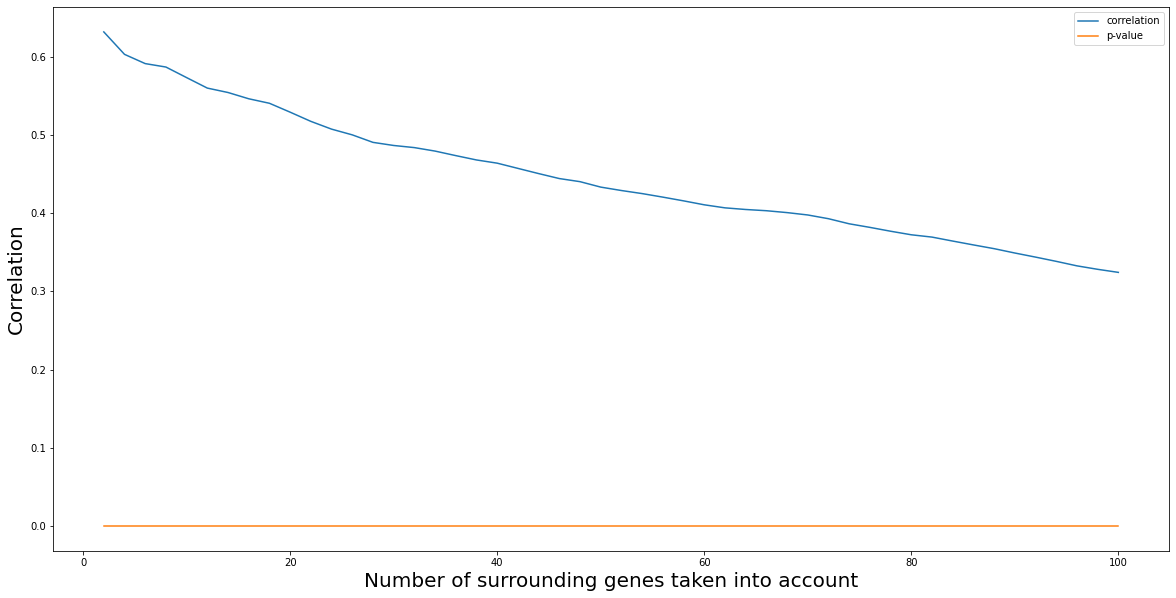

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(surrounding,corr, label=["correlation", "p-value"])
ax.set_xlabel("Number of surrounding genes taken into account", fontsize=20)
ax.set_ylabel("Correlation", fontsize=20)
ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "GCA_000006785.2_correlation.png")

In [153]:
n=3
corr_pearson=[]
corr=[]
num_genes=[]
for contig in listdir(project_path / "results" / "mobility_files"):
    if contig != ".DS_Store":
        print(contig)
        mobility_genome=pd.read_csv(project_path / "results" / "mobility_files" / contig).iloc[:,1:7]
        num_genes.append(len(mobility_genome))
        corr.append(correlation()[0])
        corr_pearson.append(correlation_pearson()[0])

GCA_001547045.1-LNMK01000058.1.csv
GCA_002945315.1-PTVQ01000114.1.csv
GCA_900683535.1-CAACXX010000001.1.csv
GCA_003545945.1-QXET01000027.1.csv
GCA_003712685.1-LKGB01000091.1.csv
GCA_000177755.1-ADHG01000007.1.csv
GCA_002948855.1-PTZZ01000016.1.csv
GCA_001645615.1-LWBT01000022.1.csv
GCA_900095045.1-FMBS01000014.1.csv
GCA_003465905.1-QSAX01000046.1.csv
GCA_003712965.1-LKGL01000033.1.csv
GCA_004553005.1-SFMS01000016.1.csv
GCA_001982115.1-MKEA01000027.1.csv
GCA_003712605.1-LKFX01000024.1.csv
GCA_006541085.1-VHRD01000016.1.csv
GCA_001656875.1-JTHV01000190.1.csv
GCA_002077355.1-MJDP01000007.1.csv
GCA_900095045.1-FMBS01000051.1.csv
GCA_003796745.1-RKNF01000008.1.csv
GCA_002948855.1-PTZZ01000053.1.csv
GCA_001754025.1-LWKN01000099.1.csv
GCA_003465905.1-QSAX01000003.1.csv
GCA_001657165.1-JTIU01000056.1.csv
GCA_001656685.1-JTIL01000029.1.csv
GCA_002416215.1-DICH01000037.1.csv
GCA_003797365.1-RKPA01000008.1.csv
GCA_002930795.1-PSQK01000006.1.csv
GCA_003797545.1-RKPN01000002.1.csv
GCA_000442765.1-F

GCA_902159875.1-CABGLT010000032.1.csv
GCA_003346015.1-QMJW01000043.1.csv
GCA_001981585.1-MJHG01000003.1.csv
GCA_002218925.1-LYRG01000025.1.csv
GCA_002949225.1-PTYE01000008.1.csv
GCA_002338165.1-DDHR01000142.1.csv
GCA_002554015.1-PCZB01000014.1.csv
GCA_000172655.1-ABQI01000022.1.csv
GCA_001982025.1-MKDR01000007.1.csv
GCA_003320815.1-KZ846543.1.csv
GCA_000414945.1-KE350230.1.csv
GCA_002946155.1-PTXI01000012.1.csv
GCA_002944075.1-PTTR01000043.1.csv
GCA_002383155.1-DFXL01000009.1.csv
GCA_003203895.1-QJOL01000022.1.csv
GCA_003346015.1-QMJW01000006.1.csv
GCA_002213365.1-LGUN01000015.1.csv
GCA_001981585.1-MJHG01000046.1.csv
GCA_003712865.1-LKFS01000070.1.csv
GCA_001982025.1-MKDR01000042.1.csv
GCA_001436485.1-AYYJ01000008.1.csv
GCA_000648155.1-AYOJ01000033.1.csv
GCA_001244395.1-CP012148.1.csv
GCA_005236355.1-QPVE01000030.1.csv
GCA_002945535.1-PTWD01000015.1.csv
GCA_002944075.1-PTTR01000006.1.csv
GCA_001982385.1-MKEG01000025.1.csv
GCA_004300245.1-SEYB01000004.1.csv
GCA_001005395.1-LAVW01000094.

GCA_002947365.1-PUAS01000077.1.csv
GCA_002947935.1-PTZX01000005.1.csv
GCA_902161965.1-CABGTW010000013.1.csv
GCA_002213345.1-LGUM01000017.1.csv
GCA_000149105.2-AEHP01000062.1.csv
GCA_000409955.1-ANML01000124.1.csv
GCA_000233395.2-AFWZ01000007.1.csv
GCA_002920935.1-PEKI01000031.1.csv
GCA_001546525.1-KQ957082.1.csv
GCA_004334905.1-QKVQ01000016.1.csv
GCA_000195355.2-AEYL01000379.1.csv
GCA_006541615.1-VHRJ01000006.1.csv
GCA_003465125.1-QSAN01000045.1.csv
GCA_000980505.1-LARO01000020.1.csv
GCA_902162045.1-CABGUA010000032.1.csv
GCA_001456475.1-LKLE01000041.1.csv
GCA_000295335.2-JH813172.1.csv
GCA_900240925.1-OESH01000047.1.csv
GCA_001754025.1-LWKN01000101.1.csv
GCA_006541255.1-VHRK01000016.1.csv
GCA_002945095.1-PTVG01000068.1.csv
GCA_002553775.1-PCYU01000002.1.csv
GCA_001064985.1-JVGG01000039.1.csv
GCA_004556365.1-SFHP01000020.1.csv
GCA_006375675.1-VFCA01000023.1.csv
GCA_001595615.1-LOMH01000007.1.csv
GCA_000604145.1-AWOY01000077.1.csv
GCA_000830535.1-JXAX01000017.1.csv
GCA_902159205.1-CABGJE

GCA_003712585.1-LKFU01000059.1.csv
GCA_000295335.2-JH813156.1.csv
GCA_000311945.1-AMQW01000010.1.csv
GCA_000410335.1-ANKB01000009.1.csv
GCA_001591725.1-BCVL01000029.1.csv
GCA_001433985.1-AZCM01000024.1.csv
GCA_004556365.1-SFHP01000004.1.csv
GCA_006375675.1-VFCA01000007.1.csv
GCA_001456835.1-LKLW01000102.1.csv
GCA_001595615.1-LOMH01000023.1.csv
GCA_000604145.1-AWOY01000053.1.csv
GCA_003465125.1-QSAN01000024.1.csv
GCA_902159205.1-CABGJE010000012.1.csv
GCA_902159245.1-CABGJC010000029.1.csv
GCA_001456475.1-LKLE01000020.1.csv
GCA_001633455.1-LUWX01000189.1.csv
GCA_004126315.1-PJXF01000019.1.csv
GCA_002945095.1-PTVG01000009.1.csv
GCA_901830435.1-CABFKX010000080.1.csv
GCA_001456545.1-LKLI01000025.1.csv
GCA_001541585.1-LJON01000070.1.csv
GCA_002077325.1-MJDR01000003.1.csv
GCA_000604145.1-AWOY01000016.1.csv
GCA_003712755.1-LKGG01000033.1.csv
GCA_005236355.1-QPVE01000029.1.csv
GCA_001005395.1-LAVW01000070.1.csv
GCA_002906095.1-NKCZ01000126.1.csv
GCA_001436485.1-AYYJ01000011.1.csv
GCA_000767355.1

GCA_002750695.1-MKDX01000002.1.csv
GCA_900447705.1-UGJC01000006.1.csv
GCA_002946315.1-PTWQ01000056.1.csv
GCA_003346025.1-QMJV01000023.1.csv
GCA_000751655.1-CCDT01000008.1.csv
GCA_000195355.2-AEYL01000590.1.csv
GCA_001982425.1-MSTB01000056.1.csv
GCA_001547045.1-LNMK01000041.1.csv
GCA_000410135.1-ANMH01000073.1.csv
GCA_902159055.1-CABGIK010000022.1.csv
GCA_005864165.1-VBSU01000028.1.csv
GCA_004101305.1-RDQA01000015.1.csv
GCA_002751765.1-MJHE01000088.1.csv
GCA_002906095.1-NKCZ01000083.1.csv
GCA_004167095.1-RCYE01000046.1.csv
GCA_003712825.1-LKGO01000028.1.csv
GCA_001639425.1-LUWA01000019.1.csv
GCA_004167095.1-RCYE01000003.1.csv
GCA_005234835.1-QPQY01000022.1.csv
GCA_001808965.1-KV795109.1.csv
GCA_003797365.1-RKPA01000011.1.csv
GCA_003712745.1-LKGI01000045.1.csv
GCA_002388095.1-DGLV01000034.1.csv
GCA_003046115.1-PZQM01000019.1.csv
GCA_004211735.1-SETI01000079.1.csv
GCA_003203985.1-QJOJ01000002.1.csv
GCA_002944675.1-PTVY01000051.1.csv
GCA_001715775.1-MDLS01000053.1.csv
GCA_001639455.1-LUWC0

GCA_001656915.1-JTHZ01000245.1.csv
GCA_000508405.1-AZHJ01000146.1.csv
GCA_002948245.1-PTZC01000034.1.csv
GCA_003713005.1-LKGM01000028.1.csv
GCA_006334475.1-QGEE01000006.1.csv
GCA_002532085.1-NIGM01000015.1.csv
GCA_002389105.1-DGNV01000091.1.csv
GCA_000309685.1-AFYP01000045.1.csv
GCA_001858275.1-MBTZ01000088.1.csv
GCA_003320135.1-KZ846178.1.csv
GCA_004103355.1-SCLX01000031.1.csv
GCA_005146285.1-SSHI01000087.1.csv
GCA_001547265.1-LNMQ01000117.1.csv
GCA_004167465.1-RCYF01000014.1.csv
GCA_001636215.1-LTDP01000027.1.csv
GCA_006376115.1-VFCY01000020.1.csv
GCA_001750885.1-CP014533.1.csv
GCA_003712385.1-LKFJ01000040.1.csv
GCA_004683785.1-SMZG01000093.1.csv
GCA_001006945.1-CDLD01000014.1.csv
GCA_006982025.1-SRLR01000048.1.csv
GCA_001076935.1-JVDQ01000025.1.csv
GCA_000466865.2-AVFG02000064.1.csv
GCA_002563575.1-MTJP01000014.1.csv
GCA_002003555.1-MUJA01000001.1.csv
GCA_004793575.1-SRYU01000026.1.csv
GCA_001053835.1-JWEB01000154.1.csv
GCA_003796865.1-RKNO01000015.1.csv
GCA_002107125.1-MSQU01000024

GCA_001544275.1-BCQE01000012.1.csv
GCA_001469115.1-LNQD01000007.1.csv
GCA_902159045.1-CABGIF010000022.1.csv
GCA_002161395.1-NFHQ01000009.1.csv
GCA_003712795.1-LKGH01000041.1.csv
GCA_000309725.1-AFYR01000068.1.csv
GCA_001437365.1-JQBQ01000016.1.csv
GCA_003320245.1-KZ846241.1.csv
GCA_002389105.1-DGNV01000134.1.csv
GCA_003545995.1-QNXC01000004.1.csv
GCA_900240895.1-OESJ01000047.1.csv
GCA_000499905.1-AWWN01000039.1.csv
GCA_004103165.1-RPCW01000034.1.csv
GCA_004099685.1-SCHY01000037.1.csv
GCA_002920935.1-PEKI01000028.1.csv
GCA_004099765.1-SCHW01000016.1.csv
GCA_000410475.1-ANKM01000003.1.csv
GCA_000175055.1-ACOZ01000058.1.csv
GCA_901933195.1-CABFNE010000030.1.csv
GCA_002277015.1-NCXG01000028.1.csv
GCA_001812615.1-KV809704.1.csv
GCA_001831275.1-MLKA01000020.1.csv
GCA_007109175.1-VJWU01000020.1.csv
GCA_000407565.1-ASWI01000003.1.csv
GCA_001005455.1-LAVX01000024.1.csv
GCA_000411655.1-ASAL01000022.1.csv
GCA_000163795.1-GG739723.1.csv
GCA_001704465.1-MCJG01000022.1.csv
GCA_001657025.1-JTIK010000

GCA_000407565.1-ASWI01000001.1.csv
GCA_001895375.1-MPSU01000048.1.csv
GCA_003346075.1-QMJU01000009.1.csv
GCA_001704465.1-MCJG01000020.1.csv
GCA_002079285.1-CP014988.1.csv
GCA_000410475.1-ANKM01000044.1.csv
GCA_001433755.1-AZCU01000016.1.csv
GCA_002453485.1-DKGZ01000019.1.csv
GCA_001812615.1-KV809743.1.csv
GCA_001456455.1-LKLD01000017.1.csv
GCA_000191685.2-AEXJ01000018.1.csv
GCA_006376105.1-VFCU01000026.1.csv
GCA_000442765.1-HF999988.1.csv
GCA_001005455.1-LAVX01000063.1.csv
GCA_001633545.1-LUWZ01000076.1.csv
GCA_000309705.1-AFYQ01000055.1.csv
GCA_000149125.2-AEHQ01000034.1.csv
GCA_000014545.1-CP000425.1.csv
GCA_000604145.1-AWOY01000029.1.csv
GCA_001025335.1-LDNH01000061.1.csv
GCA_004126315.1-PJXF01000026.1.csv
GCA_002270005.1-NIBA01000011.1.csv
GCA_900636615.1-LR134297.1.csv
GCA_002160105.1-NFJY01000022.1.csv
GCA_002993465.1-PVOB01000007.1.csv
GCA_002948075.1-PTZR01000005.1.csv
GCA_900078525.1-FJVL01000004.1.csv
GCA_000499925.1-AWWM01000004.1.csv
GCA_000721865.3-JNCC03000021.1.csv
GCA_0

GCA_000320325.1-AGVN01000016.1.csv
GCA_004368475.1-JXRL01000013.1.csv
GCA_001053835.1-JWEB01000033.1.csv
GCA_000415345.1-KE352375.1.csv
GCA_001563075.1-LSFS01000018.1.csv
GCA_002027405.1-MWVD01000013.1.csv
GCA_000407465.1-ASWC01000001.1.csv
GCA_004101505.1-CP035146.1.csv
GCA_000177575.1-ADGR01000158.1.csv
GCA_002848295.1-PKGK01000006.1.csv
GCA_004125955.1-PJWV01000013.1.csv
GCA_002944235.1-PTUB01000137.1.csv
GCA_000410215.1-ANJT01000189.1.csv
GCA_001017475.1-LAVD01000054.1.csv
GCA_004369165.1-MSGR01000012.1.csv
GCA_000966475.1-JZSB01000004.1.csv
GCA_006334415.1-QFCR01000011.1.csv
GCA_902159145.1-CABGIW010000018.1.csv
GCA_004795205.1-SSBR01000014.1.csv
GCA_002946915.1-PUBL01000117.1.csv
GCA_002322075.1-DCNS01000032.1.csv
GCA_001715735.1-MDLM01000023.1.csv
GCA_002218765.1-LYQV01000021.1.csv
GCA_000761565.1-JRKY01000048.1.csv
GCA_000234175.1-JH376940.1.csv
GCA_900248205.2-OGTW02000015.1.csv
GCA_004099985.1-SCII01000018.1.csv
GCA_000687495.1-JHWA01000027.1.csv
GCA_001715725.1-MDLP01000001.

GCA_002907325.1-MIYG01000005.1.csv
GCA_002945715.1-PTWR01000048.1.csv
GCA_002943545.1-CP025415.1.csv
GCA_000172875.1-ABSC01000340.1.csv
GCA_000442845.1-CBLU010000020.1.csv
GCA_000410455.1-ANKI01000007.1.csv
GCA_002174365.1-NIBL01000001.1.csv
GCA_002944615.1-PTUW01000031.1.csv
GCA_001433975.1-AZCY01000002.1.csv
GCA_001656685.1-JTIL01000032.1.csv
GCA_001880185.2-CP013150.1.csv
GCA_003795975.1-RKNU01000028.1.csv
GCA_002213385.1-LGUO01000021.1.csv
GCA_004553045.1-SFML01000010.1.csv
GCA_003465905.1-QSAX01000018.1.csv
GCA_002945575.1-PTWH01000047.1.csv
GCA_000391745.1-KB932604.1.csv
GCA_003346025.1-QMJV01000064.1.csv
GCA_001025405.1-LDNK01000071.1.csv
GCA_002861805.1-PKIV01000024.1.csv
GCA_001982425.1-MSTB01000011.1.csv
GCA_002948855.1-PTZZ01000048.1.csv
GCA_003796745.1-RKNF01000013.1.csv
GCA_002218615.1-LYQR01000031.1.csv
GCA_001657025.1-JTIK01000200.1.csv
GCA_900290105.1-OKQV01000010.1.csv
GCA_001657165.1-JTIU01000008.1.csv
GCA_902165155.1-CABHFI010000023.1.csv
GCA_001656845.1-JTHU01000025

GCA_003346265.1-QMJP01000014.1.csv
GCA_001716015.1-MDLQ01000080.1.csv
GCA_001982205.1-MKEE01000050.1.csv
GCA_001982195.1-MKED01000030.1.csv
GCA_000410255.1-ANJV01000003.1.csv
GCA_002077545.1-MJDT01000010.1.csv
GCA_003838385.1-RAGE01000002.1.csv
GCA_004681235.1-SRLG01000015.1.csv
GCA_002993395.1-PVNW01000032.1.csv
GCA_002091995.1-MODT01000050.1.csv
GCA_000510825.1-AZOE01000010.1.csv
GCA_002077515.1-MJEF01000027.1.csv
GCA_006541905.1-VHRU01000009.1.csv
GCA_000172875.1-ABSC01000284.1.csv
GCA_002863245.1-PKKH01000021.1.csv
GCA_002945315.1-PTVQ01000073.1.csv
GCA_002389865.1-DGRB01000028.1.csv
GCA_002141205.1-NGMP01000003.1.csv
GCA_003320195.1-KZ846213.1.csv
GCA_001715645.1-MDLL01000061.1.csv
GCA_902160905.1-CABGPQ010000008.1.csv
GCA_000415465.2-KE352789.1.csv
GCA_001068015.1-JULF01000137.1.csv
GCA_004118305.1-SAXB01000037.1.csv
GCA_003315575.1-PQWW01000011.1.csv
GCA_001633455.1-LUWX01000152.1.csv
GCA_002077385.1-MJDU01000018.1.csv
GCA_001456775.1-LKLO01000038.1.csv
GCA_000148245.1-GL456473.

GCA_000415145.1-KE351460.1.csv
GCA_004211735.1-SETI01000027.1.csv
GCA_000759595.1-JRFX01000004.1.csv
GCA_000648195.1-AYOL01000038.1.csv
GCA_007096405.1-VJWS01000011.1.csv
GCA_002414465.1-DHZB01000019.1.csv
GCA_000648095.1-AYLN01000012.1.csv
GCA_001540885.1-LDEJ01000007.1.csv
GCA_001541535.1-LJOM01000086.1.csv
GCA_001715775.1-MDLS01000048.1.csv
GCA_001596195.1-LSST01000036.1.csv
GCA_001456755.1-LKLM01000010.1.csv
GCA_003203985.1-QJOJ01000019.1.csv
GCA_004361545.1-NKLF01000005.1.csv
GCA_004211735.1-SETI01000062.1.csv
GCA_003046115.1-PZQM01000002.1.csv
GCA_000759595.1-JRFX01000041.1.csv
GCA_001657195.1-JTIX01000082.1.csv
GCA_001076595.1-JVNI01000081.1.csv
GCA_002218685.1-LYQY01000033.1.csv
GCA_001456505.1-LKLH01000135.1.csv
GCA_002269965.1-NIBD01000052.1.csv
GCA_001982405.1-MKEH01000037.1.csv
GCA_002945715.1-PTWR01000051.1.csv
GCA_006539405.1-BJMY01000016.1.csv
GCA_006334515.1-QKWR01000010.1.csv
GCA_000736295.5-JPKN03000122.1.csv
GCA_000410135.1-ANMH01000095.1.csv
GCA_003796365.1-RKOO0100

GCA_002947695.1-PUAJ01000053.1.csv
GCA_001715725.1-MDLP01000018.1.csv
GCA_002944015.1-PTTX01000004.1.csv
GCA_004099985.1-SCII01000001.1.csv
GCA_003712705.1-LKGC01000039.1.csv
GCA_002993385.1-PVNZ01000021.1.csv
GCA_000761565.1-JRKY01000051.1.csv
GCA_003709415.1-RDQI01000005.1.csv
GCA_002218765.1-LYQV01000038.1.csv
GCA_902159145.1-CABGIW010000001.1.csv
GCA_006334415.1-QFCR01000008.1.csv
GCA_001662895.1-LYUK01000043.1.csv
GCA_001982385.1-MKEG01000027.1.csv
GCA_004681235.1-SRLG01000028.1.csv
GCA_001005395.1-LAVW01000096.1.csv
GCA_004300245.1-SEYB01000006.1.csv
GCA_001754005.1-MEGY01000016.1.csv
GCA_005238815.1-QPYT01000043.1.csv
GCA_000731855.1-JIBX01000008.1.csv
GCA_003346265.1-QMJP01000029.1.csv
GCA_000764985.1-JRHQ01000117.1.csv
GCA_002360265.1-NSDE01000079.1.csv
GCA_003263965.1-NAQP01000043.1.csv
GCA_902159525.1-CABGKH010000023.1.csv
GCA_004122955.1-SDJX01000010.1.csv
GCA_000410275.1-ANJX01000242.1.csv
GCA_002406765.1-NXET01000029.1.csv
GCA_001754005.1-MEGY01000053.1.csv
GCA_001982205.

GCA_003264015.1-NAQS01000030.1.csv
GCA_001982085.1-MKFZ01000016.1.csv
GCA_003203875.1-QJOK01000018.1.csv
GCA_003346235.1-QMJS01000005.1.csv
GCA_902159095.1-CABGIQ010000011.1.csv
GCA_002947735.1-PUAH01000002.1.csv
GCA_002212045.1-LIJA01000006.1.csv
GCA_001622285.1-LITA01000004.1.csv
GCA_000472345.1-AWZQ01000030.1.csv
GCA_001982085.1-MKFZ01000053.1.csv
GCA_003264015.1-NAQS01000075.1.csv
GCA_901212575.1-CAAKOE010000017.1.csv
GCA_000162315.1-GG704614.1.csv
GCA_004330425.1-SEHG01000054.1.csv
GCA_001434005.1-AZCW01000037.1.csv
GCA_003346235.1-QMJS01000040.1.csv
GCA_000648015.1-AYKK01000025.1.csv
GCA_001055955.1-JVPJ01000041.1.csv
GCA_000406985.1-KE136387.1.csv
GCA_006538645.1-BJLM01000017.1.csv
GCA_002947735.1-PUAH01000047.1.csv
GCA_002389105.1-DGNV01000073.1.csv
GCA_003795795.1-RKNC01000014.1.csv
GCA_902160305.1-CABGND010000031.1.csv
GCA_004127055.1-PJVW01000011.1.csv
GCA_006334475.1-QGEE01000019.1.csv
GCA_003713005.1-LKGM01000037.1.csv
GCA_000179375.1-AEAT01000042.1.csv
GCA_000447925.1-ATB

GCA_902159875.1-CABGLT010000009.1.csv
GCA_001981585.1-MJHG01000038.1.csv
GCA_002949225.1-PTYE01000033.1.csv
GCA_001981785.1-MKDF01000031.1.csv
GCA_001025385.1-LDNJ01000003.1.csv
GCA_002441825.1-JXKC01000002.1.csv
GCA_003796805.1-RKNR01000002.1.csv
GCA_001705215.1-MCRG01000010.1.csv
GCA_004099685.1-SCHY01000028.1.csv
GCA_001437365.1-JQBQ01000009.1.csv
GCA_900240895.1-OESJ01000058.1.csv
GCA_000499905.1-AWWN01000026.1.csv
GCA_005236155.1-QPUI01000043.1.csv
GCA_002161395.1-NFHQ01000016.1.csv
GCA_000309725.1-AFYR01000077.1.csv
GCA_001766735.1-MIQF01000045.1.csv
GCA_901212505.1-CAAKNX010000170.1.csv
GCA_902165765.1-CABHHT010000012.1.csv
GCA_003712645.1-LKFZ01000051.1.csv
GCA_002005795.1-MUYF01000003.1.csv
GCA_001469115.1-LNQD01000018.1.csv
GCA_001025385.1-LDNJ01000046.1.csv
GCA_001622225.1-LIYG01000093.1.csv
GCA_901830365.1-CABFLB010000090.1.csv
GCA_001807185.1-KV788041.1.csv
GCA_005236155.1-QPUI01000006.1.csv
GCA_000414965.1-KE350254.1.csv
GCA_000309725.1-AFYR01000032.1.csv
GCA_001025325.1-

GCA_002440525.1-DJUO01000008.1.csv
GCA_003263965.1-NAQP01000002.1.csv
GCA_001814765.1-KV817726.1.csv
GCA_002077545.1-MJDT01000029.1.csv
GCA_001754005.1-MEGY01000012.1.csv
GCA_902159065.1-CABGIE010000009.1.csv
GCA_002218735.1-LYQZ01000004.1.csv
GCA_002403695.1-DHIG01000032.1.csv
GCA_001657195.1-JTIX01000166.1.csv
GCA_001982385.1-MKEG01000066.1.csv
GCA_002944395.1-PTUF01000034.1.csv
GCA_004122955.1-SDJX01000014.1.csv
GCA_000787065.1-JRGY01000077.1.csv
GCA_002218735.1-LYQZ01000041.1.csv
GCA_002554085.1-PCZI01000009.1.csv
GCA_000410275.1-ANJX01000246.1.csv
GCA_002218695.1-LYQW01000004.1.csv
GCA_005238815.1-QPYT01000002.1.csv
GCA_001005625.1-LAZE01000005.1.csv
GCA_001657195.1-JTIX01000123.1.csv
GCA_000767355.1-JRUH01000020.1.csv
GCA_000743075.1-JPZB01000007.1.csv
GCA_005864125.1-VBSS01000025.1.csv
GCA_001656845.1-JTHU01000125.1.csv
GCA_001990645.1-MSTR01000009.1.csv
GCA_002077495.1-MJED01000011.1.csv
GCA_902159265.1-CABGJB010000005.1.csv
GCA_006375995.1-VFCQ01000009.1.csv
GCA_002884735.1-PN

GCA_001982205.1-MKEE01000008.1.csv
GCA_002477395.1-DLPN01000020.1.csv
GCA_000493355.1-HG530732.1.csv
GCA_000743075.1-JPZB01000023.1.csv
GCA_001656845.1-JTHU01000101.1.csv
GCA_000295335.2-JH813190.1.csv
GCA_005864125.1-VBSS01000001.1.csv
GCA_004570995.1-SPOW01000001.1.csv
GCA_003712665.1-LKGA01000013.1.csv
GCA_000784405.1-AYTQ01000046.1.csv
GCA_003263975.1-NAQQ01000038.1.csv
GCA_902159265.1-CABGJB010000021.1.csv
GCA_000179955.1-AEKI01000009.1.csv
GCA_002307895.1-DBUG01000010.1.csv
GCA_000604145.1-AWOY01000095.1.csv
GCA_004099805.1-SCHU01000021.1.csv
GCA_001456775.1-LKLO01000025.1.csv
GCA_000510825.1-AZOE01000048.1.csv
GCA_902160905.1-CABGPQ010000015.1.csv
GCA_001076595.1-JVNI01000141.1.csv
GCA_001811285.1-KV804093.1.csv
GCA_002077385.1-MJDU01000005.1.csv
GCA_000410315.1-ANJZ01000194.1.csv
GCA_000784405.1-AYTQ01000003.1.csv
GCA_001302645.1-CP012659.1.csv
GCA_003712325.1-LKFL01000051.1.csv
GCA_001270785.1-LIGY01000154.1.csv
GCA_004126655.1-PJVK01000027.1.csv
GCA_901830435.1-CABFKX01000004

GCA_001540885.1-LDEJ01000027.1.csv
GCA_001280825.1-LGAO01000046.1.csv
GCA_002863485.1-PKKF01000019.1.csv
GCA_003203985.1-QJOJ01000039.1.csv
GCA_001456755.1-LKLM01000030.1.csv
GCA_003712745.1-LKGI01000083.1.csv
GCA_002946895.1-PUBJ01000025.1.csv
GCA_001715775.1-MDLS01000068.1.csv
GCA_000493555.1-HG531060.1.csv
GCA_000493355.1-HG530697.1.csv
GCA_900639485.1-LR135308.1.csv
GCA_003046115.1-PZQM01000022.1.csv
GCA_002944615.1-PTUW01000008.1.csv
GCA_000410315.1-ANJZ01000074.1.csv
GCA_002591965.2-NPOO02000002.1.csv
GCA_002945715.1-PTWR01000071.1.csv
GCA_001982405.1-MKEH01000017.1.csv
GCA_001811285.1-KV804136.1.csv
GCA_003712925.1-LKFN01000103.1.csv
GCA_002218685.1-LYQY01000056.1.csv
GCA_000410315.1-ANJZ01000031.1.csv
GCA_003796365.1-RKOO01000009.1.csv
GCA_003702635.1-RDCJ01000108.1.csv
GCA_001982405.1-MKEH01000052.1.csv
GCA_900112655.1-FOMP01000006.1.csv
GCA_902159055.1-CABGIK010000019.1.csv
GCA_002948855.1-PTZZ01000034.1.csv
GCA_900095045.1-FMBS01000036.1.csv
GCA_003545945.1-QXET01000005.1.cs

GCA_000155935.2-GL531762.1.csv
GCA_001068345.1-JUKW01000022.1.csv
GCA_002107085.1-MSQR01000001.1.csv
GCA_001436035.1-AYYM01000018.1.csv
GCA_000409855.1-ANKW01000022.1.csv
GCA_003264015.1-NAQS01000014.1.csv
GCA_006376285.1-VFDG01000039.1.csv
GCA_003346235.1-QMJS01000021.1.csv
GCA_004330425.1-SEHG01000035.1.csv
GCA_002389105.1-DGNV01000012.1.csv
GCA_002947735.1-PUAH01000026.1.csv
GCA_002212045.1-LIJA01000022.1.csv
GCA_902159095.1-CABGIQ010000035.1.csv
GCA_000472345.1-AWZQ01000014.1.csv
GCA_000958505.1-BAYN01000028.1.csv
GCA_001434005.1-AZCW01000013.1.csv
GCA_004330425.1-SEHG01000070.1.csv
GCA_901543455.1-CABEIQ010000010.1.csv
GCA_000648015.1-AYKK01000001.1.csv
GCA_005844995.1-SPFM01000038.1.csv
GCA_000410275.1-ANJX01000006.1.csv
GCA_002948375.1-PTYW01000011.1.csv
GCA_000415145.1-KE351438.1.csv
GCA_001715775.1-MDLS01000055.1.csv
GCA_002946895.1-PUBJ01000018.1.csv
GCA_002944675.1-PTVY01000057.1.csv
GCA_003203985.1-QJOJ01000004.1.csv
GCA_002414465.1-DHZB01000004.1.csv
GCA_001657005.1-JTIF01

GCA_001814335.1-KV816100.1.csv
GCA_902159105.1-CABGIR010000019.1.csv
GCA_000247735.2-AGRI01000002.1.csv
GCA_000499025.1-AWYG01000038.1.csv
GCA_003962845.1-QNGH01000010.1.csv
GCA_001656925.1-JTIB01000010.1.csv
GCA_001421115.1-JXCW01000002.1.csv
GCA_001806515.1-MJEK01000009.1.csv
GCA_000295275.2-JH811501.1.csv
GCA_004368475.1-JXRL01000017.1.csv
GCA_002078495.1-CP016715.1.csv
GCA_002861775.1-PKIX01000015.1.csv
GCA_001456785.1-LKLU01000126.1.csv
GCA_001576665.1-LOHT01000185.1.csv
GCA_002027405.1-MWVD01000017.1.csv
GCA_001435795.1-AZFL01000135.1.csv
GCA_004125955.1-PJWV01000017.1.csv
GCA_003938285.1-RHVG01000029.1.csv
GCA_002848295.1-PKGK01000002.1.csv
GCA_002148875.1-NCSN01000017.1.csv
GCA_000410315.1-ANJZ01000255.1.csv
GCA_001633575.1-LUXB01000083.1.csv
GCA_006334415.1-QFCR01000015.1.csv
GCA_004369165.1-MSGR01000016.1.csv
GCA_002322075.1-DCNS01000036.1.csv
GCA_003709415.1-RDQI01000018.1.csv
GCA_004795205.1-SSBR01000010.1.csv
GCA_000415325.2-KE352255.1.csv
GCA_900218095.1-OBMV01000029.1.cs

GCA_002945495.1-PTWO01000026.1.csv
GCA_002219045.1-LYRL01000019.1.csv
GCA_002947295.1-PUAV01000076.1.csv
GCA_002848295.1-PKGK01000045.1.csv
GCA_001814335.1-KV816102.1.csv
GCA_003962845.1-QNGH01000012.1.csv
GCA_001656925.1-JTIB01000012.1.csv
GCA_900143345.1-FRED01000031.1.csv
GCA_001633595.1-LUXD01000012.1.csv
GCA_004368475.1-JXRL01000015.1.csv
GCA_000226235.1-JH158978.1.csv
GCA_001547265.1-LNMQ01000033.1.csv
GCA_000320325.1-AGVN01000010.1.csv
GCA_002861775.1-PKIX01000017.1.csv
GCA_002947295.1-PUAV01000033.1.csv
GCA_002027405.1-MWVD01000015.1.csv
GCA_000415345.1-KE352373.1.csv
GCA_902163985.1-CABHBK010000010.1.csv
GCA_004125955.1-PJWV01000015.1.csv
GCA_002148875.1-NCSN01000015.1.csv
GCA_002947775.1-PUAD01000028.1.csv
GCA_001546015.1-LJCZ01000072.1.csv
GCA_000966475.1-JZSB01000002.1.csv
GCA_001017475.1-LAVD01000052.1.csv
GCA_002218765.1-LYQV01000027.1.csv
GCA_002946915.1-PUBL01000111.1.csv
GCA_004795205.1-SSBR01000012.1.csv
GCA_001656575.1-JTHX01000034.1.csv
GCA_000415325.2-KE352257.1.cs

GCA_002391825.1-DGFT01000040.1.csv
GCA_001656915.1-JTHZ01000018.1.csv
GCA_006334425.1-QGEF01000017.1.csv
GCA_003814325.1-CP031018.1.csv
GCA_001572665.1-LSNG01000030.1.csv
GCA_002945535.1-PTWD01000035.1.csv
GCA_000648755.1-JMEL01000005.1.csv
GCA_001017475.1-LAVD01000092.1.csv
GCA_002944975.1-PTVD01000023.1.csv
GCA_000410275.1-ANJX01000124.1.csv
GCA_004102845.1-RBAI01000035.1.csv
GCA_001059285.1-JUPQ01000714.1.csv
GCA_000182855.2-CP002612.1.csv
GCA_001544275.1-BCQE01000016.1.csv
GCA_000648755.1-JMEL01000040.1.csv
GCA_902165765.1-CABHHT010000009.1.csv
GCA_004369165.1-MSGR01000091.1.csv
GCA_900240895.1-OESJ01000043.1.csv
GCA_900332055.1-OUNB01000004.1.csv
GCA_001437365.1-JQBQ01000012.1.csv
GCA_003320245.1-KZ846245.1.csv
GCA_004099685.1-SCHY01000033.1.csv
GCA_002441825.1-JXKC01000019.1.csv
GCA_004103165.1-RPCW01000030.1.csv
GCA_900248205.2-OGTW02000096.1.csv
GCA_003712425.1-LKFM01000107.1.csv
GCA_004099765.1-SCHW01000012.1.csv
GCA_000410795.1-ASJE01000068.1.csv
GCA_901933195.1-CABFNE0100000

GCA_002360185.1-NSDF01000026.1.csv
GCA_004123105.1-SDJV01000015.1.csv
GCA_007096695.1-VJWR01000035.1.csv
GCA_902159225.1-CABGIX010000024.1.csv
GCA_002944735.1-PTVX01000018.1.csv
GCA_000409935.1-ANMK01000123.1.csv
GCA_007096405.1-VJWS01000033.1.csv
GCA_002944535.1-PTUZ01000057.1.csv
GCA_001005395.1-LAVW01000154.1.csv
GCA_000648095.1-AYLN01000030.1.csv
GCA_001280825.1-LGAO01000044.1.csv
GCA_001540885.1-LDEJ01000025.1.csv
GCA_002751765.1-MJHE01000009.1.csv
GCA_003712745.1-LKGI01000081.1.csv
GCA_001456755.1-LKLM01000032.1.csv
GCA_004361545.1-NKLF01000027.1.csv
GCA_003046115.1-PZQM01000020.1.csv
GCA_000759595.1-JRFX01000063.1.csv
GCA_000493355.1-HG530695.1.csv
GCA_001811285.1-KV804171.1.csv
GCA_001456505.1-LKLH01000117.1.csv
GCA_000604145.1-AWOY01000132.1.csv
GCA_001700475.1-MAKH01000070.1.csv
GCA_001456615.1-LKLN01000075.1.csv
GCA_001982405.1-MKEH01000015.1.csv
GCA_001657255.1-JUIQ01000158.1.csv
GCA_002993465.1-PVOB01000159.1.csv
GCA_000014525.1-CP000424.1.csv
GCA_000173255.2-ABWJ01000029.

GCA_001541505.1-LJOL01000004.1.csv
GCA_001025335.1-LDNH01000043.1.csv
GCA_003712585.1-LKFU01000001.1.csv
GCA_900078525.1-FJVL01000026.1.csv
GCA_002993465.1-PVOB01000025.1.csv
GCA_003264145.1-NAQX01000055.1.csv
GCA_002948075.1-PTZR01000027.1.csv
GCA_000157655.1-GG670331.1.csv
GCA_003465125.1-QSAN01000039.1.csv
GCA_000387565.1-ALPY01000018.1.csv
GCA_002945175.1-PTVK01000047.1.csv
GCA_006491895.1-VHIL01000010.1.csv
GCA_000147905.1-GL454154.1.csv
GCA_000309705.1-AFYQ01000032.1.csv
GCA_004556365.1-SFHP01000019.1.csv
GCA_005234805.1-QPQX01000003.1.csv
GCA_004125775.1-PJWK01000003.1.csv
GCA_002088065.1-NAQY01000016.1.csv
GCA_000410335.1-ANKB01000014.1.csv
GCA_001025335.1-LDNH01000006.1.csv
GCA_002863445.1-PKKB01000001.1.csv
GCA_000493455.1-HG530781.1.csv
GCA_002287645.1-NRQX01000181.1.csv
GCA_000736295.5-JPKN03000039.1.csv
GCA_000980505.1-LARO01000019.1.csv
GCA_003945985.1-NCVP01000039.1.csv
GCA_003319265.1-KZ845730.1.csv
GCA_002338165.1-DDHR01000146.1.csv
GCA_002554015.1-PCZB01000010.1.csv
G

GCA_001076935.1-JVDQ01000040.1.csv
GCA_002949075.1-PTYZ01000026.1.csv
GCA_002213385.1-LGUO01000003.1.csv
GCA_001656685.1-JTIL01000010.1.csv
GCA_902165155.1-CABHFI010000044.1.csv
GCA_003712265.1-LKFH01000009.1.csv
GCA_002165725.1-MQNL01000012.1.csv
GCA_002946315.1-PTWQ01000033.1.csv
GCA_004923245.1-SIHT01000017.1.csv
GCA_002861805.1-PKIV01000006.1.csv
GCA_001982425.1-MSTB01000033.1.csv
GCA_000195355.2-AEYL01000124.1.csv
GCA_003712245.1-LKFG01000006.1.csv
GCA_900290105.1-OKQV01000032.1.csv
GCA_001456835.1-LKLW01000087.1.csv
GCA_000410135.1-ANMH01000016.1.csv
GCA_001547045.1-LNMK01000024.1.csv
GCA_002750695.1-MKDX01000022.1.csv
GCA_902165155.1-CABHFI010000001.1.csv
GCA_001991035.1-MTJY01000034.1.csv
GCA_003712835.1-LKGP01000058.1.csv
GCA_002213385.1-LGUO01000046.1.csv
GCA_002165725.1-MQNL01000057.1.csv
GCA_902159285.1-CABGJK010000012.1.csv
GCA_003346025.1-QMJV01000003.1.csv
GCA_001576665.1-LOHT01000307.1.csv
GCA_000410135.1-ANMH01000053.1.csv
GCA_902159055.1-CABGIK010000002.1.csv
GCA_0015

GCA_001831225.1-MLKC01000002.1.csv
GCA_001005455.1-LAVX01000039.1.csv
GCA_000410215.1-ANJT01000113.1.csv
GCA_002382365.1-DGAH01000026.1.csv
GCA_002947935.1-PTZX01000001.1.csv
GCA_902161965.1-CABGTW010000017.1.csv
GCA_002453485.1-DKGZ01000043.1.csv
GCA_000175055.1-ACOZ01000045.1.csv
GCA_002213345.1-LGUM01000013.1.csv
GCA_003048275.1-PYGR01000036.1.csv
GCA_001858385.1-MBRI01000049.1.csv
GCA_002945615.1-PTWG01000033.1.csv
GCA_000410795.1-ASJE01000071.1.csv
GCA_002277015.1-NCXG01000035.1.csv
GCA_001547355.1-LNLE01000076.1.csv
GCA_004334905.1-QKVQ01000012.1.csv
GCA_000409955.1-ANML01000120.1.csv
GCA_000233395.2-AFWZ01000003.1.csv
GCA_000980505.1-LARO01000024.1.csv
GCA_902162045.1-CABGUA010000036.1.csv
GCA_006541615.1-VHRJ01000002.1.csv
GCA_003465125.1-QSAN01000041.1.csv
GCA_900240925.1-OESH01000043.1.csv
GCA_006541255.1-VHRK01000012.1.csv
GCA_000149065.2-AEHN01000015.1.csv
GCA_000410435.1-ANKH01000478.1.csv
GCA_003712925.1-LKFN01000005.1.csv
GCA_000410495.1-ANLF01000009.1.csv
GCA_001433985.

GCA_001433975.1-AZCY01000003.1.csv
GCA_002944615.1-PTUW01000030.1.csv
GCA_001456595.1-LKLL01000006.1.csv
GCA_003712585.1-LKFU01000102.1.csv
GCA_001076595.1-JVNI01000099.1.csv
GCA_000410455.1-ANKI01000006.1.csv
GCA_003796365.1-RKOO01000031.1.csv
GCA_000969475.1-JZUI01000072.1.csv
GCA_001469145.1-LMVD01000027.1.csv
GCA_001540895.1-LDEK01000001.1.csv
GCA_000179935.1-AEKH01000005.1.csv
GCA_003712265.1-LKFH01000092.1.csv
GCA_006334515.1-QKWR01000008.1.csv
GCA_000410235.1-ANJU01000025.1.csv
GCA_004361565.1-NKLK01000025.1.csv
GCA_000189515.1-CP002430.1.csv
GCA_000173255.2-ABWJ01000013.1.csv
GCA_000195355.2-AEYL01000593.1.csv
GCA_002945575.1-PTWH01000003.1.csv
GCA_001656845.1-JTHU01000024.1.csv
GCA_003712965.1-LKGL01000029.1.csv
GCA_001076595.1-JVNI01000021.1.csv
GCA_900447705.1-UGJC01000005.1.csv
GCA_003346025.1-QMJV01000020.1.csv
GCA_002750695.1-MKDX01000001.1.csv
GCA_902165155.1-CABHFI010000022.1.csv
GCA_001991035.1-MTJY01000017.1.csv
GCA_902159055.1-CABGIK010000021.1.csv
GCA_001547045.1-LN

GCA_001456475.1-LKLE01000023.1.csv
GCA_902159205.1-CABGJE010000011.1.csv
GCA_002945175.1-PTVK01000059.1.csv
GCA_003465125.1-QSAN01000027.1.csv
GCA_003712755.1-LKGG01000030.1.csv
GCA_004556365.1-SFHP01000042.1.csv
GCA_000309705.1-AFYQ01000069.1.csv
GCA_000604145.1-AWOY01000015.1.csv
GCA_003712325.1-LKFL01000094.1.csv
GCA_901830435.1-CABFKX010000083.1.csv
GCA_000311945.1-AMQW01000013.1.csv
GCA_003702565.1-RDCH01000032.1.csv
GCA_000980505.1-LARO01000007.1.csv
GCA_902162045.1-CABGUA010000015.1.csv
GCA_006541615.1-VHRJ01000021.1.csv
GCA_000387565.1-ALPY01000043.1.csv
GCA_002088065.1-NAQY01000008.1.csv
GCA_001595615.1-LOMH01000020.1.csv
GCA_000604145.1-AWOY01000050.1.csv
GCA_001639625.1-LUWL01000003.1.csv
GCA_004556365.1-SFHP01000007.1.csv
GCA_006375675.1-VFCA01000004.1.csv
GCA_001433985.1-AZCM01000027.1.csv
GCA_002946155.1-PTXI01000008.1.csv
GCA_001435215.1-AZFR01000204.1.csv
GCA_004793905.1-SRYS01000024.1.csv
GCA_002383155.1-DFXL01000013.1.csv
GCA_902159875.1-CABGLT010000028.1.csv
GCA_0033

GCA_002077355.1-MJDP01000020.1.csv
GCA_004923245.1-SIHT01000009.1.csv
GCA_902165245.1-CABHGE010000011.1.csv
GCA_006541085.1-VHRD01000031.1.csv
GCA_003712245.1-LKFG01000018.1.csv
GCA_001982115.1-MKEA01000045.1.csv
GCA_000159675.1-GG669063.1.csv
GCA_003795975.1-RKNU01000014.1.csv
GCA_003712605.1-LKFX01000046.1.csv
GCA_001633455.1-LUWX01000057.1.csv
GCA_003465905.1-QSAX01000024.1.csv
GCA_002287645.1-NRQX01000007.1.csv
GCA_003712965.1-LKGL01000051.1.csv
GCA_003712265.1-LKFH01000017.1.csv
GCA_001068015.1-JULF01000032.1.csv
GCA_001576665.1-LOHT01000319.1.csv
GCA_001645615.1-LWBT01000005.1.csv
GCA_001982425.1-MSTB01000068.1.csv
GCA_900112655.1-FOMP01000003.1.csv
GCA_002218615.1-LYQR01000048.1.csv
GCA_002900075.1-LGJA01000009.1.csv
GCA_003712835.1-LKGP01000046.1.csv
GCA_003796045.1-RKNX01000002.1.csv
GCA_001657165.1-JTIU01000034.1.csv
GCA_003712265.1-LKFH01000052.1.csv
GCA_001656845.1-JTHU01000019.1.csv
GCA_005236045.1-QPTY01000005.1.csv
GCA_001808965.1-KV795172.1.csv
GCA_003321045.1-KZ846699.

GCA_002077535.1-MJEE01000024.1.csv
GCA_001888505.1-LEBG01000022.1.csv
GCA_000787065.1-JRGY01000072.1.csv
GCA_001754005.1-MEGY01000052.1.csv
GCA_002406765.1-NXET01000028.1.csv
GCA_002218695.1-LYQW01000001.1.csv
GCA_001982385.1-MKEG01000063.1.csv
GCA_002944395.1-PTUF01000031.1.csv
GCA_002360265.1-NSDE01000078.1.csv
GCA_004122955.1-SDJX01000011.1.csv
GCA_003346265.1-QMJP01000028.1.csv
GCA_002477395.1-DLPN01000001.1.csv
GCA_001066565.1-JUQW01000040.1.csv
GCA_000767355.1-JRUH01000025.1.csv
GCA_000493355.1-HG530713.1.csv
GCA_005238815.1-QPYT01000007.1.csv
GCA_000787065.1-JRGY01000037.1.csv
GCA_001754005.1-MEGY01000017.1.csv
GCA_002218735.1-LYQZ01000001.1.csv
GCA_004300245.1-SEYB01000007.1.csv
GCA_001982385.1-MKEG01000026.1.csv
GCA_004681235.1-SRLG01000029.1.csv
GCA_000731855.1-JIBX01000009.1.csv
GCA_001066565.1-JUQW01000005.1.csv
GCA_001657195.1-JTIX01000163.1.csv
GCA_002403695.1-DHIG01000037.1.csv
GCA_000784405.1-AYTQ01000022.1.csv
GCA_902160905.1-CABGPQ010000034.1.csv
GCA_003712925.1-LKFN0

GCA_001858275.1-MBTZ01000052.1.csv
GCA_001809485.1-KV797799.1.csv
GCA_003795965.1-RKNP01000037.1.csv
GCA_006381655.1-VFCD01000023.1.csv
GCA_902159345.1-CABGJZ010000012.1.csv
GCA_005844995.1-SPFM01000024.1.csv
GCA_001455425.1-LKPH01000023.1.csv
GCA_002948755.1-PTXZ01000037.1.csv
GCA_901212505.1-CAAKNX010000010.1.csv
GCA_000472345.1-AWZQ01000008.1.csv
GCA_000410095.1-ANLE01000404.1.csv
GCA_902159195.1-CABGIZ010000002.1.csv
GCA_001672265.1-KV467176.1.csv
GCA_000699985.1-JMSI01000003.1.csv
GCA_000508405.1-AZHJ01000161.1.csv
GCA_001456675.1-LKLR01000089.1.csv
GCA_000497065.1-AXLM01000027.1.csv
GCA_000447965.1-ATBA01000225.1.csv
GCA_002946915.1-PUBL01000012.1.csv
GCA_902160305.1-CABGND010000009.1.csv
GCA_004127055.1-PJVW01000029.1.csv
GCA_900248205.2-OGTW02000110.1.csv
GCA_001622285.1-LITA01000084.1.csv
GCA_006334475.1-QGEE01000021.1.csv
GCA_000466845.1-AVFI01000119.1.csv
GCA_001544095.1-BCPT01000011.1.csv
GCA_003537455.1-DPSC01000176.1.csv
GCA_006541515.1-VHQU01000007.1.csv
GCA_003472845.1-

GCA_000411655.1-ASAL01000160.1.csv
GCA_000466865.2-AVFG02000083.1.csv
GCA_001656945.1-JTIC01000005.1.csv
GCA_001043995.1-JUIK01000243.1.csv
GCA_000295275.2-JH811485.1.csv
GCA_001837725.1-KV833967.1.csv
GCA_002484045.1-DLJC01000031.1.csv
GCA_001057145.1-JVDH01000118.1.csv
GCA_000409855.1-ANKW01000003.1.csv
GCA_001633575.1-LUXB01000107.1.csv
GCA_002107085.1-MSQR01000020.1.csv
GCA_002532125.1-NIGH01000026.1.csv
GCA_002553955.1-PCYY01000028.1.csv
GCA_004683785.1-SMZG01000031.1.csv
GCA_000172615.1-ABQA01000009.1.csv
GCA_001547355.1-LNLE01000129.1.csv
GCA_000410015.1-ANKF01000035.1.csv
GCA_000309765.1-AFYT01000025.1.csv
GCA_006375755.1-VFCE01000038.1.csv
GCA_001576665.1-LOHT01000044.1.csv
GCA_902162105.1-CABGUH010000039.1.csv
GCA_001837725.1-KV833922.1.csv
GCA_001021755.1-LDEB01000002.1.csv
GCA_002484045.1-DLJC01000074.1.csv
GCA_000712495.1-JDRW01000015.1.csv
GCA_004123065.1-SDJT01000001.1.csv
GCA_003437055.1-QSRM01000014.1.csv
GCA_000415045.1-KE350939.1.csv
GCA_004683785.1-SMZG01000074.1.cs

GCA_902160905.1-CABGPQ010000009.1.csv
GCA_001715645.1-MDLL01000060.1.csv
GCA_003320195.1-KZ846212.1.csv
GCA_003315575.1-PQWW01000010.1.csv
GCA_004118305.1-SAXB01000036.1.csv
GCA_002945175.1-PTVK01000080.1.csv
GCA_001281215.1-JXCZ01000045.1.csv
GCA_002218775.1-LYQX01000035.1.csv
GCA_000409955.1-ANML01000038.1.csv
GCA_000466865.2-AVFG02000081.1.csv
GCA_001656945.1-JTIC01000007.1.csv
GCA_002218855.1-LYRC01000009.1.csv
GCA_001837725.1-KV833965.1.csv
GCA_002311195.1-DBZQ01000005.1.csv
GCA_002107085.1-MSQR01000022.1.csv
GCA_000409855.1-ANKW01000001.1.csv
GCA_001633575.1-LUXB01000105.1.csv
GCA_002532125.1-NIGH01000024.1.csv
GCA_001656945.1-JTIC01000042.1.csv
GCA_000410015.1-ANKF01000037.1.csv
GCA_000195355.2-AEYL01000220.1.csv
GCA_001633685.1-LUXH01000052.1.csv
GCA_000712495.1-JDRW01000017.1.csv
GCA_002484045.1-DLJC01000076.1.csv
GCA_900143495.1-FREK01000008.1.csv
GCA_004123065.1-SDJT01000003.1.csv
GCA_003437055.1-QSRM01000016.1.csv
GCA_003264005.1-NAQR01000029.1.csv
GCA_000179995.1-AEKK01000

GCA_003712725.1-LKGD01000099.1.csv
GCA_000295275.2-JH811567.1.csv
GCA_001656925.1-JTIB01000033.1.csv
GCA_002945065.1-PTVI01000107.1.csv
GCA_003319285.1-KZ845721.1.csv
GCA_900143345.1-FRED01000010.1.csv
GCA_002848295.1-PKGK01000064.1.csv
GCA_002949075.1-PTYZ01000103.1.csv
GCA_000687335.1-AZBY01000010.1.csv
GCA_001808415.1-KV793189.1.csv
GCA_001715735.1-MDLM01000041.1.csv
GCA_001017475.1-LAVD01000036.1.csv
GCA_900117335.1-FPEB01000006.1.csv
GCA_004369165.1-MSGR01000070.1.csv
GCA_001662895.1-LYUK01000038.1.csv
GCA_003203805.1-QJOI01000002.1.csv
GCA_000687495.1-JHWA01000045.1.csv
GCA_002861765.1-PKIY01000028.1.csv
GCA_000507045.1-AYTU01000005.1.csv
GCA_003597635.1-CP032460.1.csv
GCA_002947695.1-PUAJ01000028.1.csv
GCA_001456685.1-LKLS01000209.1.csv
GCA_001656575.1-JTHX01000015.1.csv
GCA_001017475.1-LAVD01000073.1.csv
GCA_000499905.1-AWWN01000099.1.csv
GCA_001622225.1-LIYG01000069.1.csv
GCA_002389105.1-DGNV01000169.1.csv
GCA_001807185.1-KV788046.1.csv
GCA_005236155.1-QPUI01000001.1.csv
GCA_0

GCA_005238815.1-QPYT01000005.1.csv
GCA_000172835.1-ABRY01000071.1.csv
GCA_001814335.1-KV815992.1.csv
GCA_000410275.1-ANJX01000204.1.csv
GCA_001814765.1-KV817721.1.csv
GCA_002218735.1-LYQZ01000003.1.csv
GCA_000787065.1-JRGY01000035.1.csv
GCA_001754005.1-MEGY01000015.1.csv
GCA_004300245.1-SEYB01000005.1.csv
GCA_001059285.1-JUPQ01000434.1.csv
GCA_001005625.1-LAZE01000047.1.csv
GCA_004118305.1-SAXB01000009.1.csv
GCA_002077515.1-MJEF01000019.1.csv
GCA_004099805.1-SCHU01000047.1.csv
GCA_004122925.1-SDJW01000014.1.csv
GCA_002389865.1-DGRB01000016.1.csv
GCA_004126655.1-PJVK01000004.1.csv
GCA_004570995.1-SPOW01000022.1.csv
GCA_003712665.1-LKGA01000030.1.csv
GCA_002077495.1-MJED01000016.1.csv
GCA_000788175.1-JTKS01000001.1.csv
GCA_001633455.1-LUWX01000129.1.csv
GCA_000493455.1-HG530779.1.csv
GCA_002287645.1-NRQX01000179.1.csv
GCA_005864125.1-VBSS01000022.1.csv
GCA_004099805.1-SCHU01000002.1.csv
GCA_001456775.1-LKLO01000006.1.csv
GCA_000195355.2-AEYL01000044.1.csv
GCA_902159265.1-CABGJB010000002.

GCA_000277605.1-AKKS01000012.1.csv
GCA_001437535.1-JQCJ01000002.1.csv
GCA_002077585.1-MJDX01000039.1.csv
GCA_000648095.1-AYLN01000054.1.csv
GCA_001434945.1-AZEK01000032.1.csv
GCA_006541305.1-VHSB01000006.1.csv
GCA_002391825.1-DGFT01000139.1.csv
GCA_007096695.1-VJWR01000014.1.csv
GCA_002388095.1-DGLV01000094.1.csv
GCA_902159225.1-CABGIX010000005.1.csv
GCA_002944735.1-PTVX01000039.1.csv
GCA_000173255.2-ABWJ01000008.1.csv
GCA_001456505.1-LKLH01000173.1.csv
GCA_006334515.1-QKWR01000013.1.csv
GCA_001811285.1-KV804115.1.csv
GCA_003712265.1-LKFH01000089.1.csv
GCA_006539405.1-BJMY01000015.1.csv
GCA_003712925.1-LKFN01000120.1.csv
GCA_002945715.1-PTWR01000017.1.csv
GCA_000615095.1-BALP01000017.1.csv
GCA_001076595.1-JVNI01000082.1.csv
GCA_003712685.1-LKGB01000028.1.csv
GCA_902159105.1-CABGIR010000023.1.csv
GCA_001546025.1-LJDA01000007.1.csv
GCA_002947775.1-PUAD01000055.1.csv
GCA_900143345.1-FRED01000009.1.csv
GCA_000499025.1-AWYG01000002.1.csv
GCA_900143425.1-FREJ01000036.1.csv
GCA_001982345.1-MK

GCA_004123105.1-SDJV01000010.1.csv
GCA_900101195.1-FNFS01000019.1.csv
GCA_002944675.1-PTVY01000028.1.csv
GCA_002946895.1-PUBJ01000067.1.csv
GCA_007096695.1-VJWR01000030.1.csv
GCA_902159225.1-CABGIX010000021.1.csv
GCA_002269965.1-NIBD01000030.1.csv
GCA_001754025.1-LWKN01000004.1.csv
GCA_002945715.1-PTWR01000033.1.csv
GCA_003712685.1-LKGB01000049.1.csv
GCA_001700475.1-MAKH01000030.1.csv
GCA_000410455.1-ANKI01000039.1.csv
GCA_002218685.1-LYQY01000014.1.csv
GCA_001456655.1-LKLQ01000028.1.csv
GCA_001982405.1-MKEH01000010.1.csv
GCA_002591965.2-NPOO02000005.1.csv
GCA_001021745.1-LDEA01000030.1.csv
GCA_002944895.1-PTUS01000036.1.csv
GCA_002948875.1-PTZQ01000025.1.csv
GCA_002993435.1-PVNY01000030.1.csv
GCA_900143495.1-FREK01000011.1.csv
GCA_001021755.1-LDEB01000019.1.csv
GCA_002453485.1-DKGZ01000107.1.csv
GCA_902162105.1-CABGUH010000022.1.csv
GCA_001649985.1-LUSM01000004.1.csv
GCA_000409955.1-ANML01000064.1.csv
GCA_006375755.1-VFCE01000023.1.csv
GCA_001656655.1-JTIH01000006.1.csv
GCA_003796625.

GCA_002944735.1-PTVX01000020.1.csv
GCA_002944675.1-PTVY01000015.1.csv
GCA_900101195.1-FNFS01000024.1.csv
GCA_002945975.1-PTXB01000025.1.csv
GCA_002391825.1-DGFT01000120.1.csv
GCA_001273585.1-LGIM01000047.1.csv
GCA_001280825.1-LGAO01000039.1.csv
GCA_002751765.1-MJHE01000074.1.csv
GCA_002077585.1-MJDX01000020.1.csv
GCA_007097625.1-VJWW01000025.1.csv
GCA_003471685.1-QRJU01000023.1.csv
GCA_002428135.1-DJAF01000020.1.csv
GCA_000204435.2-AEXP01000006.1.csv
GCA_001715775.1-MDLS01000052.1.csv
GCA_003203985.1-QJOJ01000003.1.csv
GCA_002948375.1-PTYW01000016.1.csv
GCA_003046115.1-PZQM01000018.1.csv
GCA_001543765.1-LRBB01000144.1.csv
GCA_002945975.1-PTXB01000060.1.csv
GCA_001716015.1-MDLQ01000102.1.csv
GCA_002863485.1-PKKF01000023.1.csv
GCA_001657005.1-JTIF01000283.1.csv
GCA_002414465.1-DHZB01000003.1.csv
GCA_001060035.1-JULA01000092.1.csv
GCA_000648095.1-AYLN01000008.1.csv
GCA_002751765.1-MJHE01000031.1.csv
GCA_000969475.1-JZUI01000035.1.csv
GCA_000442845.1-CBLU010000023.1.csv
GCA_002943545.1-CP0

GCA_001636215.1-LTDP01000143.1.csv
GCA_902164525.1-CABHDR010000003.1.csv
GCA_001982345.1-MKDZ01000008.1.csv
GCA_001421115.1-JXCW01000005.1.csv
GCA_003797725.1-RKPW01000008.1.csv
GCA_001656925.1-JTIB01000017.1.csv
GCA_001633595.1-LUXD01000017.1.csv
GCA_002848295.1-PKGK01000040.1.csv
GCA_002947775.1-PUAD01000068.1.csv
GCA_000247735.2-AGRI01000005.1.csv
GCA_001814335.1-KV816107.1.csv
GCA_001888505.1-LEBG01000039.1.csv
GCA_000309585.1-AFYK01000024.1.csv
GCA_001647065.1-LUGK01000108.1.csv
GCA_000508405.1-AZHJ01000022.1.csv
GCA_003712705.1-LKGC01000066.1.csv
GCA_000350465.1-AOSM01000023.1.csv
GCA_005886075.1-CP040502.1.csv
GCA_000493515.1-CBUH010000177.1.csv
GCA_001622225.1-LIYG01000008.1.csv
GCA_002218765.1-LYQV01000022.1.csv
GCA_002322075.1-DCNS01000031.1.csv
GCA_004795205.1-SSBR01000017.1.csv
GCA_000309585.1-AFYK01000061.1.csv
GCA_001662895.1-LYUK01000059.1.csv
GCA_002948245.1-PTZC01000115.1.csv
GCA_006334415.1-QFCR01000012.1.csv
GCA_001017475.1-LAVD01000057.1.csv
GCA_004369165.1-MSGR0100

GCA_002947735.1-PUAH01000018.1.csv
GCA_002948755.1-PTXZ01000050.1.csv
GCA_001455425.1-LKPH01000044.1.csv
GCA_000835975.1-BBSI01000004.1.csv
GCA_003062065.1-QAHW01000006.1.csv
GCA_001809765.1-KV798683.1.csv
GCA_002407395.1-NDXC01000015.1.csv
GCA_000410095.1-ANLE01000463.1.csv
GCA_005049155.1-SUMN01000021.1.csv
GCA_006376285.1-VFDG01000042.1.csv
GCA_003795965.1-RKNP01000015.1.csv
GCA_005844995.1-SPFM01000006.1.csv
GCA_001021795.1-LDEC01000010.1.csv
GCA_001455425.1-LKPH01000001.1.csv
GCA_000835975.1-BBSI01000041.1.csv
GCA_006381655.1-VFCD01000001.1.csv
GCA_901830365.1-CABFLB010000197.1.csv
GCA_001807185.1-KV788146.1.csv
GCA_002389105.1-DGNV01000069.1.csv
GCA_001633335.1-LUWP01000040.1.csv
GCA_902159195.1-CABGIZ010000020.1.csv
GCA_001808965.1-KV795230.1.csv
GCA_001456675.1-LKLR01000056.1.csv
GCA_000410495.1-ANLF01000011.1.csv
GCA_000410335.1-ANKB01000031.1.csv
GCA_001591725.1-BCVL01000011.1.csv
GCA_001469145.1-LMVD01000101.1.csv
GCA_004125775.1-PJWK01000026.1.csv
GCA_000149125.2-AEHQ010000

GCA_900143435.1-FREI01000026.1.csv
GCA_001633595.1-LUXD01000013.1.csv
GCA_001421115.1-JXCW01000001.1.csv
GCA_003962845.1-QNGH01000013.1.csv
GCA_001656925.1-JTIB01000013.1.csv
GCA_000247735.2-AGRI01000001.1.csv
GCA_002949075.1-PTYZ01000123.1.csv
GCA_002848295.1-PKGK01000044.1.csv
GCA_004099965.1-SCIG01000058.1.csv
GCA_000751235.1-CCDS01000011.1.csv
GCA_000648755.1-JMEL01000081.1.csv
GCA_000309585.1-AFYK01000020.1.csv
GCA_001662895.1-LYUK01000018.1.csv
GCA_900143335.1-FRDY01000008.1.csv
GCA_000493515.1-CBUH010000173.1.csv
GCA_003203805.1-QJOI01000022.1.csv
GCA_002861765.1-PKIY01000008.1.csv
GCA_002946915.1-PUBL01000110.1.csv
GCA_004795205.1-SSBR01000013.1.csv
GCA_000415325.2-KE352256.1.csv
GCA_002947695.1-PUAJ01000008.1.csv
GCA_002322075.1-DCNS01000035.1.csv
GCA_000966475.1-JZSB01000003.1.csv
GCA_002948245.1-PTZC01000111.1.csv
GCA_006334415.1-QFCR01000016.1.csv
GCA_000179975.1-AEKJ01000008.1.csv
GCA_003814285.1-CP029250.1.csv
GCA_900248205.2-OGTW02000012.1.csv
GCA_000805435.1-JQIC0100001

GCA_002311195.1-DBZQ01000025.1.csv
GCA_000155935.2-GL531761.1.csv
GCA_002944235.1-PTUB01000095.1.csv
GCA_002287645.1-NRQX01000378.1.csv
GCA_001633685.1-LUXH01000072.1.csv
GCA_003712425.1-LKFM01000063.1.csv
GCA_001576665.1-LOHT01000066.1.csv
GCA_000410435.1-ANKH01000228.1.csv
GCA_000410015.1-ANKF01000017.1.csv
GCA_004123065.1-SDJT01000023.1.csv
GCA_002484045.1-DLJC01000056.1.csv
GCA_900143495.1-FREK01000028.1.csv
GCA_005146285.1-SSHI01000042.1.csv
GCA_000157555.1-GG688439.1.csv
GCA_001812615.1-KV809664.1.csv
GCA_003203815.1-QJOG01000011.1.csv
GCA_001021745.1-LDEA01000009.1.csv
GCA_002945065.1-PTVI01000082.1.csv
GCA_001068345.1-JUKW01000064.1.csv
GCA_002107085.1-MSQR01000047.1.csv
GCA_002532125.1-NIGH01000041.1.csv
GCA_004103075.1-RPCM01000009.1.csv
GCA_001982085.1-MKFZ01000074.1.csv
GCA_000309725.1-AFYR01000108.1.csv
GCA_000472345.1-AWZQ01000017.1.csv
GCA_002078995.2-CP016728.1.csv
GCA_002948755.1-PTXZ01000028.1.csv
GCA_002947735.1-PUAH01000060.1.csv
GCA_001622285.1-LITA01000066.1.csv
G

GCA_901543075.1-CABEIH010000002.1.csv
GCA_003795785.1-RKNA01000014.1.csv
GCA_002000325.1-MUBE01000008.1.csv
GCA_002949225.1-PTYE01000075.1.csv
GCA_003307295.1-BEXI01000004.1.csv
GCA_001436485.1-AYYJ01000030.1.csv
GCA_001059285.1-JUPQ01000021.1.csv
GCA_003712865.1-LKFS01000048.1.csv
GCA_000415325.2-KE352173.1.csv
GCA_001543765.1-LRBB01000079.1.csv
GCA_001982205.1-MKEE01000057.1.csv
GCA_001982195.1-MKED01000037.1.csv
GCA_000410255.1-ANJV01000004.1.csv
GCA_000447925.1-ATBE01000182.1.csv
GCA_001657195.1-JTIX01000158.1.csv
GCA_006385525.1-VFLR01000010.1.csv
GCA_000764985.1-JRHQ01000168.1.csv
GCA_004681235.1-SRLG01000012.1.csv
GCA_001814765.1-KV817718.1.csv
GCA_002077545.1-MJDT01000017.1.csv
GCA_001656585.1-JTIA01000093.1.csv
GCA_002110335.1-NBDT01000052.1.csv
GCA_001982205.1-MKEE01000012.1.csv
GCA_000172835.1-ABRY01000048.1.csv
GCA_006493415.1-QUBN01000006.1.csv
GCA_902159525.1-CABGKH010000019.1.csv
GCA_002993395.1-PVNW01000070.1.csv
GCA_003346265.1-QMJP01000013.1.csv
GCA_001716015.1-MDLQ01

GCA_004330425.1-SEHG01000012.1.csv
GCA_000415145.1-KE351377.1.csv
GCA_900101195.1-FNFS01000004.1.csv
GCA_001715775.1-MDLS01000037.1.csv
GCA_002944675.1-PTVY01000035.1.csv
GCA_003472365.1-QRLU01000006.1.csv
GCA_000447925.1-ATBE01000027.1.csv
GCA_002945975.1-PTXB01000005.1.csv
GCA_003712865.1-LKFS01000110.1.csv
GCA_000829545.2-JMGP01000001.1.csv
GCA_000648195.1-AYOL01000047.1.csv
GCA_001005395.1-LAVW01000109.1.csv
GCA_002391825.1-DGFT01000100.1.csv
GCA_002993395.1-PVNW01000190.1.csv
GCA_001639425.1-LUWA01000080.1.csv
GCA_901830365.1-CABFLB010000237.1.csv
GCA_003471685.1-QRJU01000003.1.csv
GCA_007097625.1-VJWW01000005.1.csv
GCA_002751765.1-MJHE01000054.1.csv
GCA_002944115.1-PTTS01000091.1.csv
GCA_003203985.1-QJOJ01000023.1.csv
GCA_001715775.1-MDLS01000072.1.csv
GCA_001456685.1-LKLS01000011.1.csv
GCA_002945975.1-PTXB01000040.1.csv
GCA_002948375.1-PTYW01000036.1.csv
GCA_004126235.1-PJWZ01000007.1.csv
GCA_000648095.1-AYLN01000028.1.csv
GCA_002077585.1-MJDX01000045.1.csv
GCA_002751765.1-MJHE0

GCA_001807185.1-KV787991.1.csv
GCA_002218695.1-LYQW01000007.1.csv
GCA_002218735.1-LYQZ01000042.1.csv
GCA_004122955.1-SDJX01000017.1.csv
GCA_002944395.1-PTUF01000037.1.csv
GCA_000767355.1-JRUH01000023.1.csv
GCA_000172835.1-ABRY01000075.1.csv
GCA_005238815.1-QPYT01000001.1.csv
GCA_002218735.1-LYQZ01000007.1.csv
GCA_002944115.1-PTTS01000109.1.csv
GCA_001814765.1-KV817725.1.csv
GCA_002944395.1-PTUF01000072.1.csv
GCA_003263965.1-NAQP01000001.1.csv
GCA_004300245.1-SEYB01000001.1.csv
GCA_001808415.1-KV793209.1.csv
GCA_003712865.1-LKFS01000088.1.csv
GCA_002403695.1-DHIG01000031.1.csv
GCA_002077385.1-MJDU01000022.1.csv
GCA_001633455.1-LUWX01000168.1.csv
GCA_003712925.1-LKFN01000081.1.csv
GCA_902160905.1-CABGPQ010000032.1.csv
GCA_004099805.1-SCHU01000043.1.csv
GCA_001068215.1-JUMO01000051.1.csv
GCA_001576665.1-LOHT01000263.1.csv
GCA_004122925.1-SDJW01000010.1.csv
GCA_002389865.1-DGRB01000012.1.csv
GCA_001657025.1-JTIK01000303.1.csv
GCA_002945315.1-PTVQ01000049.1.csv
GCA_002077495.1-MJED01000012.

GCA_004103355.1-SCLX01000012.1.csv
GCA_003712425.1-LKFM01000085.1.csv
GCA_002944235.1-PTUB01000036.1.csv
GCA_902161375.1-CABGRD010000004.1.csv
GCA_001025315.1-LDNF01000065.1.csv
GCA_002945065.1-PTVI01000064.1.csv
GCA_900248175.2-OGTX02000176.1.csv
GCA_007096415.1-VJWV01000013.1.csv
GCA_002360145.1-NSDC01000015.1.csv
GCA_006376115.1-VFCY01000003.1.csv
GCA_000415265.2-KE351892.1.csv
GCA_004923245.1-SIHT01000029.1.csv
GCA_900095045.1-FMBS01000056.1.csv
GCA_002948855.1-PTZZ01000054.1.csv
GCA_001469145.1-LMVD01000082.1.csv
GCA_006541085.1-VHRD01000011.1.csv
GCA_003712835.1-LKGP01000023.1.csv
GCA_003795975.1-RKNU01000034.1.csv
GCA_001657165.1-JTIU01000051.1.csv
GCA_003465905.1-QSAX01000004.1.csv
GCA_002948605.1-PTYI01000110.1.csv
GCA_003545945.1-QXET01000020.1.csv
GCA_900095045.1-FMBS01000013.1.csv
GCA_001645615.1-LWBT01000025.1.csv
GCA_002218615.1-LYQR01000068.1.csv
GCA_900683535.1-CAACXX010000006.1.csv
GCA_900290105.1-OKQV01000049.1.csv
GCA_001657165.1-JTIU01000014.1.csv
GCA_004553045.1-SF

GCA_002945615.1-PTWG01000048.1.csv
GCA_001858385.1-MBRI01000032.1.csv
GCA_002947365.1-PUAS01000008.1.csv
GCA_002453485.1-DKGZ01000038.1.csv
GCA_000411655.1-ASAL01000001.1.csv
GCA_005047985.1-SUMY01000010.1.csv
GCA_000415345.1-KE352394.1.csv
GCA_001704465.1-MCJG01000001.1.csv
GCA_006376105.1-VFCU01000007.1.csv
GCA_001633545.1-LUWZ01000057.1.csv
GCA_002360215.1-NSCY01000009.1.csv
GCA_001057145.1-JVDH01000079.1.csv
GCA_900248175.2-OGTX02000096.1.csv
GCA_001633575.1-LUXB01000066.1.csv
GCA_001546015.1-LJCZ01000095.1.csv
GCA_001456455.1-LKLD01000036.1.csv
GCA_902161965.1-CABGTW010000029.1.csv
GCA_000410475.1-ANKM01000020.1.csv
GCA_001547265.1-LNMQ01000091.1.csv
GCA_003048275.1-PYGR01000008.1.csv
GCA_901933195.1-CABFNE010000013.1.csv
GCA_001433875.1-AZCR01000009.1.csv
GCA_000411655.1-ASAL01000044.1.csv
GCA_003346075.1-QMJU01000028.1.csv
GCA_000283135.1-AKFQ01000004.1.csv
GCA_001005455.1-LAVX01000007.1.csv
GCA_001856165.1-CM007354.1.csv
GCA_002382365.1-DGAH01000018.1.csv
GCA_007109175.1-VJWU01

GCA_006541615.1-VHRJ01000001.1.csv
GCA_902162045.1-CABGUA010000035.1.csv
GCA_006375675.1-VFCA01000024.1.csv
GCA_002553775.1-PCYU01000005.1.csv
GCA_000830535.1-JXAX01000010.1.csv
GCA_001456835.1-LKLW01000121.1.csv
GCA_000195355.2-AEYL01000082.1.csv
GCA_001433985.1-AZCM01000007.1.csv
GCA_000409675.1-KE145375.1.csv
GCA_002946155.1-PTXI01000028.1.csv
GCA_001716015.1-MDLQ01000078.1.csv
GCA_000410095.1-ANLE01000248.1.csv
GCA_003203895.1-QJOL01000018.1.csv
GCA_004793905.1-SRYS01000004.1.csv
GCA_002949225.1-PTYE01000032.1.csv
GCA_000493555.1-HG531120.1.csv
GCA_001814335.1-KV815954.1.csv
GCA_902159875.1-CABGLT010000008.1.csv
GCA_001981585.1-MJHG01000039.1.csv
GCA_003797665.1-RKPP01000031.1.csv
GCA_000648155.1-AYOJ01000009.1.csv
GCA_002906095.1-NKCZ01000105.1.csv
GCA_003795785.1-RKNA01000016.1.csv
GCA_003264135.1-NAQW01000029.1.csv
GCA_002370925.1-NQNI01000021.1.csv
GCA_900332075.1-OOIK01000002.1.csv
GCA_003307295.1-BEXI01000006.1.csv
GCA_000409935.1-ANMK01000061.1.csv
GCA_000414965.1-KE350255.1

GCA_902159055.1-CABGIK010000001.1.csv
GCA_000410135.1-ANMH01000050.1.csv
GCA_001576665.1-LOHT01000304.1.csv
GCA_001645615.1-LWBT01000018.1.csv
GCA_001639645.1-LUWM01000052.1.csv
GCA_001025405.1-LDNK01000050.1.csv
GCA_002946315.1-PTWQ01000030.1.csv
GCA_001656685.1-JTIL01000013.1.csv
GCA_003795975.1-RKNU01000009.1.csv
GCA_002218615.1-LYQR01000010.1.csv
GCA_900290105.1-OKQV01000031.1.csv
GCA_003712245.1-LKFG01000005.1.csv
GCA_002861805.1-PKIV01000005.1.csv
GCA_001576665.1-LOHT01000341.1.csv
GCA_004923245.1-SIHT01000014.1.csv
GCA_004167095.1-RCYE01000020.1.csv
GCA_003962415.1-QNGK01000018.1.csv
GCA_005234835.1-QPQY01000001.1.csv
GCA_003797545.1-RKPN01000038.1.csv
GCA_003712745.1-LKGI01000066.1.csv
GCA_002388095.1-DGLV01000017.1.csv
GCA_000409935.1-ANMK01000181.1.csv
GCA_004101305.1-RDQA01000036.1.csv
GCA_002901165.1-NPOB01000089.1.csv
GCA_900166945.1-FUWF01000069.1.csv
GCA_000620985.1-JHZM01000015.1.csv
GCA_002338165.1-DDHR01000098.1.csv
GCA_005236045.1-QPTY01000018.1.csv
GCA_005049195.1-S

GCA_003346025.1-QMJV01000024.1.csv
GCA_002945575.1-PTWH01000007.1.csv
GCA_001982115.1-MKEA01000039.1.csv
GCA_002750695.1-MKDX01000005.1.csv
GCA_902165155.1-CABHFI010000026.1.csv
GCA_001270785.1-LIGY01000030.1.csv
GCA_001547045.1-LNMK01000046.1.csv
GCA_003545945.1-QXET01000039.1.csv
GCA_001982425.1-MSTB01000051.1.csv
GCA_002945575.1-PTWH01000042.1.csv
GCA_001656845.1-JTHU01000065.1.csv
GCA_002165725.1-MQNL01000035.1.csv
GCA_001025405.1-LDNK01000074.1.csv
GCA_002946315.1-PTWQ01000014.1.csv
GCA_002750695.1-MKDX01000040.1.csv
GCA_001656685.1-JTIL01000037.1.csv
GCA_004361565.1-NKLK01000099.1.csv
GCA_002213385.1-LGUO01000024.1.csv
GCA_006541085.1-VHRD01000008.1.csv
GCA_902165245.1-CABHGE010000028.1.csv
GCA_002218615.1-LYQR01000034.1.csv
GCA_900290105.1-OKQV01000015.1.csv
GCA_002861805.1-PKIV01000021.1.csv
GCA_001982425.1-MSTB01000014.1.csv
GCA_003796745.1-RKNF01000016.1.csv
GCA_004923245.1-SIHT01000030.1.csv
GCA_002077355.1-MJDP01000019.1.csv
GCA_004167095.1-RCYE01000004.1.csv
GCA_005234835.

GCA_004211735.1-SETI01000043.1.csv
GCA_003320875.1-KZ846567.1.csv
GCA_001715775.1-MDLS01000069.1.csv
GCA_003203985.1-QJOJ01000038.1.csv
GCA_001437535.1-JQCJ01000020.1.csv
GCA_003471685.1-QRJU01000018.1.csv
GCA_001656915.1-JTHZ01000143.1.csv
GCA_002944535.1-PTUZ01000011.1.csv
GCA_001434945.1-AZEK01000010.1.csv
GCA_001066565.1-JUQW01000180.1.csv
GCA_002948375.1-PTYW01000068.1.csv
GCA_001059285.1-JUPQ01000162.1.csv
GCA_902159225.1-CABGIX010000027.1.csv
GCA_002946895.1-PUBJ01000061.1.csv
GCA_007096695.1-VJWR01000036.1.csv
GCA_004123105.1-SDJV01000016.1.csv
GCA_000493555.1-HG531024.1.csv
GCA_001754025.1-LWKN01000002.1.csv
GCA_001811285.1-KV804137.1.csv
GCA_001456615.1-LKLN01000033.1.csv
GCA_003796365.1-RKOO01000008.1.csv
GCA_003702635.1-RDCJ01000109.1.csv
GCA_001657025.1-JTIK01000280.1.csv
GCA_002218685.1-LYQY01000012.1.csv
GCA_001811285.1-KV804172.1.csv
GCA_002944615.1-PTUW01000009.1.csv
GCA_001982405.1-MKEH01000016.1.csv
GCA_001456615.1-LKLN01000076.1.csv
GCA_002591965.2-NPOO02000003.1.cs

GCA_003320245.1-KZ846246.1.csv
GCA_001437365.1-JQBQ01000011.1.csv
GCA_900332055.1-OUNB01000007.1.csv
GCA_003545995.1-QNXC01000003.1.csv
GCA_900240895.1-OESJ01000040.1.csv
GCA_000410275.1-ANJX01000162.1.csv
GCA_001025325.1-LDNG01000038.1.csv
GCA_001017475.1-LAVD01000091.1.csv
GCA_001469115.1-LNQD01000045.1.csv
GCA_000473935.1-AXDQ01000065.1.csv
GCA_002907205.1-MIYA01000012.1.csv
GCA_000648755.1-JMEL01000006.1.csv
GCA_003345275.1-CP031027.1.csv
GCA_002140615.1-NGLL01000003.1.csv
GCA_004102845.1-RBAI01000036.1.csv
GCA_900240895.1-OESJ01000005.1.csv
GCA_001025435.1-LDND01000037.1.csv
GCA_000410475.1-ANKM01000041.1.csv
GCA_001433755.1-AZCU01000013.1.csv
GCA_000149105.2-AEHP01000039.1.csv
GCA_006376105.1-VFCU01000023.1.csv
GCA_001005455.1-LAVX01000066.1.csv
GCA_001633545.1-LUWZ01000073.1.csv
GCA_000309665.1-AFYO01000023.1.csv
GCA_001812615.1-KV809746.1.csv
GCA_000410475.1-ANKM01000004.1.csv
GCA_002213345.1-LGUM01000009.1.csv
GCA_002453485.1-DKGZ01000059.1.csv
GCA_001657025.1-JTIK01000061.1.c

GCA_003797365.1-RKPA01000027.1.csv
GCA_001715775.1-MDLS01000098.1.csv
GCA_001656685.1-JTIL01000006.1.csv
GCA_001657165.1-JTIU01000079.1.csv
GCA_002213385.1-LGUO01000015.1.csv
GCA_004553045.1-SFML01000024.1.csv
GCA_002165725.1-MQNL01000004.1.csv
GCA_002946315.1-PTWQ01000025.1.csv
GCA_001639645.1-LUWM01000047.1.csv
GCA_002861805.1-PKIV01000010.1.csv
GCA_004923245.1-SIHT01000001.1.csv
GCA_003796745.1-RKNF01000027.1.csv
GCA_001547045.1-LNMK01000032.1.csv
GCA_002218615.1-LYQR01000005.1.csv
GCA_902165245.1-CABHGE010000019.1.csv
GCA_900290105.1-OKQV01000024.1.csv
GCA_001991035.1-MTJY01000022.1.csv
GCA_001982115.1-MKEA01000008.1.csv
GCA_902165155.1-CABHFI010000017.1.csv
GCA_902159285.1-CABGJK010000004.1.csv
GCA_001656845.1-JTHU01000011.1.csv
GCA_004553005.1-SFMS01000039.1.csv
GCA_002165725.1-MQNL01000041.1.csv
GCA_003346025.1-QMJV01000015.1.csv
GCA_001076595.1-JVNI01000014.1.csv
GCA_000157415.1-GG692665.1.csv
GCA_001043995.1-JUIK01000582.1.csv
GCA_004553045.1-SFML01000061.1.csv
GCA_001576665.1

GCA_002554015.1-PCZB01000006.1.csv
GCA_003797665.1-RKPP01000019.1.csv
GCA_001982025.1-MKDR01000015.1.csv
GCA_001543765.1-LRBB01000016.1.csv
GCA_003712865.1-LKFS01000027.1.csv
GCA_002391825.1-DGFT01000037.1.csv
GCA_002360265.1-NSDE01000094.1.csv
GCA_001572665.1-LSNG01000047.1.csv
GCA_000322025.1-KB029827.1.csv
GCA_002000325.1-MUBE01000022.1.csv
GCA_002370925.1-NQNI01000009.1.csv
GCA_002213365.1-LGUN01000007.1.csv
GCA_003346015.1-QMJW01000014.1.csv
GCA_001981585.1-MJHG01000054.1.csv
GCA_000415325.2-KE352159.1.csv
GCA_001543765.1-LRBB01000053.1.csv
GCA_001982025.1-MKDR01000050.1.csv
GCA_005236355.1-QPVE01000022.1.csv
GCA_002945535.1-PTWD01000007.1.csv
GCA_002211885.1-CP022130.1.csv
GCA_000309705.1-AFYQ01000061.1.csv
GCA_001064985.1-JVGG01000053.1.csv
GCA_002077325.1-MJDR01000008.1.csv
GCA_000410335.1-ANKB01000047.1.csv
GCA_004126315.1-PJXF01000012.1.csv
GCA_002945095.1-PTVG01000002.1.csv
GCA_002160105.1-NFJY01000016.1.csv
GCA_001656875.1-JTHV01000062.1.csv
GCA_001633455.1-LUWX01000182.1.c

GCA_002944235.1-PTUB01000066.1.csv
GCA_000176975.2-GL877793.1.csv
GCA_902161895.1-CABGTJ010000008.1.csv
GCA_000415325.2-KE352300.1.csv
GCA_006541515.1-VHQU01000016.1.csv
GCA_000309605.1-AFYL01000011.1.csv
GCA_000466845.1-AVFI01000108.1.csv
GCA_001435215.1-AZFR01000010.1.csv
GCA_006146065.1-VANM01000023.1.csv
GCA_001188985.1-LFLY01000005.1.csv
GCA_000699565.1-JMIG01000006.1.csv
GCA_002218565.1-LYQS01000018.1.csv
GCA_003537455.1-DPSC01000122.1.csv
GCA_000497065.1-AXLM01000036.1.csv
GCA_000447925.1-ATBE01000349.1.csv
GCA_001809645.1-KV798334.1.csv
GCA_000699985.1-JMSI01000012.1.csv
GCA_006541215.1-VHSE01000006.1.csv
GCA_002926075.1-PREW01000009.1.csv
GCA_002946955.1-PUBM01000015.1.csv
GCA_004078555.1-SCEM01000001.1.csv
GCA_900248205.2-OGTW02000101.1.csv
GCA_004127055.1-PJVW01000038.1.csv
GCA_902160305.1-CABGND010000018.1.csv
GCA_900166945.1-FUWF01000004.1.csv
GCA_002416215.1-DICH01000025.1.csv
GCA_003797545.1-RKPN01000010.1.csv
GCA_000949485.1-JYBD01000005.1.csv
GCA_002863425.1-PKKA010000

GCA_000147475.1-GL454576.1.csv
GCA_901212505.1-CAAKNX010000180.1.csv
GCA_002944015.1-PTTX01000030.1.csv
GCA_000309725.1-AFYR01000087.1.csv
GCA_004099985.1-SCII01000035.1.csv
GCA_000761565.1-JRKY01000065.1.csv
GCA_003709415.1-RDQI01000031.1.csv
GCA_000447925.1-ATBE01000270.1.csv
GCA_002944015.1-PTTX01000075.1.csv
GCA_001662895.1-LYUK01000077.1.csv
GCA_001191565.1-CP012189.1.csv
GCA_004126245.1-PJXB01000004.1.csv
GCA_000784375.1-AYTR01000006.1.csv
GCA_004361455.1-NKKT01000126.1.csv
GCA_002140235.1-NGMG01000002.1.csv
GCA_004099965.1-SCIG01000037.1.csv
GCA_000205205.1-GL883987.1.csv
GCA_002947295.1-PUAV01000018.1.csv
GCA_001546525.1-KQ957031.1.csv
GCA_000415345.1-KE352358.1.csv
GCA_001636215.1-LTDP01000128.1.csv
GCA_001806515.1-MJEK01000020.1.csv
GCA_006539045.1-BJMG01000013.1.csv
GCA_000226235.1-JH158953.1.csv
GCA_000295275.2-JH811528.1.csv
GCA_003463225.1-QSCV01000042.1.csv
GCA_000499025.1-AWYG01000011.1.csv
GCA_900143425.1-FREJ01000025.1.csv
GCA_000147905.1-GL454222.1.csv
GCA_000784375.

GCA_902158975.1-CABGIP010000024.1.csv
GCA_002218895.1-LYRF01000017.1.csv
GCA_002863425.1-PKKA01000030.1.csv
GCA_002871595.1-PNGP01000005.1.csv
GCA_003962415.1-QNGK01000014.1.csv
GCA_002360265.1-NSDE01000115.1.csv
GCA_001982435.1-MSTC01000067.1.csv
GCA_000615325.1-BALV01000023.1.csv
GCA_003712825.1-LKGO01000007.1.csv
GCA_000620985.1-JHZM01000019.1.csv
GCA_004361545.1-NKLF01000089.1.csv
GCA_003321045.1-KZ846688.1.csv
GCA_000149085.2-AEHO01000035.1.csv
GCA_001066565.1-JUQW01000168.1.csv
GCA_002945995.1-PTXD01000020.1.csv
GCA_003264085.1-NAQV01000021.1.csv
GCA_005236045.1-QPTY01000014.1.csv
GCA_001273585.1-LGIM01000094.1.csv
GCA_001982435.1-MSTC01000022.1.csv
GCA_000149145.2-AEHR01000027.1.csv
GCA_003712825.1-LKGO01000042.1.csv
GCA_005864165.1-VBSU01000007.1.csv
GCA_006541525.1-VHQW01000013.1.csv
GCA_900112655.1-FOMP01000012.1.csv
GCA_000393335.1-KB944835.1.csv
GCA_003545945.1-QXET01000011.1.csv
GCA_900095045.1-FMBS01000022.1.csv
GCA_001645615.1-LWBT01000014.1.csv
GCA_002948855.1-PTZZ01000

GCA_000173255.2-ABWJ01000002.1.csv
GCA_000410235.1-ANJU01000034.1.csv
GCA_006334515.1-QKWR01000019.1.csv
GCA_003712585.1-LKFU01000156.1.csv
GCA_002287645.1-NRQX01000093.1.csv
GCA_002944615.1-PTUW01000064.1.csv
GCA_000179935.1-AEKH01000014.1.csv
GCA_002914985.1-NIGX01000017.1.csv
GCA_001541505.1-LJOL01000116.1.csv
GCA_001456655.1-LKLQ01000006.1.csv
GCA_002945715.1-PTWR01000058.1.csv
GCA_004022375.1-SAXH01000024.1.csv
GCA_000442845.1-CBLU010000030.1.csv
GCA_000410455.1-ANKI01000017.1.csv
GCA_000499925.1-AWWM01000134.1.csv
GCA_001456595.1-LKLL01000017.1.csv
GCA_000391765.1-KB945901.1.csv
GCA_002948375.1-PTYW01000005.1.csv
GCA_003203985.1-QJOJ01000010.1.csv
GCA_001715775.1-MDLS01000041.1.csv
GCA_000204435.2-AEXP01000015.1.csv
GCA_001060035.1-JULA01000081.1.csv
GCA_002751765.1-MJHE01000022.1.csv
GCA_901543425.1-CABEIK010000001.1.csv
GCA_002414465.1-DHZB01000010.1.csv
GCA_007096405.1-VJWS01000018.1.csv
GCA_000406965.1-KE136363.1.csv
GCA_001716015.1-MDLQ01000111.1.csv
GCA_000648195.1-AYOL0100

GCA_000415345.1-KE352365.1.csv
GCA_002947295.1-PUAV01000025.1.csv
GCA_001456785.1-LKLU01000132.1.csv
GCA_002848295.1-PKGK01000016.1.csv
GCA_002148875.1-NCSN01000003.1.csv
GCA_902163985.1-CABHBK010000006.1.csv
GCA_004125955.1-PJWV01000003.1.csv
GCA_001546015.1-LJCZ01000064.1.csv
GCA_001540895.1-LDEK01000012.1.csv
GCA_003796365.1-RKOO01000022.1.csv
GCA_000410235.1-ANJU01000036.1.csv
GCA_000179935.1-AEKH01000016.1.csv
GCA_002884705.1-PNGQ01000005.1.csv
GCA_001541505.1-LJOL01000114.1.csv
GCA_002914985.1-NIGX01000015.1.csv
GCA_001469145.1-LMVD01000071.1.csv
GCA_004022375.1-SAXH01000026.1.csv
GCA_000442845.1-CBLU010000032.1.csv
GCA_000410455.1-ANKI01000015.1.csv
GCA_002269965.1-NIBD01000059.1.csv
GCA_002218685.1-LYQY01000038.1.csv
GCA_002944615.1-PTUW01000023.1.csv
GCA_001433975.1-AZCY01000010.1.csv
GCA_003712585.1-LKFU01000111.1.csv
GCA_001811285.1-KV804158.1.csv
GCA_003046115.1-PZQM01000009.1.csv
GCA_004211735.1-SETI01000069.1.csv
GCA_002338165.1-DDHR01000013.1.csv
GCA_003203985.1-QJOJ0100

GCA_002861775.1-PKIX01000003.1.csv
GCA_000295275.2-JH811517.1.csv
GCA_001636215.1-LTDP01000117.1.csv
GCA_005844145.1-SPHN01000018.1.csv
GCA_004368475.1-JXRL01000001.1.csv
GCA_002027405.1-MWVD01000001.1.csv
GCA_002947295.1-PUAV01000027.1.csv
GCA_002219045.1-LYRL01000048.1.csv
GCA_004099965.1-SCIG01000008.1.csv
GCA_902159325.1-CABGJM010000020.1.csv
GCA_002848295.1-PKGK01000014.1.csv
GCA_001076935.1-JVDQ01000115.1.csv
GCA_004125955.1-PJWV01000001.1.csv
GCA_002391965.1-DGGA01000008.1.csv
GCA_902163985.1-CABHBK010000004.1.csv
GCA_900248175.2-OGTX02000065.1.csv
GCA_000410315.1-ANJZ01000243.1.csv
GCA_000784375.1-AYTR01000039.1.csv
GCA_000510825.1-AZOE01000026.1.csv
GCA_002091995.1-MODT01000066.1.csv
GCA_002077515.1-MJEF01000011.1.csv
GCA_002863245.1-PKKH01000017.1.csv
GCA_002290185.1-CP023175.1.csv
GCA_000309705.1-AFYQ01000087.1.csv
GCA_002287645.1-NRQX01000134.1.csv
GCA_004118305.1-SAXB01000001.1.csv
GCA_001068015.1-JULF01000101.1.csv
GCA_006375995.1-VFCQ01000006.1.csv
GCA_000321565.1-KB0294

GCA_001433755.1-AZCU01000004.1.csv
GCA_000415265.2-KE351941.1.csv
GCA_000309665.1-AFYO01000034.1.csv
GCA_001981925.1-MKGC01000031.1.csv
GCA_001456455.1-LKLD01000005.1.csv
GCA_001005455.1-LAVX01000071.1.csv
GCA_006376105.1-VFCU01000034.1.csv
GCA_002907205.1-MIYA01000005.1.csv
GCA_002078955.1-CP015909.1.csv
GCA_001469115.1-LNQD01000052.1.csv
GCA_000473935.1-AXDQ01000072.1.csv
GCA_000415045.1-KE351028.1.csv
GCA_003712295.1-LKFD01000005.1.csv
GCA_000415325.2-KE352283.1.csv
GCA_000648755.1-JMEL01000011.1.csv
GCA_003712795.1-LKGH01000014.1.csv
GCA_002944975.1-PTVD01000037.1.csv
GCA_001017475.1-LAVD01000086.1.csv
GCA_900240895.1-OESJ01000012.1.csv
GCA_005236155.1-QPUI01000009.1.csv
GCA_900332055.1-OUNB01000055.1.csv
GCA_003814305.1-CP031016.1.csv
GCA_004102845.1-RBAI01000021.1.csv
GCA_001657195.1-JTIX01000210.1.csv
GCA_001544275.1-BCQE01000002.1.csv
GCA_002907205.1-MIYA01000040.1.csv
GCA_001469115.1-LNQD01000017.1.csv
GCA_002161395.1-NFHQ01000019.1.csv
GCA_004369165.1-MSGR01000085.1.csv
GCA_0

GCA_001639455.1-LUWC01000134.1.csv
GCA_000648095.1-AYLN01000024.1.csv
GCA_002946895.1-PUBJ01000033.1.csv
GCA_004361545.1-NKLF01000033.1.csv
GCA_001456755.1-LKLM01000026.1.csv
GCA_002944735.1-PTVX01000049.1.csv
GCA_000415145.1-KE351413.1.csv
GCA_006538645.1-BJLM01000018.1.csv
GCA_002947735.1-PUAH01000048.1.csv
GCA_005844995.1-SPFM01000013.1.csv
GCA_001021795.1-LDEC01000005.1.csv
GCA_001656585.1-JTIA01000283.1.csv
GCA_001807185.1-KV788153.1.csv
GCA_902159345.1-CABGJZ010000025.1.csv
GCA_006381655.1-VFCD01000014.1.csv
GCA_000406985.1-KE136388.1.csv
GCA_001858275.1-MBTZ01000065.1.csv
GCA_005049155.1-SUMN01000034.1.csv
GCA_001647065.1-LUGK01000081.1.csv
GCA_901212575.1-CAAKOE010000018.1.csv
GCA_002407395.1-NDXC01000045.1.csv
GCA_000393735.1-KB946092.1.csv
GCA_001633335.1-LUWP01000055.1.csv
GCA_001807185.1-KV788116.1.csv
GCA_000835975.1-BBSI01000011.1.csv
GCA_001455425.1-LKPH01000051.1.csv
GCA_002212045.1-LIJA01000009.1.csv
GCA_001021795.1-LDEC01000040.1.csv
GCA_006376285.1-VFDG01000012.1.csv

GCA_003203895.1-QJOL01000032.1.csv
GCA_002000325.1-MUBE01000020.1.csv
GCA_003264135.1-NAQW01000003.1.csv
GCA_001982205.1-MKEE01000082.1.csv
GCA_002213365.1-LGUN01000005.1.csv
GCA_003346015.1-QMJW01000016.1.csv
GCA_000157195.1-GG670383.1.csv
GCA_001456685.1-LKLS01000124.1.csv
GCA_000219475.3-CP024782.1.csv
GCA_001436485.1-AYYJ01000018.1.csv
GCA_002140755.1-NGLC01000002.1.csv
GCA_000648155.1-AYOJ01000023.1.csv
GCA_002391825.1-DGFT01000070.1.csv
GCA_005236355.1-QPVE01000020.1.csv
GCA_002945535.1-PTWD01000005.1.csv
GCA_000309705.1-AFYQ01000063.1.csv
GCA_001025335.1-LDNH01000057.1.csv
GCA_001541585.1-LJON01000079.1.csv
GCA_000410335.1-ANKB01000045.1.csv
GCA_002160105.1-NFJY01000014.1.csv
GCA_004126315.1-PJXF01000010.1.csv
GCA_900078525.1-FJVL01000032.1.csv
GCA_001456475.1-LKLE01000029.1.csv
GCA_003712585.1-LKFU01000015.1.csv
GCA_902159245.1-CABGJC010000020.1.csv
GCA_006491895.1-VHIL01000004.1.csv
GCA_002945175.1-PTVK01000053.1.csv
GCA_000157655.1-GG670325.1.csv
GCA_000721865.3-JNCC03000017.

GCA_001657195.1-JTIX01000015.1.csv
GCA_003321045.1-KZ846693.1.csv
GCA_002946765.1-PUBG01000019.1.csv
GCA_000322085.1-KB029869.1.csv
GCA_004167095.1-RCYE01000037.1.csv
GCA_005234835.1-QPQY01000016.1.csv
GCA_003797365.1-RKPA01000025.1.csv
GCA_003712535.1-LKFV01000038.1.csv
GCA_001656685.1-JTIL01000004.1.csv
GCA_002213385.1-LGUO01000017.1.csv
GCA_003712835.1-LKGP01000009.1.csv
GCA_002946315.1-PTWQ01000027.1.csv
GCA_001025405.1-LDNK01000047.1.csv
GCA_001076595.1-JVNI01000053.1.csv
GCA_001639645.1-LUWM01000045.1.csv
GCA_002165725.1-MQNL01000006.1.csv
GCA_000195355.2-AEYL01000130.1.csv
GCA_002861805.1-PKIV01000012.1.csv
GCA_004923245.1-SIHT01000003.1.csv
GCA_001456615.1-LKLN01000085.1.csv
GCA_003796745.1-RKNF01000025.1.csv
GCA_001547045.1-LNMK01000030.1.csv
GCA_001270785.1-LIGY01000046.1.csv
GCA_000410135.1-ANMH01000002.1.csv
GCA_900290105.1-OKQV01000026.1.csv
GCA_003712245.1-LKFG01000012.1.csv
GCA_003796045.1-RKNX01000008.1.csv
GCA_902165155.1-CABHFI010000015.1.csv
GCA_000157615.1-GG688549.

GCA_001705215.1-MCRG01000043.1.csv
GCA_002948755.1-PTXZ01000104.1.csv
GCA_000284695.1-AGFO01000055.1.csv
GCA_001807185.1-KV788057.1.csv
GCA_005236155.1-QPUI01000010.1.csv
GCA_001766735.1-MIQF01000016.1.csv
GCA_001662895.1-LYUK01000091.1.csv
GCA_000309725.1-AFYR01000024.1.csv
GCA_901212505.1-CAAKNX010000123.1.csv
GCA_003345275.1-CP031029.1.csv
GCA_000648755.1-JMEL01000008.1.csv
GCA_000147455.1-GL454633.1.csv
GCA_002945535.1-PTWD01000038.1.csv
GCA_001633565.1-LUWY01000007.1.csv
GCA_001656915.1-JTHZ01000015.1.csv
GCA_002906095.1-NKCZ01000112.1.csv
GCA_003307295.1-BEXI01000011.1.csv
GCA_001436485.1-AYYJ01000025.1.csv
GCA_900332075.1-OOIK01000015.1.csv
GCA_003795785.1-RKNA01000001.1.csv
GCA_001437565.1-JQCM01000022.1.csv
GCA_004793905.1-SRYS01000013.1.csv
GCA_003796775.1-RKNG01000019.1.csv
GCA_001633565.1-LUWY01000042.1.csv
GCA_001005395.1-LAVW01000001.1.csv
GCA_003797665.1-RKPP01000026.1.csv
GCA_003795785.1-RKNA01000044.1.csv
GCA_002218925.1-LYRG01000008.1.csv
GCA_003465125.1-QSAN01000055.

GCA_002947735.1-PUAH01000068.1.csv
GCA_001021795.1-LDEC01000025.1.csv
GCA_005844995.1-SPFM01000033.1.csv
GCA_001455425.1-LKPH01000034.1.csv
GCA_005049155.1-SUMN01000014.1.csv
GCA_003795965.1-RKNP01000020.1.csv
GCA_001434005.1-AZCW01000018.1.csv
GCA_001808965.1-KV795205.1.csv
GCA_901212575.1-CAAKOE010000038.1.csv
GCA_902159195.1-CABGIZ010000015.1.csv
GCA_000309725.1-AFYR01000100.1.csv
GCA_003712525.1-LKFQ01000074.1.csv
GCA_002212045.1-LIJA01000029.1.csv
GCA_001888945.1-CP018216.1.csv
GCA_001657005.1-JTIF01000136.1.csv
GCA_001656915.1-JTHZ01000288.1.csv
GCA_006376285.1-VFDG01000032.1.csv
GCA_001982085.1-MKFZ01000039.1.csv
GCA_002407395.1-NDXC01000020.1.csv
GCA_003062065.1-QAHW01000033.1.csv
GCA_000409855.1-ANKW01000029.1.csv
GCA_001436035.1-AYYM01000013.1.csv
GCA_004087995.1-CP035115.1.csv
GCA_001057145.1-JVDH01000132.1.csv
GCA_003933345.1-PGCS01000153.1.csv
GCA_000172615.1-ABQA01000023.1.csv
GCA_002553955.1-PCYY01000002.1.csv
GCA_002218855.1-LYRC01000021.1.csv
GCA_002948915.1-PTZK010000

GCA_001066565.1-JUQW01000012.1.csv
GCA_003712865.1-LKFS01000099.1.csv
GCA_002944395.1-PTUF01000026.1.csv
GCA_004122955.1-SDJX01000006.1.csv
GCA_001754005.1-MEGY01000045.1.csv
GCA_001888415.1-LEBJ01000038.1.csv
GCA_902162235.1-CABGUR010000024.1.csv
GCA_001020435.1-LDOW01000021.1.csv
GCA_005238815.1-QPYT01000010.1.csv
GCA_001066565.1-JUQW01000057.1.csv
GCA_002477395.1-DLPN01000016.1.csv
GCA_003319255.1-KZ845744.1.csv
GCA_000814485.1-JWHC01000022.1.csv
GCA_002891055.1-NBSM01000004.1.csv
GCA_002027415.1-MWVE01000002.1.csv
GCA_002993385.1-PVNZ01000072.1.csv
GCA_002322075.1-DCNS01000078.1.csv
GCA_000179375.1-AEAT01000135.1.csv
GCA_002947695.1-PUAJ01000045.1.csv
GCA_001888505.1-LEBG01000035.1.csv
GCA_002944015.1-PTTX01000012.1.csv
GCA_001662895.1-LYUK01000010.1.csv
GCA_000466845.1-AVFI01000013.1.csv
GCA_004099985.1-SCII01000017.1.csv
GCA_000414965.1-KE350286.1.csv
GCA_001807185.1-KV788093.1.csv
GCA_000761565.1-JRKY01000047.1.csv
GCA_900218095.1-OBMV01000022.1.csv
GCA_003537455.1-DPSC01000039.

GCA_000311945.1-AMQW01000020.1.csv
GCA_900240925.1-OESH01000053.1.csv
GCA_000295335.2-JH813166.1.csv
GCA_000149065.2-AEHN01000005.1.csv
GCA_000410495.1-ANLF01000019.1.csv
GCA_001433985.1-AZCM01000014.1.csv
GCA_000410335.1-ANKB01000039.1.csv
GCA_001591725.1-BCVL01000019.1.csv
GCA_001541585.1-LJON01000005.1.csv
GCA_001639625.1-LUWL01000030.1.csv
GCA_000830535.1-JXAX01000003.1.csv
GCA_000604145.1-AWOY01000063.1.csv
GCA_001595615.1-LOMH01000013.1.csv
GCA_002553775.1-PCYU01000016.1.csv
GCA_003465125.1-QSAN01000014.1.csv
GCA_902159205.1-CABGJE010000022.1.csv
GCA_902159245.1-CABGJC010000019.1.csv
GCA_003945985.1-NCVP01000051.1.csv
GCA_002993465.1-PVOB01000008.1.csv
GCA_001456475.1-LKLE01000010.1.csv
GCA_001754025.1-LWKN01000150.1.csv
GCA_001456545.1-LKLI01000015.1.csv
GCA_001814285.1-KV815575.1.csv
GCA_002945095.1-PTVG01000039.1.csv
GCA_004126315.1-PJXF01000029.1.csv
GCA_003712755.1-LKGG01000003.1.csv
GCA_002945315.1-PTVQ01000098.1.csv
GCA_000604145.1-AWOY01000026.1.csv
GCA_001595615.1-LOMH01

GCA_002554015.1-PCZB01000019.1.csv
GCA_002949225.1-PTYE01000005.1.csv
GCA_902162045.1-CABGUA010000002.1.csv
GCA_000980505.1-LARO01000010.1.csv
GCA_000736295.5-JPKN03000030.1.csv
GCA_006541615.1-VHRJ01000036.1.csv
GCA_902159205.1-CABGJE010000043.1.csv
GCA_000387565.1-ALPY01000054.1.csv
GCA_000311945.1-AMQW01000004.1.csv
GCA_002863445.1-PKKB01000008.1.csv
GCA_002993465.1-PVOB01000069.1.csv
GCA_001433985.1-AZCM01000030.1.csv
GCA_001456545.1-LKLI01000074.1.csv
GCA_001541585.1-LJON01000021.1.csv
GCA_000604145.1-AWOY01000047.1.csv
GCA_001595615.1-LOMH01000037.1.csv
GCA_001064985.1-JVGG01000009.1.csv
GCA_006375675.1-VFCA01000013.1.csv
GCA_004556365.1-SFHP01000010.1.csv
GCA_006491895.1-VHIL01000019.1.csv
GCA_902159205.1-CABGJE010000006.1.csv
GCA_000387565.1-ALPY01000011.1.csv
GCA_003465125.1-QSAN01000030.1.csv
GCA_001811285.1-KV804041.1.csv
GCA_003712585.1-LKFU01000008.1.csv
GCA_001814285.1-KV815551.1.csv
GCA_002160105.1-NFJY01000009.1.csv
GCA_003712755.1-LKGG01000027.1.csv
GCA_000604145.1-AWO

GCA_000191705.2-AEXK01000021.1.csv
GCA_003712745.1-LKGI01000051.1.csv
GCA_003797365.1-RKPA01000005.1.csv
GCA_001991035.1-MTJY01000045.1.csv
GCA_003712835.1-LKGP01000029.1.csv
GCA_002213385.1-LGUO01000037.1.csv
GCA_002750695.1-MKDX01000053.1.csv
GCA_001656685.1-JTIL01000024.1.csv
GCA_002165725.1-MQNL01000026.1.csv
GCA_001025405.1-LDNK01000067.1.csv
GCA_002946315.1-PTWQ01000007.1.csv
GCA_001639645.1-LUWM01000065.1.csv
GCA_004553045.1-SFML01000006.1.csv
GCA_004923245.1-SIHT01000023.1.csv
GCA_003796745.1-RKNF01000005.1.csv
GCA_000410435.1-ANKH01000138.1.csv
GCA_001469145.1-LMVD01000088.1.csv
GCA_001982425.1-MSTB01000007.1.csv
GCA_900290105.1-OKQV01000006.1.csv
GCA_000395485.1-KB947568.1.csv
GCA_000410135.1-ANMH01000022.1.csv
GCA_002218615.1-LYQR01000027.1.csv
GCA_902165155.1-CABHFI010000035.1.csv
GCA_002945575.1-PTWH01000014.1.csv
GCA_001656845.1-JTHU01000033.1.csv
GCA_003346025.1-QMJV01000037.1.csv
GCA_002946315.1-PTWQ01000042.1.csv
GCA_001639645.1-LUWM01000020.1.csv
GCA_002287645.1-NRQX0

GCA_003712385.1-LKFJ01000011.1.csv
GCA_003367655.1-QMJF01000008.1.csv
GCA_001814335.1-KV816032.1.csv
GCA_002944235.1-PTUB01000044.1.csv
GCA_001675535.1-LSMC01000099.1.csv
GCA_001541385.1-LJGP01000036.1.csv
GCA_000309605.1-AFYL01000033.1.csv
GCA_001544095.1-BCPT01000022.1.csv
GCA_006146065.1-VANM01000001.1.csv
GCA_000493515.1-CBUH010000042.1.csv
GCA_000648015.1-AYKK01000096.1.csv
GCA_000309745.1-AFYS01000048.1.csv
GCA_003537455.1-DPSC01000100.1.csv
GCA_002948245.1-PTZC01000020.1.csv
GCA_001435215.1-AZFR01000077.1.csv
GCA_002389105.1-DGNV01000085.1.csv
GCA_002532085.1-NIGM01000001.1.csv
GCA_006334475.1-QGEE01000012.1.csv
GCA_002270045.1-NIBC01000049.1.csv
GCA_003712705.1-LKGC01000116.1.csv
GCA_002416215.1-DICH01000007.1.csv
GCA_003797545.1-RKPN01000032.1.csv
GCA_001715775.1-MDLS01000087.1.csv
GCA_902158975.1-CABGIP010000022.1.csv
GCA_000949485.1-JYBD01000027.1.csv
GCA_001639425.1-LUWA01000030.1.csv
GCA_003962415.1-QNGK01000012.1.csv
GCA_002993395.1-PVNW01000120.1.csv
GCA_002871595.1-PNGP

GCA_002907205.1-MIYA01000044.1.csv
GCA_001469115.1-LNQD01000013.1.csv
GCA_000473935.1-AXDQ01000033.1.csv
GCA_902165765.1-CABHHT010000019.1.csv
GCA_001544275.1-BCQE01000006.1.csv
GCA_000648755.1-JMEL01000050.1.csv
GCA_003712795.1-LKGH01000055.1.csv
GCA_003545995.1-QNXC01000010.1.csv
GCA_000157395.1-GG692679.1.csv
GCA_001622285.1-LITA01000112.1.csv
GCA_001437365.1-JQBQ01000002.1.csv
GCA_003796805.1-RKNR01000009.1.csv
GCA_002441825.1-JXKC01000009.1.csv
GCA_002945475.1-PTWN01000139.1.csv
GCA_004099685.1-SCHY01000023.1.csv
GCA_900248205.2-OGTW02000086.1.csv
GCA_004103165.1-RPCW01000020.1.csv
GCA_003797545.1-RKPN01000030.1.csv
GCA_002218895.1-LYRF01000013.1.csv
GCA_000949485.1-JYBD01000025.1.csv
GCA_902158975.1-CABGIP010000020.1.csv
GCA_000409935.1-ANMK01000189.1.csv
GCA_004167095.1-RCYE01000028.1.csv
GCA_003962415.1-QNGK01000010.1.csv
GCA_002360265.1-NSDE01000111.1.csv
GCA_005234835.1-QPQY01000009.1.csv
GCA_002871595.1-PNGP01000001.1.csv
GCA_001982435.1-MSTC01000063.1.csv
GCA_003712825.1-LK

GCA_000499945.1-AWWO01000039.1.csv
GCA_000147455.1-GL454669.1.csv
GCA_001469115.1-LNQD01000011.1.csv
GCA_000473935.1-AXDQ01000031.1.csv
GCA_001657195.1-JTIX01000216.1.csv
GCA_001544275.1-BCQE01000004.1.csv
GCA_003545995.1-QNXC01000012.1.csv
GCA_001025435.1-LDND01000063.1.csv
GCA_001705215.1-MCRG01000019.1.csv
GCA_004099685.1-SCHY01000021.1.csv
GCA_001981785.1-MKDF01000038.1.csv
GCA_900248205.2-OGTW02000084.1.csv
GCA_004103165.1-RPCW01000022.1.csv
GCA_002554015.1-PCZB01000026.1.csv
GCA_002338165.1-DDHR01000170.1.csv
GCA_000442765.1-FR878104.1.csv
GCA_001982195.1-MKED01000085.1.csv
GCA_001715775.1-MDLS01000120.1.csv
GCA_001456685.1-LKLS01000143.1.csv
GCA_000147455.1-GL454595.1.csv
GCA_003797665.1-RKPP01000039.1.csv
GCA_902164465.1-CABHDD010000013.1.csv
GCA_002946155.1-PTXI01000020.1.csv
GCA_000648155.1-AYOJ01000044.1.csv
GCA_005236355.1-QPVE01000047.1.csv
GCA_003203895.1-QJOL01000010.1.csv
GCA_000161915.2-KI391978.1.csv
GCA_002945535.1-PTWD01000062.1.csv
GCA_002944115.1-PTTS01000186.1.cs

GCA_000309585.1-AFYK01000033.1.csv
GCA_000648755.1-JMEL01000092.1.csv
GCA_001809645.1-KV798271.1.csv
GCA_900248205.2-OGTW02000044.1.csv
GCA_002027415.1-MWVE01000019.1.csv
GCA_000814485.1-JWHC01000039.1.csv
GCA_001547265.1-LNMQ01000064.1.csv
GCA_002884695.1-PNGO01000004.1.csv
GCA_902164525.1-CABHDR010000014.1.csv
GCA_902159105.1-CABGIR010000009.1.csv
GCA_001814335.1-KV816110.1.csv
GCA_002945065.1-PTVI01000134.1.csv
GCA_001546015.1-LJCZ01000025.1.csv
GCA_000499025.1-AWYG01000028.1.csv
GCA_900143345.1-FRED01000023.1.csv
GCA_001053835.1-JWEB01000027.1.csv
GCA_004368475.1-JXRL01000007.1.csv
GCA_001636215.1-LTDP01000111.1.csv
GCA_004361445.1-NKKW01000136.1.csv
GCA_003321475.1-LEPB01000006.1.csv
GCA_002861775.1-PKIX01000005.1.csv
GCA_002947295.1-PUAV01000021.1.csv
GCA_001456785.1-LKLU01000136.1.csv
GCA_002027405.1-MWVD01000007.1.csv
GCA_001546025.1-LJDA01000068.1.csv
GCA_902163985.1-CABHBK010000002.1.csv
GCA_004125955.1-PJWV01000007.1.csv
GCA_001076935.1-JVDQ01000113.1.csv
GCA_002848295.1-PKG

GCA_000620985.1-JHZM01000020.1.csv
GCA_002388095.1-DGLV01000067.1.csv
GCA_000172835.1-ABRY01000162.1.csv
GCA_001060035.1-JULA01000078.1.csv
GCA_000751635.1-CCET01000004.1.csv
GCA_001541535.1-LJOM01000076.1.csv
GCA_004167095.1-RCYE01000015.1.csv
GCA_000949485.1-JYBD01000018.1.csv
GCA_002863425.1-PKKA01000009.1.csv
GCA_002388095.1-DGLV01000022.1.csv
GCA_000191705.2-AEXK01000023.1.csv
GCA_002416215.1-DICH01000038.1.csv
GCA_003797365.1-RKPA01000007.1.csv
GCA_002930795.1-PSQK01000009.1.csv
GCA_002213385.1-LGUO01000035.1.csv
GCA_004361565.1-NKLK01000088.1.csv
GCA_001656685.1-JTIL01000026.1.csv
GCA_002750695.1-MKDX01000051.1.csv
GCA_002946315.1-PTWQ01000005.1.csv
GCA_001639645.1-LUWM01000067.1.csv
GCA_002165725.1-MQNL01000024.1.csv
GCA_001808975.1-KV795260.1.csv
GCA_002945575.1-PTWH01000053.1.csv
GCA_004553045.1-SFML01000004.1.csv
GCA_002077355.1-MJDP01000008.1.csv
GCA_004923245.1-SIHT01000021.1.csv
GCA_003796745.1-RKNF01000007.1.csv
GCA_001982425.1-MSTB01000005.1.csv
GCA_002861805.1-PKIV0100

GCA_005864125.1-VBSS01000008.1.csv
GCA_002141175.1-NGLS01000004.1.csv
GCA_002477395.1-DLPN01000029.1.csv
GCA_001984785.1-MUBH01000022.1.csv
GCA_006493415.1-QUBN01000015.1.csv
GCA_001982195.1-MKED01000061.1.csv
GCA_001888525.1-LEBF01000002.1.csv
GCA_002554085.1-PCZI01000024.1.csv
GCA_000410035.1-ANKJ01000032.1.csv
GCA_002077545.1-MJDT01000041.1.csv
GCA_004211505.1-SETJ01000006.1.csv
GCA_001888415.1-LEBJ01000007.1.csv
GCA_002944115.1-PTTS01000162.1.csv
GCA_001716015.1-MDLQ01000094.1.csv
GCA_002944395.1-PTUF01000019.1.csv
GCA_000731855.1-JIBX01000021.1.csv
GCA_001808415.1-KV793227.1.csv
GCA_000410255.1-ANJV01000017.1.csv
GCA_003711605.1-CP033376.1.csv
GCA_001982205.1-MKEE01000044.1.csv
GCA_002077545.1-MJDT01000004.1.csv
GCA_002110335.1-NBDT01000041.1.csv
GCA_001888415.1-LEBJ01000042.1.csv
GCA_006385525.1-VFLR01000003.1.csv
GCA_004681235.1-SRLG01000001.1.csv
GCA_003346265.1-QMJP01000045.1.csv
GCA_002949075.1-PTYZ01000009.1.csv
GCA_000415045.1-KE350994.1.csv
GCA_002140495.1-NGMQ01000001.1.c

GCA_006334515.1-QKWR01000004.1.csv
GCA_001456615.1-LKLN01000006.1.csv
GCA_001700475.1-MAKH01000003.1.csv
GCA_002944535.1-PTUZ01000024.1.csv
GCA_001005395.1-LAVW01000127.1.csv
GCA_001434945.1-AZEK01000025.1.csv
GCA_002906095.1-NKCZ01000071.1.csv
GCA_901830365.1-CABFLB010000219.1.csv
GCA_000277605.1-AKKS01000005.1.csv
GCA_000648095.1-AYLN01000043.1.csv
GCA_001280825.1-LGAO01000037.1.csv
GCA_001437535.1-JQCJ01000015.1.csv
GCA_007096695.1-VJWR01000003.1.csv
GCA_002946895.1-PUBJ01000054.1.csv
GCA_002901165.1-NPOB01000058.1.csv
GCA_004123105.1-SDJV01000023.1.csv
GCA_002388095.1-DGLV01000083.1.csv
GCA_001456755.1-LKLM01000041.1.csv
GCA_002949225.1-PTYE01000103.1.csv
GCA_902159225.1-CABGIX010000012.1.csv
GCA_000415145.1-KE351474.1.csv
GCA_007096405.1-VJWS01000005.1.csv
GCA_001005395.1-LAVW01000162.1.csv
GCA_002944535.1-PTUZ01000061.1.csv
GCA_001540885.1-LDEJ01000013.1.csv
GCA_001596195.1-LSST01000022.1.csv
GCA_000233755.1-CP003094.1.csv
GCA_000759595.1-JRFX01000055.1.csv
GCA_003046115.1-PZQM01

GCA_001068215.1-JUMO01000042.1.csv
GCA_004099805.1-SCHU01000050.1.csv
GCA_006541905.1-VHRU01000020.1.csv
GCA_000615125.1-BALQ01000004.1.csv
GCA_004300245.1-SEYB01000012.1.csv
GCA_002440525.1-DJUO01000018.1.csv
GCA_003263965.1-NAQP01000012.1.csv
GCA_001982385.1-MKEG01000033.1.csv
GCA_001814765.1-KV817736.1.csv
GCA_902159065.1-CABGIE010000019.1.csv
GCA_001754005.1-MEGY01000002.1.csv
GCA_000787065.1-JRGY01000022.1.csv
GCA_000172835.1-ABRY01000023.1.csv
GCA_002403695.1-DHIG01000022.1.csv
GCA_001982195.1-MKED01000019.1.csv
GCA_001656915.1-JTHZ01000096.1.csv
GCA_004122955.1-SDJX01000004.1.csv
GCA_000479375.3-CP006766.1.csv
GCA_002944395.1-PTUF01000024.1.csv
GCA_002110335.1-NBDT01000039.1.csv
GCA_001754005.1-MEGY01000047.1.csv
GCA_000410275.1-ANJX01000256.1.csv
GCA_902162235.1-CABGUR010000026.1.csv
GCA_002554085.1-PCZI01000019.1.csv
GCA_005238815.1-QPYT01000012.1.csv
GCA_000767355.1-JRUH01000030.1.csv
GCA_003319255.1-KZ845746.1.csv
GCA_000447965.1-ATBA01000094.1.csv
GCA_002477395.1-DLPN010000

GCA_001456835.1-LKLW01000033.1.csv
GCA_000615095.1-BALP01000023.1.csv
GCA_006351065.1-VERX01000004.1.csv
GCA_000410455.1-ANKI01000029.1.csv
GCA_002218685.1-LYQY01000004.1.csv
GCA_902159495.1-CABGKE010000009.1.csv
GCA_001723545.1-CP017124.1.csv
GCA_001656875.1-JTHV01000158.1.csv
GCA_002591965.2-NPOO02000015.1.csv
GCA_001639455.1-LUWC01000135.1.csv
GCA_000648095.1-AYLN01000025.1.csv
GCA_007096405.1-VJWS01000026.1.csv
GCA_002391825.1-DGFT01000148.1.csv
GCA_001567095.1-LSVK01000004.1.csv
GCA_002944535.1-PTUZ01000042.1.csv
GCA_001005395.1-LAVW01000141.1.csv
GCA_000415145.1-KE351412.1.csv
GCA_000493355.1-HG530680.1.csv
GCA_004361545.1-NKLF01000032.1.csv
GCA_001456755.1-LKLM01000027.1.csv
GCA_003712745.1-LKGI01000094.1.csv
GCA_007096695.1-VJWR01000065.1.csv
GCA_002946895.1-PUBJ01000032.1.csv
GCA_000493555.1-HG531077.1.csv
GCA_007097625.1-VJWW01000008.1.csv
GCA_001639455.1-LUWC01000170.1.csv
GCA_002751765.1-MJHE01000059.1.csv
GCA_001437535.1-JQCJ01000036.1.csv
GCA_001005395.1-LAVW01000104.1.cs

GCA_004099965.1-SCIG01000034.1.csv
GCA_000205205.1-GL883984.1.csv
GCA_001021815.1-LDED01000046.1.csv
GCA_000784375.1-AYTR01000005.1.csv
GCA_003463225.1-QSCV01000041.1.csv
GCA_000320325.1-AGVN01000038.1.csv
GCA_005844145.1-SPHN01000024.1.csv
GCA_006539045.1-BJMG01000010.1.csv
GCA_001806515.1-MJEK01000023.1.csv
GCA_001546525.1-KQ957032.1.csv
GCA_000410315.1-ANJZ01000183.1.csv
GCA_000784405.1-AYTQ01000014.1.csv
GCA_000147905.1-GL454198.1.csv
GCA_902160905.1-CABGPQ010000002.1.csv
GCA_002077385.1-MJDU01000012.1.csv
GCA_001814285.1-KV815594.1.csv
GCA_006541905.1-VHRU01000003.1.csv
GCA_003712325.1-LKFL01000046.1.csv
GCA_004122925.1-SDJW01000020.1.csv
GCA_004126655.1-PJVK01000030.1.csv
GCA_004570995.1-SPOW01000016.1.csv
GCA_002077495.1-MJED01000022.1.csv
GCA_000743075.1-JPZB01000034.1.csv
GCA_001656845.1-JTHU01000116.1.csv
GCA_005864125.1-VBSS01000016.1.csv
GCA_003712585.1-LKFU01000088.1.csv
GCA_001076595.1-JVNI01000113.1.csv
GCA_004099805.1-SCHU01000036.1.csv
GCA_000148245.1-GL456479.1.csv
GC

GCA_001858275.1-MBTZ01000101.1.csv
GCA_001059285.1-JUPQ01000779.1.csv
GCA_001025385.1-LDNJ01000030.1.csv
GCA_000648755.1-JMEL01000068.1.csv
GCA_902165765.1-CABHHT010000021.1.csv
GCA_002322075.1-DCNS01000099.1.csv
GCA_000147455.1-GL454653.1.csv
GCA_901212505.1-CAAKNX010000143.1.csv
GCA_001766735.1-MIQF01000076.1.csv
GCA_004022375.1-SAXH01000027.1.csv
GCA_001456655.1-LKLQ01000005.1.csv
GCA_002914985.1-NIGX01000014.1.csv
GCA_001700475.1-MAKH01000058.1.csv
GCA_002944615.1-PTUW01000022.1.csv
GCA_001456595.1-LKLL01000014.1.csv
GCA_000410435.1-ANKH01000511.1.csv
GCA_002218685.1-LYQY01000039.1.csv
GCA_000410235.1-ANJU01000072.1.csv
GCA_000410455.1-ANKI01000014.1.csv
GCA_003796365.1-RKOO01000023.1.csv
GCA_000395745.1-KB947935.1.csv
GCA_001540895.1-LDEK01000013.1.csv
GCA_002884705.1-PNGQ01000004.1.csv
GCA_000410235.1-ANJU01000037.1.csv
GCA_000173255.2-ABWJ01000001.1.csv
GCA_002338165.1-DDHR01000057.1.csv
GCA_002944735.1-PTVX01000030.1.csv
GCA_002944675.1-PTVY01000005.1.csv
GCA_002945975.1-PTXB01

GCA_002944015.1-PTTX01000092.1.csv
GCA_000958505.1-BAYN01000106.1.csv
GCA_003320245.1-KZ846249.1.csv
GCA_900332055.1-OUNB01000008.1.csv
GCA_000499905.1-AWWN01000031.1.csv
GCA_001311275.1-BBAN01000022.1.csv
GCA_001981785.1-MKDF01000026.1.csv
GCA_002944305.1-PTUC01000002.1.csv
GCA_003796805.1-RKNR01000015.1.csv
GCA_002945475.1-PTWN01000125.1.csv
GCA_002441825.1-JXKC01000015.1.csv
GCA_001025385.1-LDNJ01000014.1.csv
GCA_001705215.1-MCRG01000007.1.csv
GCA_902165765.1-CABHHT010000005.1.csv
GCA_003712645.1-LKFZ01000046.1.csv
GCA_000499945.1-AWWO01000027.1.csv
GCA_002161395.1-NFHQ01000001.1.csv
GCA_003796775.1-RKNG01000018.1.csv
GCA_004793905.1-SRYS01000012.1.csv
GCA_000493555.1-HG531136.1.csv
GCA_003795785.1-RKNA01000045.1.csv
GCA_002218925.1-LYRG01000009.1.csv
GCA_002554015.1-PCZB01000038.1.csv
GCA_003797665.1-RKPP01000027.1.csv
GCA_000409935.1-ANMK01000032.1.csv
GCA_001808965.1-KV795099.1.csv
GCA_001543765.1-LRBB01000028.1.csv
GCA_002906095.1-NKCZ01000113.1.csv
GCA_001633565.1-LUWY01000006.

GCA_000497065.1-AXLM01000008.1.csv
GCA_002160685.1-NFLC01000025.1.csv
GCA_000472345.1-AWZQ01000027.1.csv
GCA_902159095.1-CABGIQ010000043.1.csv
GCA_002907285.1-MIYF01000002.1.csv
GCA_002947735.1-PUAH01000050.1.csv
GCA_001435215.1-AZFR01000096.1.csv
GCA_001434005.1-AZCW01000020.1.csv
GCA_003795965.1-RKNP01000018.1.csv
GCA_901212575.1-CAAKOE010000045.1.csv
GCA_001675535.1-LSMC01000078.1.csv
GCA_000473935.1-AXDQ01000132.1.csv
GCA_001982085.1-MKFZ01000001.1.csv
GCA_902159095.1-CABGIQ010000006.1.csv
GCA_000835975.1-BBSI01000009.1.csv
GCA_002212045.1-LIJA01000011.1.csv
GCA_002947735.1-PUAH01000015.1.csv
GCA_001055955.1-JVPJ01000013.1.csv
GCA_004330425.1-SEHG01000006.1.csv
GCA_003346235.1-QMJS01000012.1.csv
GCA_002218775.1-LYQX01000025.1.csv
GCA_001656945.1-JTIC01000017.1.csv
GCA_002218855.1-LYRC01000019.1.csv
GCA_002077625.1-MJDY01000027.1.csv
GCA_001837725.1-KV833975.1.csv
GCA_002365695.1-DFAV01000058.1.csv
GCA_002311195.1-DBZQ01000015.1.csv
GCA_000409855.1-ANKW01000011.1.csv
GCA_002107085.1

GCA_003712835.1-LKGP01000070.1.csv
GCA_001982115.1-MKEA01000036.1.csv
GCA_902165155.1-CABHFI010000029.1.csv
GCA_004553005.1-SFMS01000007.1.csv
GCA_003712265.1-LKFH01000064.1.csv
GCA_004793575.1-SRYU01000013.1.csv
GCA_004099875.1-SCIA01000029.1.csv
GCA_000466865.2-AVFG02000051.1.csv
GCA_004103355.1-SCLX01000041.1.csv
GCA_000176975.2-GL877790.1.csv
GCA_002287645.1-NRQX01000388.1.csv
GCA_001076935.1-JVDQ01000055.1.csv
GCA_001814335.1-KV816013.1.csv
GCA_002253185.1-NGOD01000006.1.csv
GCA_002945065.1-PTVI01000037.1.csv
GCA_003796865.1-RKNO01000020.1.csv
GCA_004361455.1-NKKT01000059.1.csv
GCA_002107125.1-MSQU01000011.1.csv
GCA_003367655.1-QMJF01000029.1.csv
GCA_003712385.1-LKFJ01000030.1.csv
GCA_000735255.1-JNNV01000006.1.csv
GCA_001636215.1-LTDP01000012.1.csv
GCA_004361445.1-NKKW01000035.1.csv
GCA_004103355.1-SCLX01000004.1.csv
GCA_900332065.1-OUNC01000009.1.csv
GCA_002253185.1-NGOD01000043.1.csv
GCA_902161375.1-CABGRD010000012.1.csv
GCA_000415265.2-KE351884.1.csv
GCA_006376115.1-VFCY010000

GCA_003319265.1-KZ845725.1.csv
GCA_002863445.1-PKKB01000014.1.csv
GCA_003702565.1-RDCH01000039.1.csv
GCA_003264145.1-NAQX01000005.1.csv
GCA_002993465.1-PVOB01000075.1.csv
GCA_000311945.1-AMQW01000018.1.csv
GCA_000493455.1-HG530794.1.csv
GCA_002160105.1-NFJY01000015.1.csv
GCA_901830435.1-CABFKX010000088.1.csv
GCA_004126315.1-PJXF01000011.1.csv
GCA_002945095.1-PTVG01000001.1.csv
GCA_001025335.1-LDNH01000056.1.csv
GCA_000410335.1-ANKB01000044.1.csv
GCA_001064985.1-JVGG01000050.1.csv
GCA_000309705.1-AFYQ01000062.1.csv
GCA_902159245.1-CABGJC010000021.1.csv
GCA_002945175.1-PTVK01000052.1.csv
GCA_006491895.1-VHIL01000005.1.csv
GCA_000721865.3-JNCC03000016.1.csv
GCA_900078525.1-FJVL01000033.1.csv
GCA_002948075.1-PTZR01000032.1.csv
GCA_003712925.1-LKFN01000068.1.csv
GCA_000493455.1-HG530918.1.csv
GCA_001456525.1-LKLF01000059.1.csv
GCA_004793575.1-SRYU01000011.1.csv
GCA_000466865.2-AVFG02000053.1.csv
GCA_004103355.1-SCLX01000043.1.csv
GCA_001456785.1-LKLU01000072.1.csv
GCA_000176975.2-GL877792.1

GCA_002553955.1-PCYY01000005.1.csv
GCA_001436035.1-AYYM01000014.1.csv
GCA_001021745.1-LDEA01000043.1.csv
GCA_003264005.1-NAQR01000043.1.csv
GCA_001057145.1-JVDH01000135.1.csv
GCA_002948875.1-PTZQ01000056.1.csv
GCA_002077625.1-MJDY01000018.1.csv
GCA_000525935.1-AODI01000023.1.csv
GCA_002944895.1-PTUS01000045.1.csv
GCA_001656945.1-JTIC01000028.1.csv
GCA_001649985.1-LUSM01000077.1.csv
GCA_000409955.1-ANML01000017.1.csv
GCA_902162105.1-CABGUH010000051.1.csv
GCA_002140755.1-NGLC01000001.1.csv
GCA_002948375.1-PTYW01000100.1.csv
GCA_000409935.1-ANMK01000048.1.csv
GCA_000219475.3-CP024781.1.csv
GCA_000157195.1-GG670380.1.csv
GCA_002213365.1-LGUN01000006.1.csv
GCA_003346015.1-QMJW01000015.1.csv
GCA_002901165.1-NPOB01000105.1.csv
GCA_001981585.1-MJHG01000055.1.csv
GCA_000172655.1-ABQI01000074.1.csv
GCA_004211505.1-SETJ01000086.1.csv
GCA_002945535.1-PTWD01000006.1.csv
GCA_002110335.1-NBDT01000084.1.csv
GCA_002211885.1-CP022131.1.csv
GCA_005236355.1-QPVE01000023.1.csv
GCA_003321025.1-KZ846657.1.cs

GCA_000205205.1-GL884058.1.csv
GCA_000163795.1-GG739791.1.csv
GCA_002947295.1-PUAV01000045.1.csv
GCA_002945495.1-PTWO01000015.1.csv
GCA_900143435.1-FREI01000014.1.csv
GCA_000493455.1-HG530838.1.csv
GCA_000320325.1-AGVN01000066.1.csv
GCA_001547265.1-LNMQ01000045.1.csv
GCA_004361445.1-NKKW01000152.1.csv
GCA_000295275.2-JH811575.1.csv
GCA_902164525.1-CABHDR010000035.1.csv
GCA_001656925.1-JTIB01000021.1.csv
GCA_900248175.2-OGTX02000007.1.csv
GCA_000499025.1-AWYG01000009.1.csv
GCA_001021815.1-LDED01000018.1.csv
GCA_001633595.1-LUXD01000021.1.csv
GCA_900143345.1-FRED01000002.1.csv
GCA_003933345.1-PGCS01000089.1.csv
GCA_002848295.1-PKGK01000076.1.csv
GCA_002945315.1-PTVQ01000027.1.csv
GCA_002892385.1-NBLE01000011.1.csv
GCA_006375995.1-VFCQ01000021.1.csv
GCA_001633455.1-LUWX01000106.1.csv
GCA_002948605.1-PTYI01000061.1.csv
GCA_001281215.1-JXCZ01000010.1.csv
GCA_001990645.1-MSTR01000021.1.csv
GCA_002389865.1-DGRB01000039.1.csv
GCA_002863245.1-PKKH01000030.1.csv
GCA_900638795.1-LR135186.1.csv
GC

GCA_003062065.1-QAHW01000009.1.csv
GCA_002389105.1-DGNV01000023.1.csv
GCA_002212045.1-LIJA01000013.1.csv
GCA_001622285.1-LITA01000011.1.csv
GCA_002947735.1-PUAH01000017.1.csv
GCA_902159095.1-CABGIQ010000004.1.csv
GCA_001055955.1-JVPJ01000011.1.csv
GCA_006376285.1-VFDG01000008.1.csv
GCA_003346235.1-QMJS01000010.1.csv
GCA_001576665.1-LOHT01000011.1.csv
GCA_003712425.1-LKFM01000014.1.csv
GCA_001633685.1-LUXH01000005.1.csv
GCA_002218775.1-LYQX01000027.1.csv
GCA_001656945.1-JTIC01000015.1.csv
GCA_002077625.1-MJDY01000025.1.csv
GCA_002218805.1-LYRA01000024.1.csv
GCA_005146285.1-SSHI01000035.1.csv
GCA_002453485.1-DKGZ01000149.1.csv
GCA_001837725.1-KV833977.1.csv
GCA_002484045.1-DLJC01000021.1.csv
GCA_002107085.1-MSQR01000030.1.csv
GCA_000409855.1-ANKW01000013.1.csv
GCA_004683785.1-SMZG01000021.1.csv
GCA_002532125.1-NIGH01000036.1.csv
GCA_003933345.1-PGCS01000169.1.csv
GCA_000172615.1-ABQA01000019.1.csv
GCA_000309765.1-AFYT01000035.1.csv
GCA_000410015.1-ANKF01000025.1.csv
GCA_902162105.1-CABGU

GCA_005864125.1-VBSS01000029.1.csv
GCA_001456505.1-LKLH01000098.1.csv
GCA_001281215.1-JXCZ01000034.1.csv
GCA_001990645.1-MSTR01000005.1.csv
GCA_002290185.1-CP023176.1.csv
GCA_002863245.1-PKKH01000014.1.csv
GCA_002945315.1-PTVQ01000046.1.csv
GCA_002077515.1-MJEF01000012.1.csv
GCA_000510825.1-AZOE01000025.1.csv
GCA_002091995.1-MODT01000065.1.csv
GCA_001633455.1-LUWX01000167.1.csv
GCA_004118305.1-SAXB01000002.1.csv
GCA_003315575.1-PQWW01000024.1.csv
GCA_001982195.1-MKED01000005.1.csv
GCA_001982205.1-MKEE01000065.1.csv
GCA_003712865.1-LKFS01000087.1.csv
GCA_004681235.1-SRLG01000020.1.csv
GCA_002360265.1-NSDE01000034.1.csv
GCA_002440525.1-DJUO01000004.1.csv
GCA_002218735.1-LYQZ01000008.1.csv
GCA_902159065.1-CABGIE010000005.1.csv
GCA_002077545.1-MJDT01000025.1.csv
GCA_001982195.1-MKED01000040.1.csv
GCA_001888525.1-LEBF01000023.1.csv
GCA_001982205.1-MKEE01000020.1.csv
GCA_002907305.1-MIYE01000001.1.csv
GCA_001984785.1-MUBH01000003.1.csv
GCA_003346265.1-QMJP01000021.1.csv
GCA_004122955.1-SDJX0

GCA_000395745.1-KB947937.1.csv
GCA_000969475.1-JZUI01000062.1.csv
GCA_001540895.1-LDEK01000011.1.csv
GCA_001469145.1-LMVD01000037.1.csv
GCA_002884705.1-PNGQ01000006.1.csv
GCA_003712265.1-LKFH01000082.1.csv
GCA_006334515.1-QKWR01000018.1.csv
GCA_000410235.1-ANJU01000035.1.csv
GCA_000173255.2-ABWJ01000003.1.csv
GCA_004361545.1-NKLF01000048.1.csv
GCA_002944735.1-PTVX01000032.1.csv
GCA_002944675.1-PTVY01000007.1.csv
GCA_002946895.1-PUBJ01000048.1.csv
GCA_002945975.1-PTXB01000037.1.csv
GCA_001543765.1-LRBB01000113.1.csv
GCA_002391825.1-DGFT01000132.1.csv
GCA_000648195.1-AYOL01000075.1.csv
GCA_000322265.1-KB029969.1.csv
GCA_001437535.1-JQCJ01000009.1.csv
GCA_002077585.1-MJDX01000032.1.csv
GCA_901830365.1-CABFLB010000205.1.csv
GCA_001281285.1-JXDA01000005.1.csv
GCA_001715775.1-MDLS01000040.1.csv
GCA_000204435.2-AEXP01000014.1.csv
GCA_003203985.1-QJOJ01000011.1.csv
GCA_002946765.1-PUBG01000086.1.csv
GCA_000759595.1-JRFX01000049.1.csv
GCA_000391765.1-KB945900.1.csv
GCA_000648195.1-AYOL01000030.

GCA_004122925.1-SDJW01000022.1.csv
GCA_000410135.1-ANMH01000105.1.csv
GCA_001281215.1-JXCZ01000009.1.csv
GCA_004570995.1-SPOW01000014.1.csv
GCA_000784405.1-AYTQ01000053.1.csv
GCA_002077495.1-MJED01000020.1.csv
GCA_000743075.1-JPZB01000036.1.csv
GCA_005864125.1-VBSS01000014.1.csv
GCA_001656845.1-JTHU01000114.1.csv
GCA_001068215.1-JUMO01000026.1.csv
GCA_004099805.1-SCHU01000034.1.csv
GCA_000604145.1-AWOY01000080.1.csv
GCA_002307895.1-DBUG01000005.1.csv
GCA_002892385.1-NBLE01000008.1.csv
GCA_003712325.1-LKFL01000001.1.csv
GCA_001060035.1-JULA01000118.1.csv
GCA_000161915.2-KI391980.1.csv
GCA_000787065.1-JRGY01000046.1.csv
GCA_002110335.1-NBDT01000018.1.csv
GCA_902162235.1-CABGUR010000007.1.csv
GCA_002140245.1-NGMF01000003.1.csv
GCA_902159525.1-CABGKH010000016.1.csv
GCA_001982385.1-MKEG01000057.1.csv
GCA_002944395.1-PTUF01000005.1.csv
GCA_004122955.1-SDJX01000025.1.csv
GCA_001716015.1-MDLQ01000088.1.csv
GCA_006493415.1-QUBN01000009.1.csv
GCA_000767355.1-JRUH01000011.1.csv
GCA_005238815.1-QP

GCA_006375755.1-VFCE01000008.1.csv
GCA_902162105.1-CABGUH010000009.1.csv
GCA_000410015.1-ANKF01000005.1.csv
GCA_000712495.1-JDRW01000025.1.csv
GCA_003203815.1-QJOG01000003.1.csv
GCA_002532125.1-NIGH01000053.1.csv
GCA_001025315.1-LDNF01000091.1.csv
GCA_002949075.1-PTYZ01000094.1.csv
GCA_000447825.1-ATBC01000475.1.csv
GCA_004022375.1-SAXH01000021.1.csv
GCA_000177415.1-ADFT01000002.1.csv
GCA_002914985.1-NIGX01000012.1.csv
GCA_003712685.1-LKGB01000027.1.csv
GCA_001633455.1-LUWX01000083.1.csv
GCA_001456595.1-LKLL01000012.1.csv
GCA_000410455.1-ANKI01000012.1.csv
GCA_001456835.1-LKLW01000008.1.csv
GCA_000615095.1-BALP01000018.1.csv
GCA_003796365.1-RKOO01000025.1.csv
GCA_000410135.1-ANMH01000099.1.csv
GCA_001540895.1-LDEK01000015.1.csv
GCA_001456655.1-LKLQ01000046.1.csv
GCA_001469145.1-LMVD01000033.1.csv
GCA_003712265.1-LKFH01000086.1.csv
GCA_002944615.1-PTUW01000061.1.csv
GCA_000179935.1-AEKH01000011.1.csv
GCA_002884705.1-PNGQ01000002.1.csv
GCA_000173255.2-ABWJ01000007.1.csv
GCA_000410235.1-A

GCA_000320325.1-AGVN01000046.1.csv
GCA_000493455.1-HG530818.1.csv
GCA_900143345.1-FRED01000022.1.csv
GCA_001633595.1-LUXD01000001.1.csv
GCA_003319285.1-KZ845713.1.csv
GCA_001656925.1-JTIB01000001.1.csv
GCA_003962845.1-QNGH01000001.1.csv
GCA_000499025.1-AWYG01000029.1.csv
GCA_902159105.1-CABGIR010000008.1.csv
GCA_001814335.1-KV816111.1.csv
GCA_002382365.1-DGAH01000011.1.csv
GCA_000284735.1-AGHX01000027.1.csv
GCA_004101605.1-CP035157.1.csv
GCA_001831225.1-MLKC01000035.1.csv
GCA_001895375.1-MPSU01000060.1.csv
GCA_003346075.1-QMJU01000021.1.csv
GCA_001456495.1-LKLG01000005.1.csv
GCA_004334905.1-QKVQ01000025.1.csv
GCA_002553705.1-PCZJ01000041.1.csv
GCA_002920935.1-PEKI01000002.1.csv
GCA_002277015.1-NCXG01000002.1.csv
GCA_003048275.1-PYGR01000001.1.csv
GCA_002945615.1-PTWG01000004.1.csv
GCA_000410475.1-ANKM01000029.1.csv
GCA_002213345.1-LGUM01000024.1.csv
GCA_000321865.1-KB029694.1.csv
GCA_902161965.1-CABGTW010000020.1.csv
GCA_002947935.1-PTZX01000036.1.csv
GCA_001895375.1-MPSU01000025.1.csv

GCA_000787065.1-JRGY01000042.1.csv
GCA_003346265.1-QMJP01000018.1.csv
GCA_902159525.1-CABGKH010000012.1.csv
GCA_002944395.1-PTUF01000001.1.csv
GCA_001982385.1-MKEG01000053.1.csv
GCA_000409675.1-KE145381.1.csv
GCA_004122955.1-SDJX01000021.1.csv
GCA_000767355.1-JRUH01000015.1.csv
GCA_001657195.1-JTIX01000116.1.csv
GCA_001982205.1-MKEE01000019.1.csv
GCA_000172835.1-ABRY01000043.1.csv
GCA_005238815.1-QPYT01000037.1.csv
GCA_002174495.1-NIBP01000002.1.csv
GCA_002501415.1-DLSY01000013.1.csv
GCA_001982385.1-MKEG01000016.1.csv
GCA_004681235.1-SRLG01000019.1.csv
GCA_000447925.1-ATBE01000189.1.csv
GCA_002388095.1-DGLV01000103.1.csv
GCA_000227195.1-JH164954.1.csv
GCA_900218095.1-OBMV01000005.1.csv
GCA_002993385.1-PVNZ01000010.1.csv
GCA_000761565.1-JRKY01000060.1.csv
GCA_000814485.1-JWHC01000040.1.csv
GCA_000731635.1-AZSI01000051.1.csv
GCA_000499905.1-AWWN01000096.1.csv
GCA_002141335.1-NGLB01000005.1.csv
GCA_003203805.1-QJOI01000048.1.csv
GCA_004099985.1-SCII01000030.1.csv
GCA_004126245.1-PJXB01000

GCA_001456615.1-LKLN01000066.1.csv
GCA_002945715.1-PTWR01000060.1.csv
GCA_002117285.1-CP017375.1.csv
GCA_002591965.2-NPOO02000013.1.csv
GCA_000442845.1-CBLU010000008.1.csv
GCA_002414465.1-DHZB01000028.1.csv
GCA_002863485.1-PKKF01000008.1.csv
GCA_000648195.1-AYOL01000009.1.csv
GCA_002944535.1-PTUZ01000044.1.csv
GCA_001273585.1-LGIM01000029.1.csv
GCA_001624905.1-LVWX01000040.1.csv
GCA_007096405.1-VJWS01000020.1.csv
GCA_004211735.1-SETI01000053.1.csv
GCA_000409935.1-ANMK01000175.1.csv
GCA_000415145.1-KE351414.1.csv
GCA_002946895.1-PUBJ01000034.1.csv
GCA_001314245.2-CP012891.1.csv
GCA_002338165.1-DDHR01000029.1.csv
GCA_003203985.1-QJOJ01000028.1.csv
GCA_000648095.1-AYLN01000066.1.csv
GCA_002360185.1-NSDF01000035.1.csv
GCA_003471685.1-QRJU01000008.1.csv
GCA_001624905.1-LVWX01000005.1.csv
GCA_000759595.1-JRFX01000035.1.csv
GCA_004123105.1-SDJV01000006.1.csv
GCA_007096695.1-VJWR01000026.1.csv
GCA_900248205.2-OGTW02000019.1.csv
GCA_000830375.1-JPYX01000016.1.csv
GCA_002944305.1-PTUC01000081.1.

GCA_006334465.1-QGHM01000010.1.csv
GCA_003712795.1-LKGH01000037.1.csv
GCA_901212505.1-CAAKNX010000119.1.csv
GCA_002944975.1-PTVD01000014.1.csv
GCA_002009565.1-MJBX01000011.1.csv
GCA_000473935.1-AXDQ01000051.1.csv
GCA_000147455.1-GL454609.1.csv
GCA_003712645.1-LKFZ01000038.1.csv
GCA_000648755.1-JMEL01000032.1.csv
GCA_000507045.1-AYTU01000096.1.csv
GCA_004099685.1-SCHY01000041.1.csv
GCA_004102845.1-RBAI01000002.1.csv
GCA_002389105.1-DGNV01000142.1.csv
GCA_001025435.1-LDND01000003.1.csv
GCA_000414965.1-KE350278.1.csv
GCA_002269965.1-NIBD01000002.1.csv
GCA_000736295.5-JPKN03000137.1.csv
GCA_006334515.1-QKWR01000005.1.csv
GCA_000410235.1-ANJU01000028.1.csv
GCA_002218685.1-LYQY01000063.1.csv
GCA_006539405.1-BJMY01000003.1.csv
GCA_001811285.1-KV804103.1.csv
GCA_001700475.1-MAKH01000002.1.csv
GCA_002945715.1-PTWR01000001.1.csv
GCA_001456615.1-LKLN01000007.1.csv
GCA_000410135.1-ANMH01000080.1.csv
GCA_001456835.1-LKLW01000011.1.csv
GCA_000615095.1-BALP01000001.1.csv
GCA_002269965.1-NIBD01000047.

GCA_002388095.1-DGLV01000007.1.csv
GCA_001657195.1-JTIX01000057.1.csv
GCA_001657005.1-JTIF01000209.1.csv
GCA_004101305.1-RDQA01000026.1.csv
GCA_002388095.1-DGLV01000042.1.csv
GCA_003321045.1-KZ846694.1.csv
GCA_005236045.1-QPTY01000008.1.csv
GCA_000149085.2-AEHO01000029.1.csv
GCA_005049195.1-SUMW01000002.1.csv
GCA_902159285.1-CABGJK010000001.1.csv
GCA_001656845.1-JTHU01000014.1.csv
GCA_003346025.1-QMJV01000010.1.csv
GCA_001025405.1-LDNK01000005.1.csv
GCA_002946315.1-PTWQ01000065.1.csv
GCA_002868775.1-CP025590.1.csv
GCA_004553045.1-SFML01000064.1.csv
GCA_002945575.1-PTWH01000033.1.csv
GCA_001991035.1-MTJY01000027.1.csv
GCA_002213385.1-LGUO01000055.1.csv
GCA_002750695.1-MKDX01000031.1.csv
GCA_001657165.1-JTIU01000039.1.csv
GCA_902165155.1-CABHFI010000012.1.csv
GCA_902159055.1-CABGIK010000011.1.csv
GCA_000410135.1-ANMH01000040.1.csv
GCA_002900075.1-LGJA01000004.1.csv
GCA_001547045.1-LNMK01000072.1.csv
GCA_001270785.1-LIGY01000004.1.csv
GCA_004923245.1-SIHT01000041.1.csv
GCA_001645615.1-LWB

GCA_004369165.1-MSGR01000066.1.csv
GCA_900117335.1-FPEB01000010.1.csv
GCA_003203805.1-QJOI01000014.1.csv
GCA_000507045.1-AYTU01000013.1.csv
GCA_001656575.1-JTHX01000003.1.csv
GCA_002322075.1-DCNS01000003.1.csv
GCA_002218765.1-LYQV01000010.1.csv
GCA_000473935.1-AXDQ01000091.1.csv
GCA_001715735.1-MDLM01000012.1.csv
GCA_004126245.1-PJXB01000018.1.csv
GCA_002140805.1-NGKZ01000001.1.csv
GCA_000466845.1-AVFI01000068.1.csv
GCA_006334415.1-QFCR01000020.1.csv
GCA_004099985.1-SCII01000029.1.csv
GCA_000350465.1-AOSM01000054.1.csv
GCA_000687495.1-JHWA01000016.1.csv
GCA_000731635.1-AZSI01000048.1.csv
GCA_002554355.1-PDEC01000003.1.csv
GCA_000415345.1-KE352344.1.csv
GCA_002027405.1-MWVD01000022.1.csv
GCA_002947295.1-PUAV01000004.1.csv
GCA_002861775.1-PKIX01000020.1.csv
GCA_000493455.1-HG530879.1.csv
GCA_004368475.1-JXRL01000022.1.csv
GCA_000499025.1-AWYG01000048.1.csv
GCA_001043995.1-JUIK01000723.1.csv
GCA_002848295.1-PKGK01000037.1.csv
GCA_002148875.1-NCSN01000022.1.csv
GCA_902159325.1-CABGJM010000

GCA_000466865.2-AVFG02000068.1.csv
GCA_002563575.1-MTJP01000018.1.csv
GCA_004099875.1-SCIA01000010.1.csv
GCA_002387065.1-DGKQ01000032.1.csv
GCA_001368775.1-CBZW010000037.1.csv
GCA_004361445.1-NKKW01000049.1.csv
GCA_002948915.1-PTZK01000042.1.csv
GCA_000172875.1-ABSC01000037.1.csv
GCA_003712395.1-LKFI01000020.1.csv
GCA_002270045.1-NIBC01000014.1.csv
GCA_002140535.1-NGLR01000001.1.csv
GCA_006146065.1-VANM01000019.1.csv
GCA_000309745.1-AFYS01000050.1.csv
GCA_002218565.1-LYQS01000022.1.csv
GCA_002993385.1-PVNZ01000153.1.csv
GCA_003472845.1-QRMZ01000003.1.csv
GCA_001059285.1-JUPQ01000268.1.csv
GCA_000497065.1-AXLM01000049.1.csv
GCA_001809765.1-KV798677.1.csv
GCA_901212505.1-CAAKNX010000083.1.csv
GCA_002270045.1-NIBC01000051.1.csv
GCA_004127055.1-PJVW01000002.1.csv
GCA_902160305.1-CABGND010000022.1.csv
GCA_001858275.1-MBTZ01000084.1.csv
GCA_003795795.1-RKNC01000007.1.csv
GCA_002141285.1-NGLI01000004.1.csv
GCA_002944125.1-PTTQ01000018.1.csv
GCA_002160685.1-NFLC01000021.1.csv
GCA_003537455.1-D

GCA_006376105.1-VFCU01000015.1.csv
GCA_003434285.1-QVHY01000006.1.csv
GCA_006770485.1-CP023303.1.csv
GCA_000309665.1-AFYO01000015.1.csv
GCA_000175055.1-ACOZ01000069.1.csv
GCA_000410475.1-ANKM01000032.1.csv
GCA_005146285.1-SSHI01000113.1.csv
GCA_901933195.1-CABFNE010000001.1.csv
GCA_002277015.1-NCXG01000019.1.csv
GCA_002920935.1-PEKI01000019.1.csv
GCA_004099765.1-SCHW01000027.1.csv
GCA_001005455.1-LAVX01000015.1.csv
GCA_007109175.1-VJWU01000011.1.csv
GCA_000415265.2-KE351925.1.csv
GCA_000309665.1-AFYO01000050.1.csv
GCA_902159045.1-CABGIF010000013.1.csv
GCA_002009565.1-MJBX01000056.1.csv
GCA_000648755.1-JMEL01000075.1.csv
GCA_003537455.1-DPSC01000080.1.csv
GCA_004103165.1-RPCW01000005.1.csv
GCA_004099685.1-SCHY01000006.1.csv
GCA_001437365.1-JQBQ01000027.1.csv
GCA_006334465.1-QGHM01000012.1.csv
GCA_000410275.1-ANJX01000154.1.csv
GCA_002389105.1-DGNV01000105.1.csv
GCA_003712795.1-LKGH01000035.1.csv
GCA_002009565.1-MJBX01000013.1.csv
GCA_002944975.1-PTVD01000016.1.csv
GCA_000648755.1-JMEL01

GCA_001076935.1-JVDQ01000014.1.csv
GCA_902161375.1-CABGRD010000016.1.csv
GCA_004361455.1-NKKT01000018.1.csv
GCA_007096415.1-VJWV01000001.1.csv
GCA_000391765.1-KB932610.1.csv
GCA_006376115.1-VFCY01000011.1.csv
GCA_003712385.1-LKFJ01000071.1.csv
GCA_006541215.1-VHSE01000001.1.csv
GCA_002946915.1-PUBL01000004.1.csv
GCA_001809645.1-KV798333.1.csv
GCA_002944125.1-PTTQ01000025.1.csv
GCA_900248205.2-OGTW02000106.1.csv
GCA_004330425.1-SEHG01000087.1.csv
GCA_001809485.1-KV797772.1.csv
GCA_000309745.1-AFYS01000028.1.csv
GCA_002946955.1-PUBM01000012.1.csv
GCA_003713005.1-LKGM01000019.1.csv
GCA_002532085.1-NIGM01000024.1.csv
GCA_001544095.1-BCPT01000007.1.csv
GCA_000309605.1-AFYL01000016.1.csv
GCA_001017475.1-LAVD01000102.1.csv
GCA_001541385.1-LJGP01000013.1.csv
GCA_000179375.1-AEAT01000029.1.csv
GCA_003537455.1-DPSC01000160.1.csv
GCA_006541515.1-VHQU01000011.1.csv
GCA_000699565.1-JMIG01000001.1.csv
GCA_001188985.1-LFLY01000002.1.csv
GCA_000309685.1-AFYP01000031.1.csv
GCA_006146065.1-VANM01000024.

GCA_001456545.1-LKLI01000048.1.csv
GCA_001591725.1-BCVL01000001.1.csv
GCA_000410335.1-ANKB01000021.1.csv
GCA_000391805.1-KB932620.1.csv
GCA_001639625.1-LUWL01000028.1.csv
GCA_002088065.1-NAQY01000023.1.csv
GCA_003702635.1-RDCJ01000006.1.csv
GCA_000148245.1-GL456480.1.csv
GCA_003465125.1-QSAN01000049.1.csv
GCA_003545935.1-QNXB01000002.1.csv
GCA_003712585.1-LKFU01000071.1.csv
GCA_003712685.1-LKGB01000105.1.csv
GCA_001068215.1-JUMO01000098.1.csv
GCA_002270005.1-NIBA01000006.1.csv
GCA_002945095.1-PTVG01000021.1.csv
GCA_000309705.1-AFYQ01000042.1.csv
GCA_001064985.1-JVGG01000070.1.csv
GCA_902159245.1-CABGJC010000001.1.csv
GCA_006491895.1-VHIL01000025.1.csv
GCA_003945985.1-NCVP01000049.1.csv
GCA_001456475.1-LKLE01000008.1.csv
GCA_001754025.1-LWKN01000148.1.csv
GCA_900078525.1-FJVL01000013.1.csv
GCA_000175055.1-ACOZ01000008.1.csv
GCA_000410475.1-ANKM01000053.1.csv
GCA_001433755.1-AZCU01000001.1.csv
GCA_005047985.1-SUMY01000026.1.csv
GCA_000447825.1-ATBC01000186.1.csv
GCA_006376105.1-VFCU01000

GCA_006376115.1-VFCY01000008.1.csv
GCA_001888275.1-LEBS01000034.1.csv
GCA_007096415.1-VJWV01000018.1.csv
GCA_000410215.1-ANJT01000083.1.csv
GCA_006982025.1-SRLR01000060.1.csv
GCA_002077575.1-MJDQ01000006.1.csv
GCA_002117265.1-CP017363.1.csv
GCA_000177575.1-ADGR01000052.1.csv
GCA_004103355.1-SCLX01000019.1.csv
GCA_902163955.1-CABHBI010000001.1.csv
GCA_900332065.1-OUNC01000014.1.csv
GCA_002948915.1-PTZK01000023.1.csv
GCA_000178235.1-ADMM01000016.1.csv
GCA_000615245.1-BALT01000013.1.csv
GCA_902161895.1-CABGTJ010000016.1.csv
GCA_004099875.1-SCIA01000034.1.csv
GCA_001368775.1-CBZW010000013.1.csv
GCA_000178235.1-ADMM01000053.1.csv
GCA_000751275.1-CCDU01000013.1.csv
GCA_000172875.1-ABSC01000013.1.csv
GCA_001456525.1-LKLF01000046.1.csv
GCA_003713005.1-LKGM01000045.1.csv
GCA_000309685.1-AFYP01000028.1.csv
GCA_002218565.1-LYQS01000006.1.csv
GCA_000699565.1-JMIG01000018.1.csv
GCA_000309745.1-AFYS01000074.1.csv
GCA_006541515.1-VHQU01000008.1.csv
GCA_003472845.1-QRMZ01000027.1.csv
GCA_000466885.2-A

GCA_000172615.1-ABQA01000126.1.csv
GCA_003346075.1-QMJU01000023.1.csv
GCA_001831225.1-MLKC01000037.1.csv
GCA_000233395.2-AFWZ01000036.1.csv
GCA_001433875.1-AZCR01000002.1.csv
GCA_002553705.1-PCZJ01000043.1.csv
GCA_004334905.1-QKVQ01000027.1.csv
GCA_000410795.1-ASJE01000044.1.csv
GCA_002945615.1-PTWG01000006.1.csv
GCA_003048275.1-PYGR01000003.1.csv
GCA_002453485.1-DKGZ01000076.1.csv
GCA_902161965.1-CABGTW010000022.1.csv
GCA_002947935.1-PTZX01000034.1.csv
GCA_002213345.1-LGUM01000026.1.csv
GCA_000175055.1-ACOZ01000070.1.csv
GCA_000321865.1-KB029696.1.csv
GCA_001981925.1-MKGC01000009.1.csv
GCA_001057145.1-JVDH01000072.1.csv
GCA_002360215.1-NSCY01000002.1.csv
GCA_001895375.1-MPSU01000027.1.csv
GCA_001005455.1-LAVX01000049.1.csv
GCA_001456495.1-LKLG01000042.1.csv
GCA_002553705.1-PCZJ01000006.1.csv
GCA_000175055.1-ACOZ01000035.1.csv
GCA_000410795.1-ASJE01000001.1.csv
GCA_002945615.1-PTWG01000043.1.csv
GCA_003048275.1-PYGR01000046.1.csv
GCA_002947365.1-PUAS01000003.1.csv
GCA_000414965.1-KE350

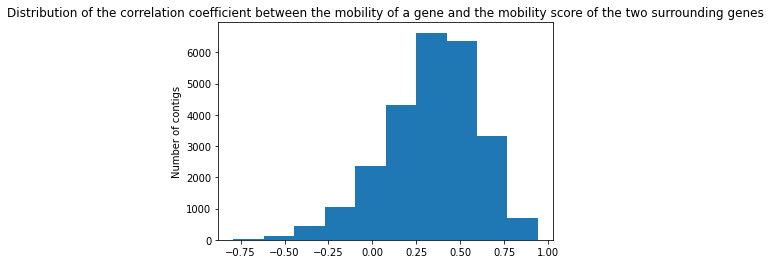

In [154]:
fig, ax = plt.subplots()
ax.hist(corr)
plt.title("Distribution of the correlation coefficient between the mobility of a gene and the mobility score of the two surrounding genes")
ax.set_ylabel("Number of contigs")
ax.set_xlabel=("Spearman correlation coefficient")
plt.show()



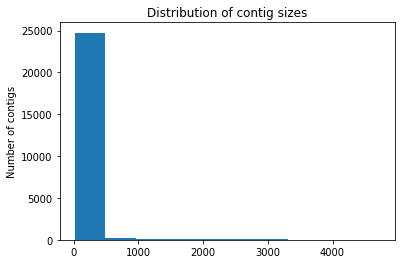

In [155]:
fig, ax = plt.subplots()
ax.hist(num_genes)
plt.title("Distribution of contig sizes")
ax.set_xlabel=("Number of genes in a contig")
ax.set_ylabel("Number of contigs")
plt.show()

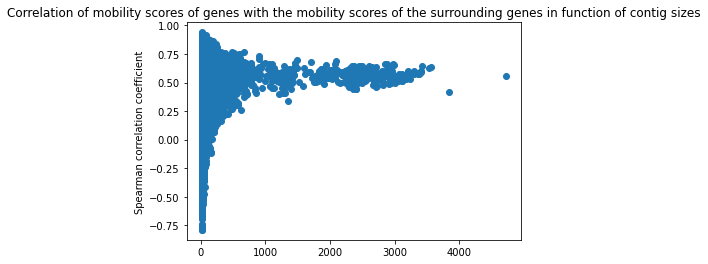

In [156]:
fig, ax = plt.subplots()
ax.scatter(num_genes, corr)
plt.title("Correlation of mobility scores of genes with the mobility scores of the surrounding genes in function of contig sizes")
ax.set_xlabel=("Number of genes in a contig")
ax.set_ylabel("Spearman correlation coefficient")
plt.show()

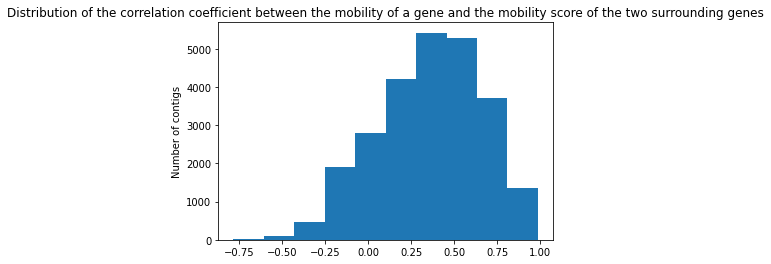

In [158]:
fig, ax = plt.subplots()
ax.hist(corr_pearson)
plt.title("Distribution of the correlation coefficient between the mobility of a gene and the mobility score of the two surrounding genes")
ax.set_ylabel("Number of contigs")
ax.set_xlabel=("Pearson correlation coefficient")
plt.show()


In [129]:
n=5

In [131]:
y=mobility_genome.accessory_fraction.iloc[int((n-1)/2):len(mobility_genome)-int((n-1)/2)].reset_index(drop=True)
x=mobility_genome.accessory_fraction.rolling(window=n).sum().iloc[n-1:len(mobility_genome)+1].reset_index(drop=True)
x=x-y

Text(0.5, 1.0, 'Distribution of average of surrounding mobility scores in genome GCA_000006785.2, contig AE004092.2')

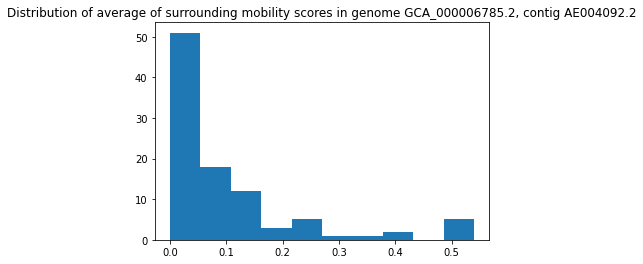

In [132]:
### not important
plt.hist(x/4)
plt.title('Distribution of average of surrounding mobility scores in genome GCA_000006785.2, contig AE004092.2')

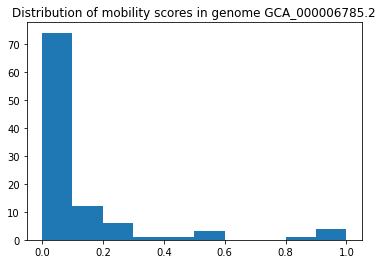

In [134]:
plt.hist(mobility_genome.accessory_fraction)
plt.title('Distribution of mobility scores in genome GCA_000006785.2')
plt.savefig(project_path / "results" / "statistics" / "GCA_000006785.2_distribution_mob.png")

## Triangle plot

In [20]:
mobility_frame=pd.read_csv(project_path / "results" / "intermediate" / "mobility_frame.csv")

In [21]:
mobility_frame

,Unnamed: 0,orthogroup,species_count,genomes_count,accessory_count,core_count,accessory_fraction
0,0,F00001_1,0.062500,0.011364,16.0,0.0,1.000000
1,1,F00002_1,1.000000,0.038462,1.0,0.0,1.000000
2,2,F00003_1,0.076923,0.016667,11.0,2.0,0.846154
3,3,F00004_1,0.026316,0.003831,38.0,0.0,1.000000
4,4,F00005_1,0.015152,0.000572,29.0,37.0,0.439394
...,...,...,...,...,...,...,...
52262,52262,F67384_1,1.000000,0.333333,1.0,0.0,1.000000
52263,52263,F67385_1,1.000000,0.333333,1.0,0.0,1.000000
52264,52264,F67386_1,1.000000,0.500000,1.0,0.0,1.000000
52265,52265,F67387_1,1.000000,1.000000,1.0,0.0,1.000000


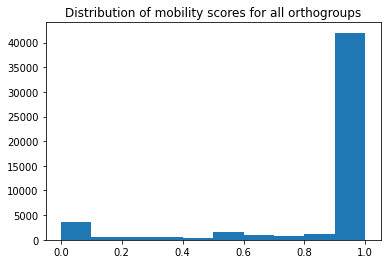

In [135]:
fig, ax = plt.subplots()
ax.hist(mobility_frame.accessory_fraction)
plt.title('Distribution of mobility scores for all orthogroups')
plt.savefig(project_path / "results" / "statistics" / "Full_distribution_mob.png")

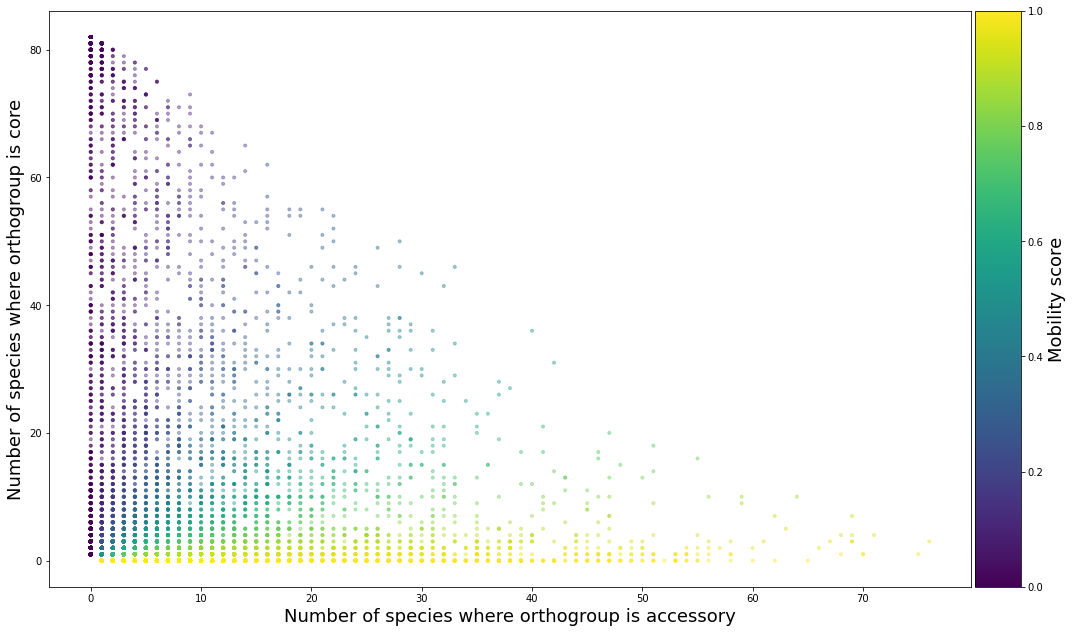

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(mobility_frame.accessory_count, mobility_frame.core_count, marker='.', c=mobility_frame.accessory_fraction, alpha=0.4)
ax.set_xlabel("Number of species where orthogroup is accessory", fontsize=18)
ax.set_ylabel("Number of species where orthogroup is core", fontsize=18)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=1)

plt.colorbar(mpl.cm.ScalarMappable(),
             cax=cax).set_label(label='Mobility score',size=18)
plt.savefig(project_path / "results" / "statistics" / "Triangle_plot1.png")
plt.show()

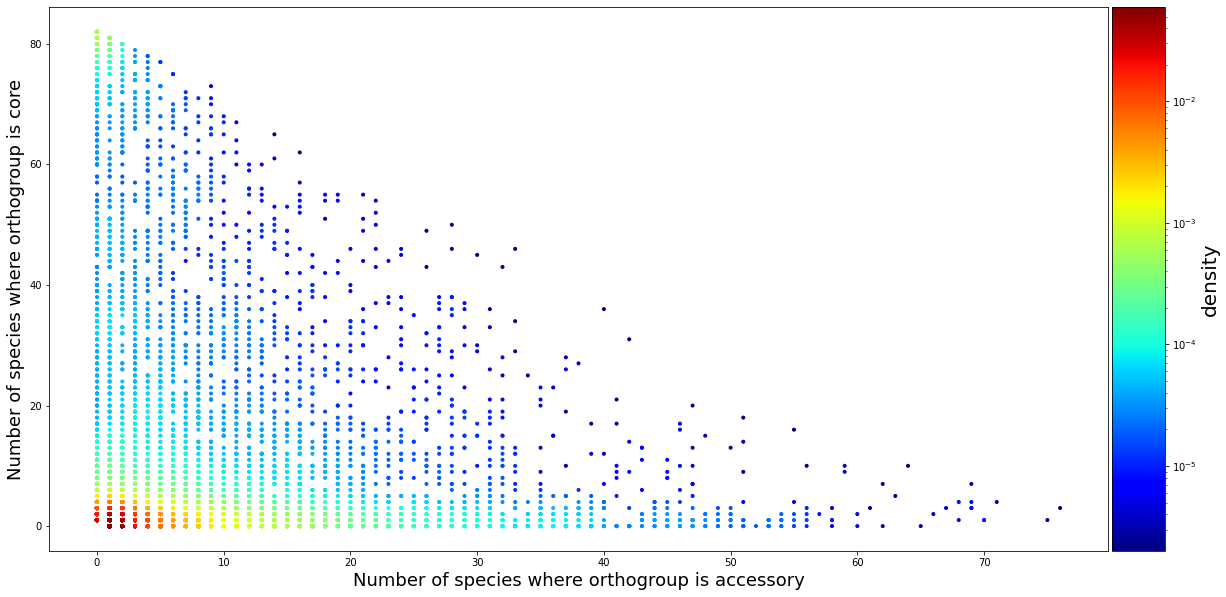

In [165]:
from scipy.stats import gaussian_kde as kde
from matplotlib.colors import Normalize

densObj = kde([mobility_frame.accessory_count, mobility_frame.core_count])
dens_vals = densObj.evaluate([mobility_frame.accessory_count, mobility_frame.core_count])

def makeColours(vals):
    colours = np.zeros((len(vals),3))
    norm = Normalize(vmin=vals.min(), vmax=vals.max())

    colours = [mpl.cm.ScalarMappable(norm=mpl.colors.LogNorm(vmin=np.nanmin(vals), vmax=np.nanmax(vals)), cmap='jet').to_rgba(val) for val in vals]

    return colours

colours = makeColours(dens_vals)

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(mobility_frame.accessory_count, mobility_frame.core_count, marker='.', c=colours)
ax.set_xlabel("Number of species where orthogroup is accessory", fontsize=18)
ax.set_ylabel("Number of species where orthogroup is core", fontsize=18)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.LogNorm(vmin=np.nanmin(dens_vals), vmax=np.nanmax(dens_vals)), cmap='jet'),
             cax=cax).set_label(label='density',size=20)

plt.savefig(project_path / "results" / "statistics" / "Triangle_plot2.png")
plt.show()


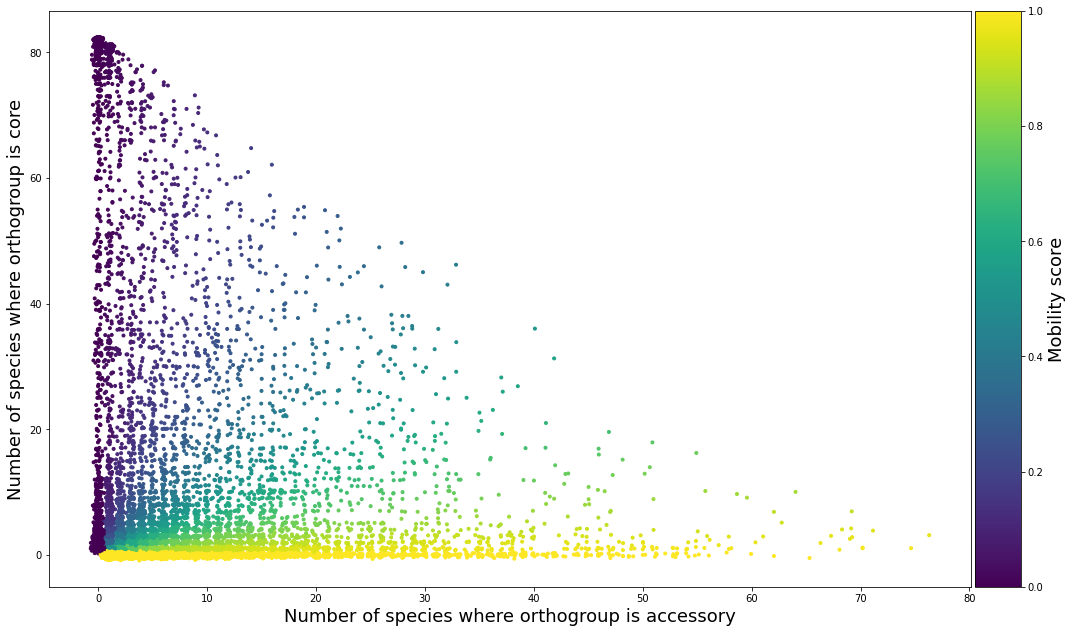

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(mobility_frame.accessory_count + np.random.normal(loc=0.0, scale=0.2, size=len(mobility_frame.accessory_count)), mobility_frame.core_count + np.random.normal(loc=0.0, scale=0.2, size=len(mobility_frame.accessory_count)), marker='.', c=mobility_frame.accessory_fraction)
ax.set_xlabel("Number of species where orthogroup is accessory", fontsize=18)
ax.set_ylabel("Number of species where orthogroup is core", fontsize=18)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=1)

plt.colorbar(mpl.cm.ScalarMappable(),
             cax=cax).set_label(label='Mobility score',size=18)
plt.savefig(project_path / "results" / "statistics" / "Triangle_plot3.png")
plt.show()

https://stackoverflow.com/questions/19064772/visualization-of-scatter-plots-with-overlapping-points-in-matplotlib